## Trabalho: Credit Card Fraud Detection

### Curso: PÓS GRADUAÇÃO EM INTELIGÊNCIA ARTIFICIAL
### Disciplina: Machine Learning - Técnicas e Cases
### Professor: Raphael Cobe
### Autores: Eder Alencar; Edgar Alencar; José Kellyson; Wander    

Dados disponíveis em:
https://www.openml.org/search?type=data&status=active&id=45955

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install scipy pandas

In [ ]:
# @title

# import os
# import pandas as pd
# from scipy.io import arff
# import urllib.request

# # URL do dataset
# url = 'https://www.openml.org/data/download/21756045/dataset'

# # Download do arquivo ARFF
# response = urllib.request.urlopen(url)
# arff_data = response.read().decode('utf-8')

# # Carregar o ARFF em um dataframe do pandas
# data = arff.loadarff(arff_data)
# df = pd.DataFrame(data)

# # Exibir as primeiras 100 linhas do dataframe
# print(df.head(100))

# # Caminho para o arquivo ARFF na pasta Downloads
# #file_path = os.path.join(os.path.expanduser('~'), '/Users/eder.asilva12/Downloads', 'dataset.arff')

# # Carregar o arquivo ARFF
# #data, meta = arff.loadarff(file_path)

# # Converter os dados para um DataFrame do pandas
# #df = pd.DataFrame(data)

# # Exibir as 100 primeiras linhas
# #print(df.head(100))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, roc_curve, f1_score, recall_score, precision_score, precision_recall_curve, mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import (
    NeighbourhoodCleaningRule,
    OneSidedSelection,
    InstanceHardnessThreshold,
)
from imblearn.combine import SMOTEENN, SMOTETomek
import sys
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'

from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

In [ ]:
import pandas as pd
from scipy.io import arff
import urllib.request
import os

# URL do dataset
url = 'https://www.openml.org/data/download/21756045/dataset'

# Caminho do arquivo temporário no Google Colab
temp_arff_path = '/tmp/dataset.arff'

# Download do arquivo ARFF
urllib.request.urlretrieve(url, temp_arff_path)

# Ler o arquivo ARFF e carregar em um DataFrame do pandas
with open(temp_arff_path, 'r') as f:
    data, meta = arff.loadarff(f)
    df = pd.DataFrame(data)

# Exibir as primeiras 100 linhas do dataframe
print(df.head(100))




    Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..   ...       ...       ...       ...       ...       ...       ...   
95  64.0 -0.658305  0.406791  2.037461 -0.291298  0.147910 -0.350857   
96  64.0  0.959602  0.370711  0.888613  2.343244  0.352491  1.365515   
97  67.0 -0.653445  0.160225  1.592256  1.296832  0.997175 -0.343000   
98  67.0 -1.494668  0.837241  2.628211  3.145414 -0.609098  0.258495   
99  68.0  1.232996  0.189454  0.491040  0.633673 -0.511574 -0.990609   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277

In [ ]:
#df.head(100)

Time        V1        V2        V3        V4        V5        V6        V7        V8  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609  0.377436   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941 -0.270533   
..   ...       ...       ...       ...       ...       ...       ...       ...       ...   
95  64.0 -0.658305  0.406791  2.037461 -0.291298  0.147910 -0.350857  0.945373 -0.172560   
96  64.0  0.959602  0.370711  0.888613  2.343244  0.352491  1.365515 -0.277771  0.516053   
97  67.0 -0.653445  0.160225  1.592256  1.296832  0.997175 -0.343000  0.469937 -0.132470   
98  67.0 -1.494668  0.837241  2.628211  3.145414 -0.609098  0.258495 -0.012189  0.102136   
99  68.0  1.232996  0.189454  0.491040  0.633673 -0.511574 -0.990609  0.066240 -0.196940   

          V9       V10       V11       V12       V13       V14       V15       V16       V17  \
0   0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169  1.468177 -0.470401  0.207971   
1  -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805   
2  -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946  2.345865 -2.890083  1.109969   
3  -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924 -0.631418 -1.059647 -0.684093   
4   0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670  0.175121 -0.451449 -0.237033   
..       ...       ...       ...       ...       ...       ...       ...       ...       ...   
95  0.025133 -0.778135 -0.196290  0.632955  0.374025 -0.531597 -0.615063 -0.518078  0.003881   
96 -0.700929  0.468216  0.745612  0.373531 -0.223918  0.417438  1.678400 -0.515702  0.662479   
97 -0.197794 -0.105006 -0.543662  0.302233  0.141211 -0.207880  0.024108 -1.206877  0.394836   
98 -0.286164  1.198556 -0.550296 -0.106846  0.208014 -0.680510  0.507764 -0.260264  0.246631   
99  0.075921 -0.066060 -0.255743  0.255157  0.105247  0.284677  1.057322  0.315891 -0.411940   

         V18       V19       V20       V21       V22       V23       V24       V25       V26  \
0   0.025791  0.403993  0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  -0.183361 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  -0.121359 -2.261857  0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3   1.965775 -1.232622 -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4  -0.038195  0.803487  0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292   
..       ...       ...       ...       ...       ...       ...       ...       ...       ...   
95 -1.288954 -0.797804  0.064133 -0.156096 -0.238805  0.089877  0.421195 -0.352487  0.074783   
96 -2.514235 -2.589688 -0.298405 -0.155547 -0.403239  0.356504 -0.696881 -0.198718 -0.220268   
97 -0.750956  0.440558  0.225920  0.038363  0.336449 -0.014883  0.102959 -0.265322 -0.348637   
98  0.008856  0.899416 -0.028352 -0.140047  0.355044  0.332720  0.718193 -0.219366  0.118927   
99 -0.511912 -0.120427 -0.077871 -0.251566 -0.770139  0.125998  0.369627  0.205598  0.094062   

         V27       V28  Amount  Class  
0   0.133558 -0.021053  149.62    0.0  
1  -0.008983  0.014724    2.69    0.0  
2  -0.055353 -0.059752  378.66    0.0  
3   0.062723  0.061458  123.50    0.0  
4   0.219422  0.215153   69.99    0.0  
..       ...       ...     ...    ...  
95 -0.094192 -0.092493   54.99    0.0  
96  0.068546  0.020797    7.55    0.0  
97  0.011238 -0.049478   19.85    0.0  
98 -0.317486 -0.340783   28.28    0.0  
99 -0.033138  0.020990   15.99    0.0  

[100 rows x 31 columns]

In [ ]:
# Contar valores nulos por coluna
contagem_nulos = df.isnull().sum()

# Exibir o resultado
print(contagem_nulos)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Contar valores nulos por coluna
contagem_nulos = df.notnull().sum()

# Exibir o resultado
print(contagem_nulos)

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64


Matriz de Correlação:
             Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.038955e-16 -1.201308e-15 -8.981210e-16   
V2     -0.010593  4.038955e-16  1.000000e+00  3.528342e-16 -1.129905e-15   
V3     -0.419618 -1.201308e-15  3.528342e-16  1.000000e+00  4.742151e-16   
V4     -0.105260 -8.981210e-16 -1.129905e-15  4.742151e-16  1.000000e+00   
V5      0.173072  2.552831e-17  4.985990e-16 -5.334098e-17 -1.723261e-15   
V6     -0.063016 -6.435055e-16  2.891672e-16  1.640175e-15 -7.518028e-16   
V7      0.084714 -9.826124e-16  2.041521e-16  4.776669e-16 -4.063413e-16   
V8     -0.036949 -2.402468e-16 -5.174653e-17 -1.254230e-15  5.679972e-16   
V9     -0.008660 -1.341801e-16  2.132514e-17  5.492884e-16  6.866534e-16   
V10     0.030617  7.565906e-17 -3.742746e-16  1.157795e-15  2.249469e-16   
V11    -0.247689  2.141532e-16  1.926881e-16  1.583811e-15  3.437

<Axes: >

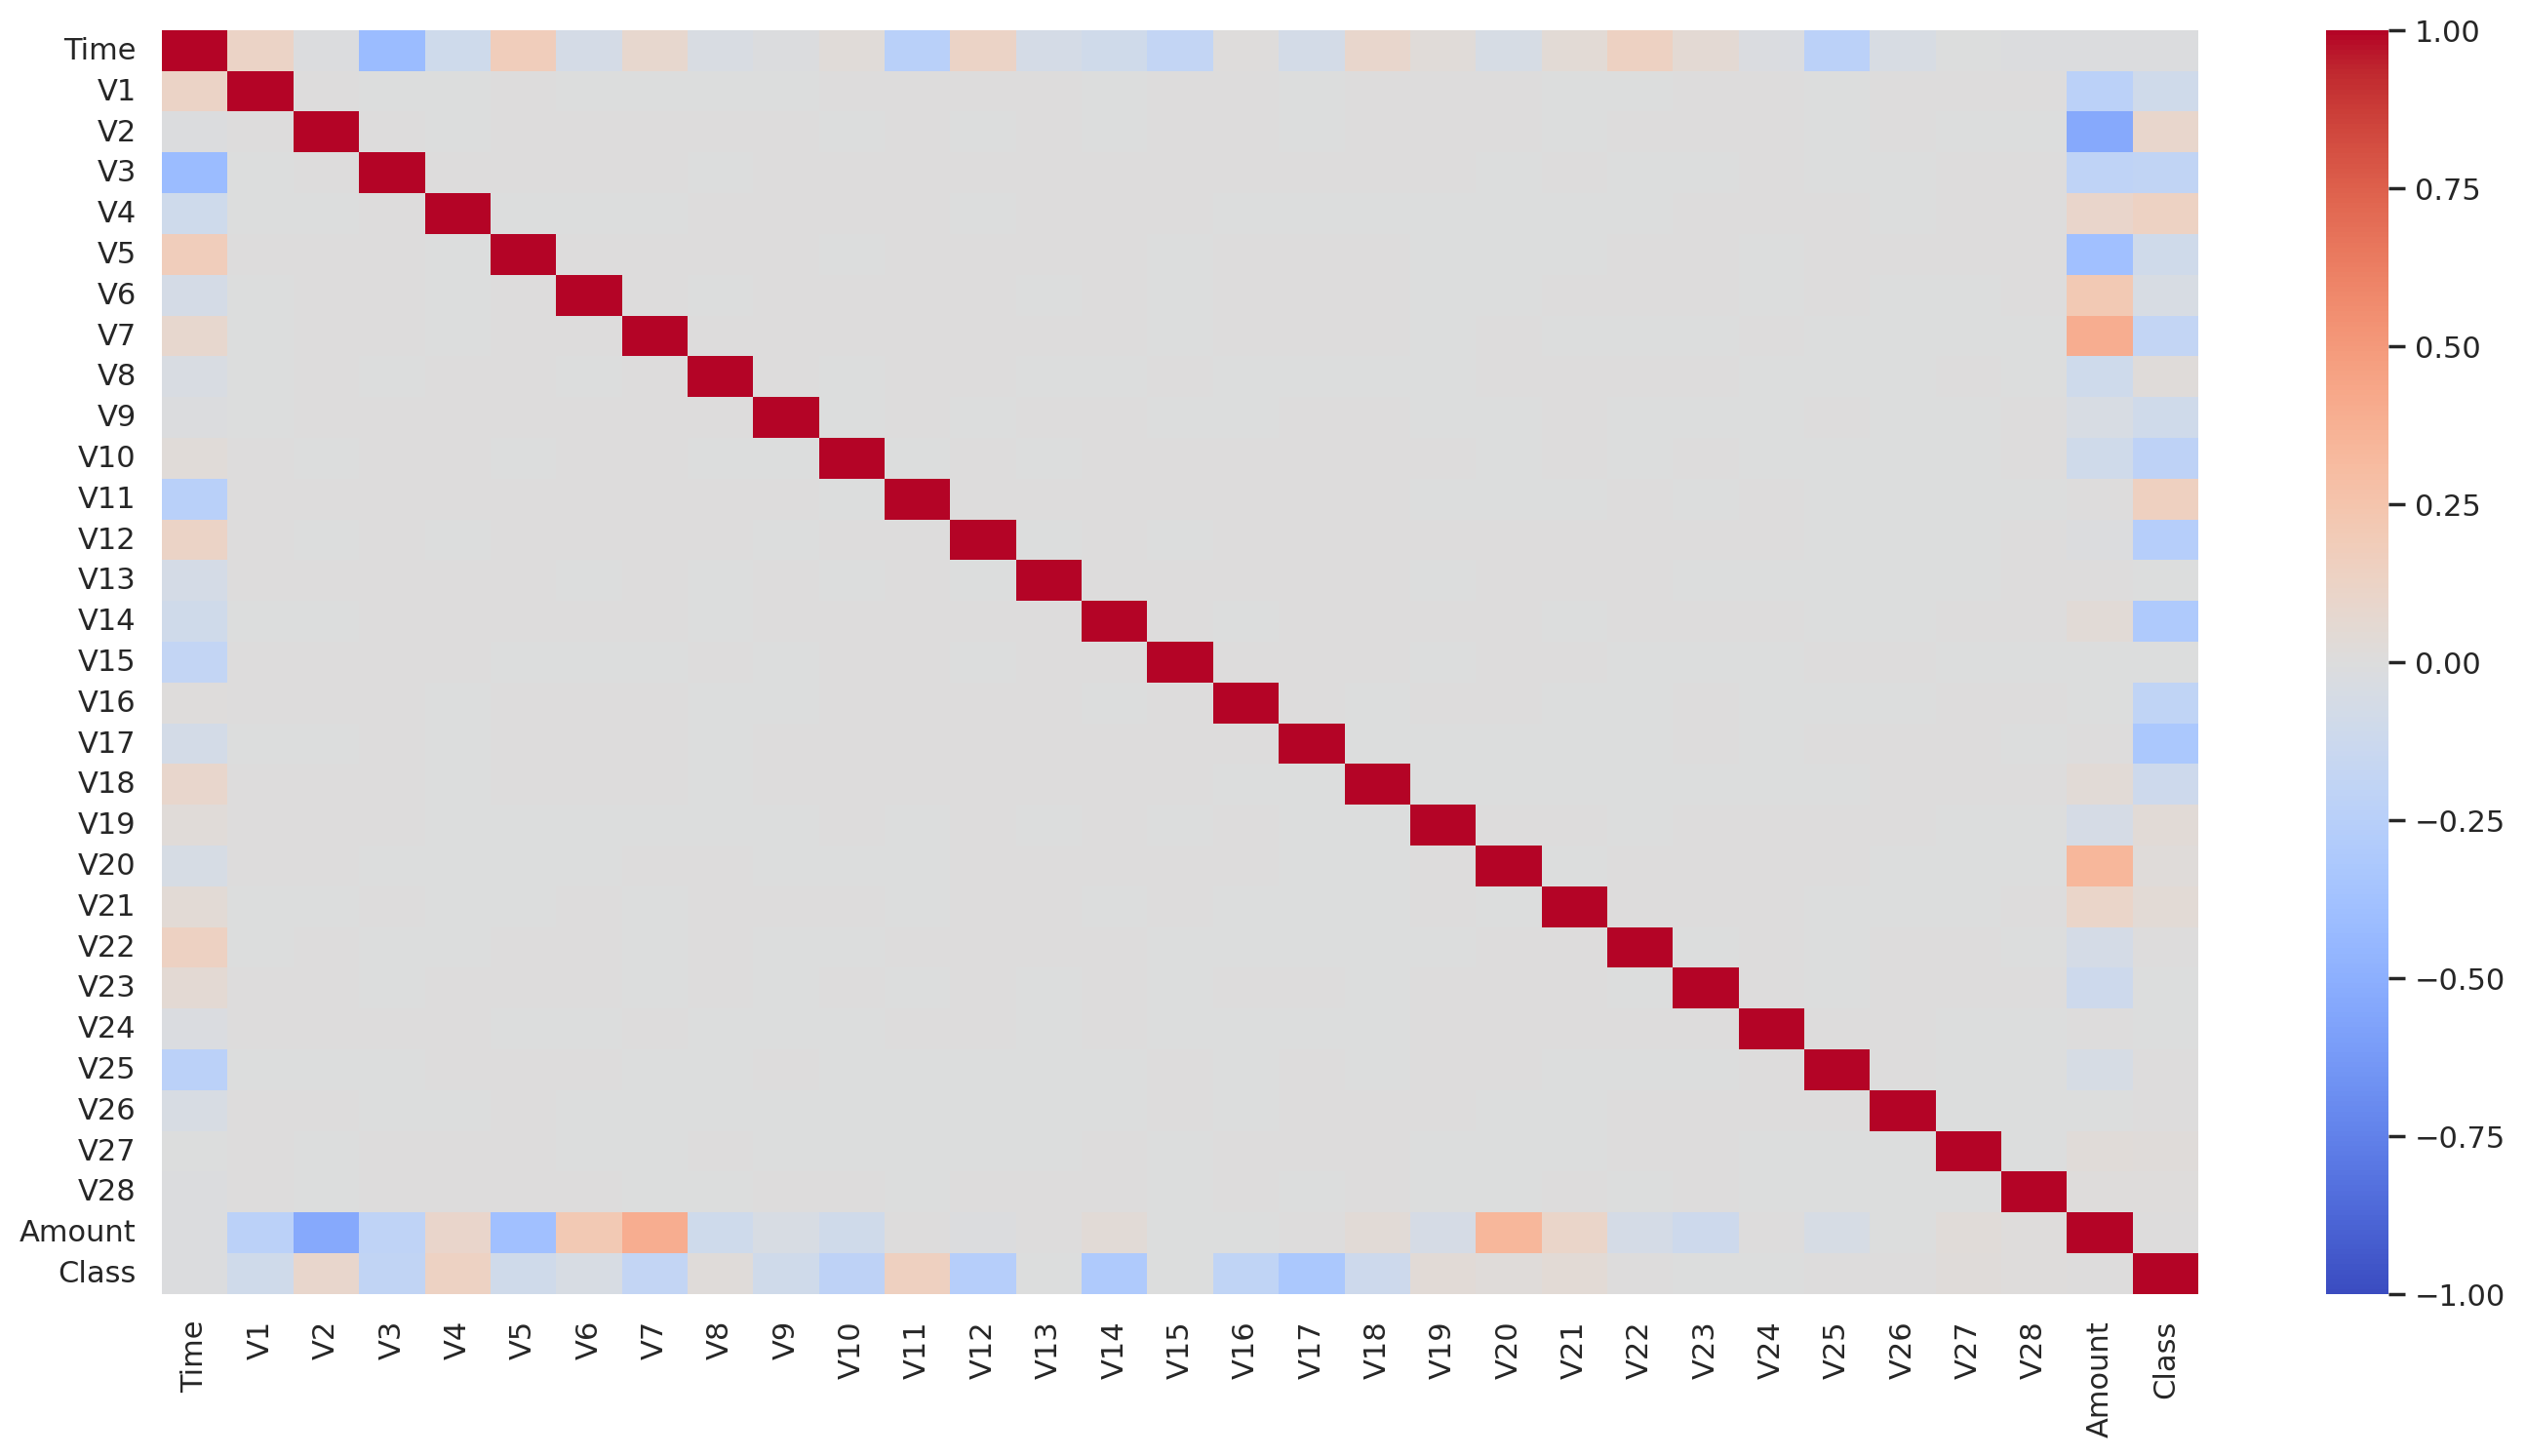

In [ ]:
# Avaliar a correlação entre elas
# Matriz de Correlação
matriz_corr = df.corr()

# Armazenando a matriz de correlação em um novo DataFrame
print("Matriz de Correlação:\n", matriz_corr)

#Plotando mapa de calor a partir da matriz de correlações:
#Plotting a correlation heatmap from the correlation matrix:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [ ]:
# Configurar para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Descritivo dos Dados
print("Dados originais:")
print(df.describe(include='all'))
print("\n")


Dados originais:
                Time            V1            V2            V3            V4            V5  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15  9.604066e-16   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10           V11  \
count  2.848070e+05  2.848070e+05  2.848070

#Boxplot

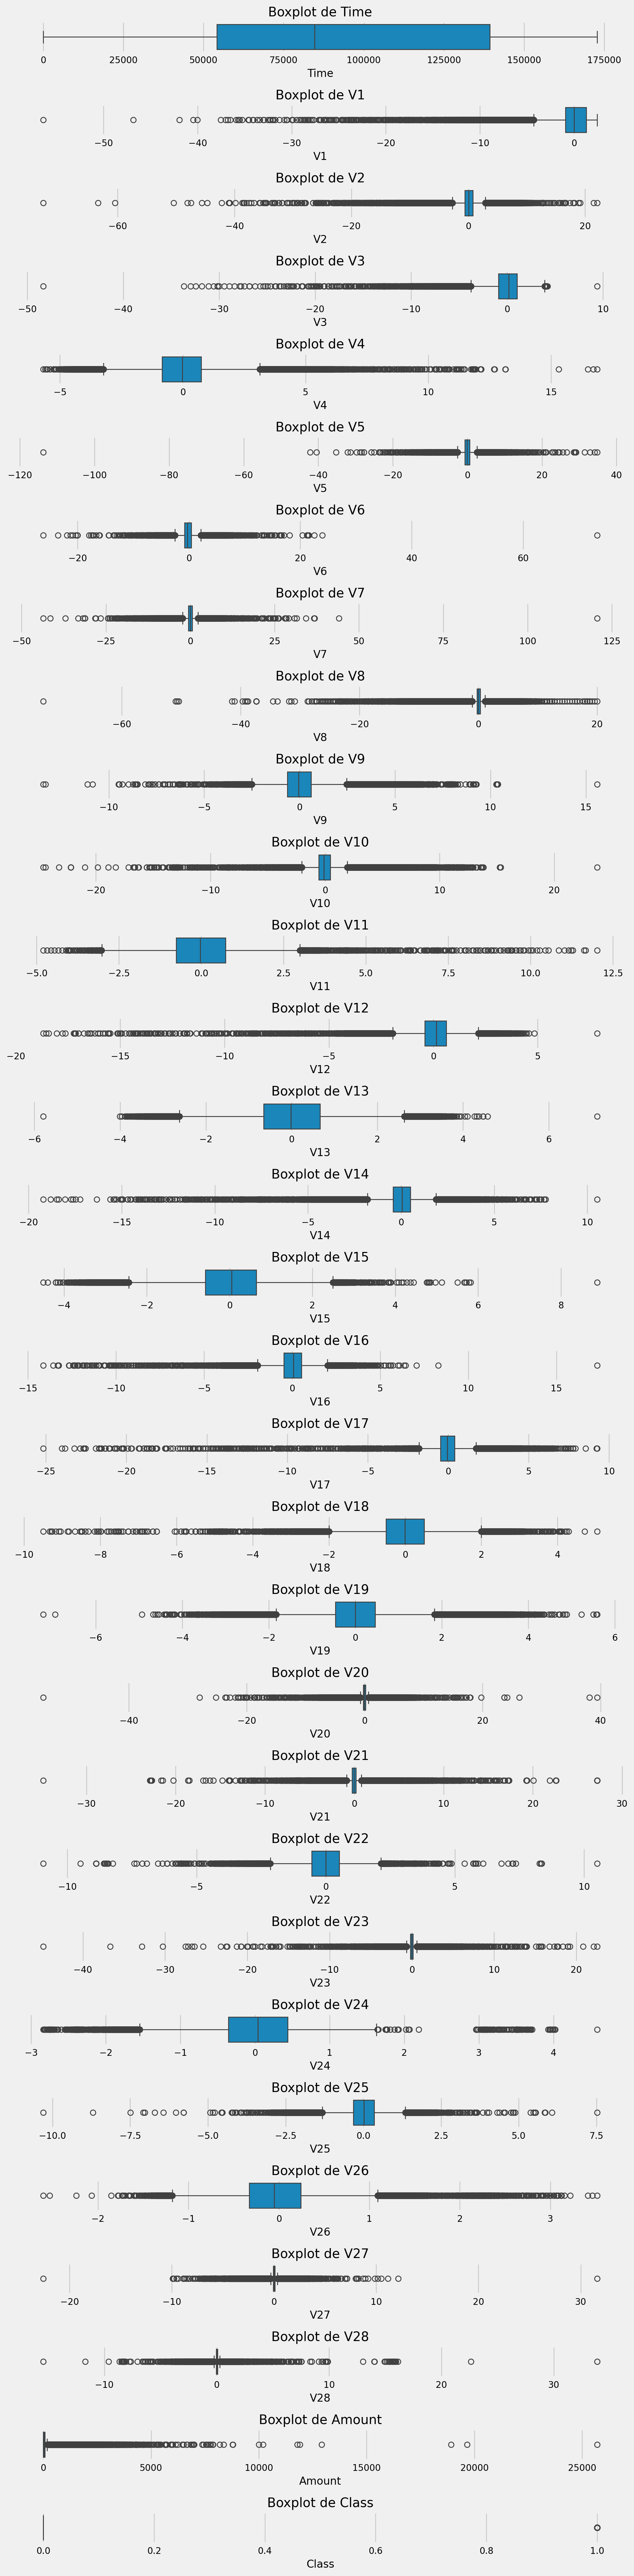

In [ ]:
# # Configurar para exibir todas as colunas
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

# # Exibir boxplots para todas as variáveis numéricas
# numeric_columns = df.select_dtypes(include=['number']).columns

# plt.figure(figsize=(10, len(numeric_columns) * 1.3))

# for i, column in enumerate(numeric_columns, 1):
#     plt.subplot(len(numeric_columns), 1, i)
#     sns.boxplot(data=df, x=column)
#     plt.title(f'Boxplot de {column}')

# plt.tight_layout()
# plt.show()

In [ ]:
# Separando as variáveis contínuas para serem padronizadas
continuasDF = df.iloc[
    :,
    df.columns.isin(
        [
            #"Time",
            "Amount",
        ]
    ),
]

In [ ]:
# Separando o conjunto de dados em varáveis dependentes e a variável resposta
y = pd.DataFrame(data['Class'].astype(int), columns=['Class'])

X = pd.DataFrame(data)
X.drop(['Class'],axis=1, inplace=True)
X.drop(['Time'],axis=1, inplace=True)

In [ ]:
X_sorted = X.sort_values(by='Amount')
frequencia = X_sorted['Amount'].value_counts().sort_index()

print(frequencia)

Amount
0.00        1825
0.01         718
0.02          85
0.03           3
0.04          11
            ... 
11898.09       1
12910.93       1
18910.00       1
19656.53       1
25691.16       1
Name: count, Length: 32767, dtype: int64


In [ ]:
y.head()

frequencia = y['Class'].value_counts()
print(frequencia)

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
sc = StandardScaler()
X_train[continuasDF.columns] = sc.fit_transform(X_train[continuasDF.columns])
X_test[continuasDF.columns] = sc.transform(X_test[continuasDF.columns])

In [ ]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
249927 -0.012102  0.707332  0.163334 -0.756498  0.590999 -0.653429  0.844608   
214082  1.776151 -0.184642 -2.204096  1.191668  0.614461 -1.016525  0.919254   
106005 -1.083391 -4.440527 -1.399530  0.469764 -2.076458 -0.766137  1.601441   
58619  -0.518847  1.025087 -0.614624 -0.780959  2.474666  3.335055  0.046111   
191638 -0.640421  0.212171  0.283341 -1.786916  2.616127  4.024863 -0.198897   

              V8        V9       V10  ...       V20       V21       V22  \
249927 -0.001672 -0.184399 -0.222719  ... -0.038329 -0.231385 -0.572415   
214082 -0.387465 -0.318277  0.517022  ... -0.030437  0.281190  0.530070   
106005 -0.709176 -1.288745  0.086419  ...  2.189260  0.346463 -1.432833   
58619   0.794249 -0.322448  0.128383  ...  0.225957 -0.193099 -0.708348   
191638  0.937087  0.474428 -0.283699  ...  0.154309  0.167939  0.759218   

             V23       V24       V25       V26       V27       V28    Amount  
249927  0.042660 -0.360882 -0.494703  0.142657  0.235922  0.083758 -0.321082  
214082 -0.232262 -0.342096  0.492355 -0.427682 -0.075228 -0.056755  0.243475  
106005 -1.097063  0.505926 -0.140185  0.870190 -0.316982  0.227833  4.797594  
58619   0.145672  0.944217 -0.788017  0.039995  0.010804  0.254309 -0.331514  
191638 -0.321412  0.767971 -0.084221  0.612936  0.074029 -0.033344 -0.331514  

[5 rows x 29 columns]

In [ ]:
# Descritivo dos Dados
print("Dados originais:")
sc = StandardScaler()
XXX = pd.DataFrame(sc.fit_transform(X[continuasDF.columns]))
XXX.columns = continuasDF.columns
print(XXX.describe(include='all'))
print("\n")

Dados originais:
             Amount
count  2.848070e+05
mean   2.913952e-17
std    1.000002e+00
min   -3.532294e-01
25%   -3.308401e-01
50%   -2.652715e-01
75%   -4.471707e-02
max    1.023622e+02




##Métodos para Dados Desbalanceados

## Função: model_resampling_pipeline - Dados Desbalanceados

Responsável por executar um pipeline com os métodos de resample elencados.

In [ ]:
from sklearn import metrics
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import (
    RandomUnderSampler,
    NearMiss,
    TomekLinks,
    EditedNearestNeighbours,
    OneSidedSelection,
    ClusterCentroids,
    InstanceHardnessThreshold,
)
from imblearn.combine import SMOTEENN, SMOTETomek


def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    results = {
        "ordinary": {},
        "class_weight": {},
        "oversample": {},
        "undersample": {},
        "combination": {},
    }

    # ------ No balancing ------
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(
        y_test, predictions
    )
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    results["ordinary"] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "fscore": fscore,
        "n_occurences": support,
        "predictions_count": Counter(predictions),
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "auc": auc,
    }

    # ------ Class weight ------
    if "class_weight" in model.get_params().keys():
        model.set_params(class_weight="balanced")
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(
            y_test, predictions
        )
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results["class_weight"] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "fscore": fscore,
            "n_occurences": support,
            "predictions_count": Counter(predictions),
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
            "auc": auc,
        }

    # ------------ OVERSAMPLING TECHNIQUES ------------
    print("------ Oversampling methods ------")
    techniques = [RandomOverSampler(), SMOTE(n_jobs=-1), ADASYN(n_jobs=-1)]

    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f"Technique: {technique}")
        print(f"Before resampling: {Counter(y_train.to_numpy().reshape(1,-1).ravel())}")
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f"After resampling: {Counter(y_resampled.to_numpy().reshape(1,-1).ravel())}")

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(
            y_test, predictions
        )
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results["oversample"][technique] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "fscore": fscore,
            "n_occurences": support,
            "predictions_count": Counter(predictions),
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
            "auc": auc,
        }

    # ------------ UNDERSAMPLING TECHNIQUES ------------
    print("------ Undersampling methods ------")
    techniques = [
        RandomUnderSampler(),
        NearMiss(version=1, n_jobs=-1),
        NearMiss(version=2, n_jobs=-1),
        TomekLinks(n_jobs=-1),
        EditedNearestNeighbours(n_jobs=-1),
        OneSidedSelection(n_jobs=-1),
        # ClusterCentroids(n_jobs=-1),
        InstanceHardnessThreshold(n_jobs=-1),
    ]

    for sampler in techniques:
        technique = sampler.__class__.__name__
        if technique == "NearMiss":
            technique += str(sampler.version)
        print(f"Technique: {technique}")
        print(f"Before resampling: {Counter(y_train.to_numpy().reshape(1,-1).ravel())}")
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f"After resampling: {Counter(y_resampled.to_numpy().reshape(1,-1).ravel())}")

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(
            y_test, predictions
        )
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results["undersample"][technique] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "fscore": fscore,
            "n_occurences": support,
            "predictions_count": Counter(predictions),
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
            "auc": auc,
        }

    # ------------ COMBINATED TECHNIQUES ------------
    print("------ Combination methods ------")
    techniques = [SMOTEENN(), SMOTETomek()]

    for sampler in techniques:
        technique = sampler.__class__.__name__
        if technique == "NearMiss":
            technique += str(sampler.version)
        print(f"Technique: {technique}")
        print(f"Before resampling: {Counter(y_train.to_numpy().reshape(1,-1).ravel())}")
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f"After resampling: {Counter(y_resampled.to_numpy().reshape(1,-1).ravel())}")

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(
            y_test, predictions, pos_label=1
        )
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results["combination"][technique] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "fscore": fscore,
            "n_occurences": support,
            "predictions_count": Counter(predictions),
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
            "auc": auc,
        }

    print("DONE.")
    return results

## Função evaluate_method  - Dados Desbalanceados

Exibe gráficos de barras que buscam facilitar a compreensão sobre o desempenho dos modelos preditivos.

In [ ]:
def evaluate_method(
    results, method, metrics=["precision", "recall", "fscore"], class_labels=["0", "1"]
):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(20, 6))

    for i, metric in enumerate(metrics):
        ax[i * 2].axhline(results["ordinary"][metric][0], label="No Resampling")
        ax[i * 2 + 1].axhline(results["ordinary"][metric][1], label="No Resampling")

        if results["class_weight"]:
            ax[i * 2].bar(
                0, results["class_weight"][metric][0], label="Adjust Class Weight"
            )
            ax[i * 2 + 1].bar(
                0, results["class_weight"][metric][1], label="Adjust Class Weight"
            )

        ax[0].legend(
            loc="upper center",
            bbox_to_anchor=(9, 1.01),
            ncol=1,
            fancybox=True,
            shadow=True,
        )

        for j, (technique, result) in enumerate(results[method].items()):
            ax[i * 2].bar(j + 1, result[metric][0], label=technique)

            ax[i * 2 + 1].bar(j + 1, result[metric][1], label=technique)

        ax[i * 2].set_title(f"{class_labels[0]} \n{metric}")
        ax[i * 2 + 1].set_title(f"{class_labels[1]} \n{metric}")

    # AUC vis
    ax[6].set_title(f"Area under curve")
    ax[6].axhline(results["ordinary"]["auc"], label="No Resampling")
    if results["class_weight"]:
        ax[6].bar(0, results["class_weight"]["auc"], label="Adjust Class Weight")
    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j + 1, result["auc"], label=technique)

##Estatísticas de Ajustes para os principais modelos:
DecisionTreeClassifier(),RandomForestClassifier(),SVC(),LogisticRegression(),KNeighborsClassifier(5),AdaBoostClassifier(),MLPClassifier()

In [ ]:
classifiers = [DecisionTreeClassifier(),RandomForestClassifier(),SVC(),LogisticRegression(),KNeighborsClassifier(5),AdaBoostClassifier(),MLPClassifier()]

print("--------------------------------------")
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe_df_reg = pipe.fit(X_train, y_train)
    pipe_df_reg_pred = pipe_df_reg.predict(X_test)
    # Acurácia  = (TP + TN)/Total
    print("Acurácia {0} é: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))
    # Precisão = TP / (TP + FP)
    print("Precisão {0} é: {1:.2f}%".format(classifier,(precision_score(y_test, pipe_df_reg_pred)*100)))
    # Recall = TP / (TP + FN)
    print(f"Recall: {round(recall_score(y_test, pipe_df_reg_pred),3)*100}%")
    # F1 Score
    print(f"F1 Score: {round(f1_score(y_test, pipe_df_reg_pred),3)*100}%")
    print("--------------------------------------")


--------------------------------------
Acurácia DecisionTreeClassifier() é: 99.92%
Precisão DecisionTreeClassifier() é: 78.83%
Recall: 73.0%
F1 Score: 75.8%
--------------------------------------
Acurácia RandomForestClassifier() é: 99.95%
Precisão RandomForestClassifier() é: 95.76%
Recall: 76.4%
F1 Score: 85.0%
--------------------------------------
Acurácia SVC() é: 99.93%
Precisão SVC() é: 96.84%
Recall: 62.2%
F1 Score: 75.7%
--------------------------------------
Acurácia LogisticRegression() é: 99.92%
Precisão LogisticRegression() é: 85.98%
Recall: 62.2%
F1 Score: 72.2%
--------------------------------------
Acurácia KNeighborsClassifier() é: 99.94%
Precisão KNeighborsClassifier() é: 90.83%
Recall: 73.6%
F1 Score: 81.3%
--------------------------------------
Acurácia AdaBoostClassifier() é: 99.91%
Precisão AdaBoostClassifier() é: 76.06%
Recall: 73.0%
F1 Score: 74.5%
--------------------------------------
Acurácia MLPClassifier() é: 99.94%
Precisão MLPClassifier() é: 90.98%
Recall:

##Verificando a necessidade de balanceamento por cada uma das técnicas mais utilizadas, no que tange Oversample e Undersample

## Decision Tree

In [ ]:

# model = DecisionTreeClassifier()

# results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: SMOTE
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: ADASYN
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({1: 199035, 0: 199020})
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss1
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss2
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: TomekLinks
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 198997, 1: 344})
Technique: EditedNearestNeighbours
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Count

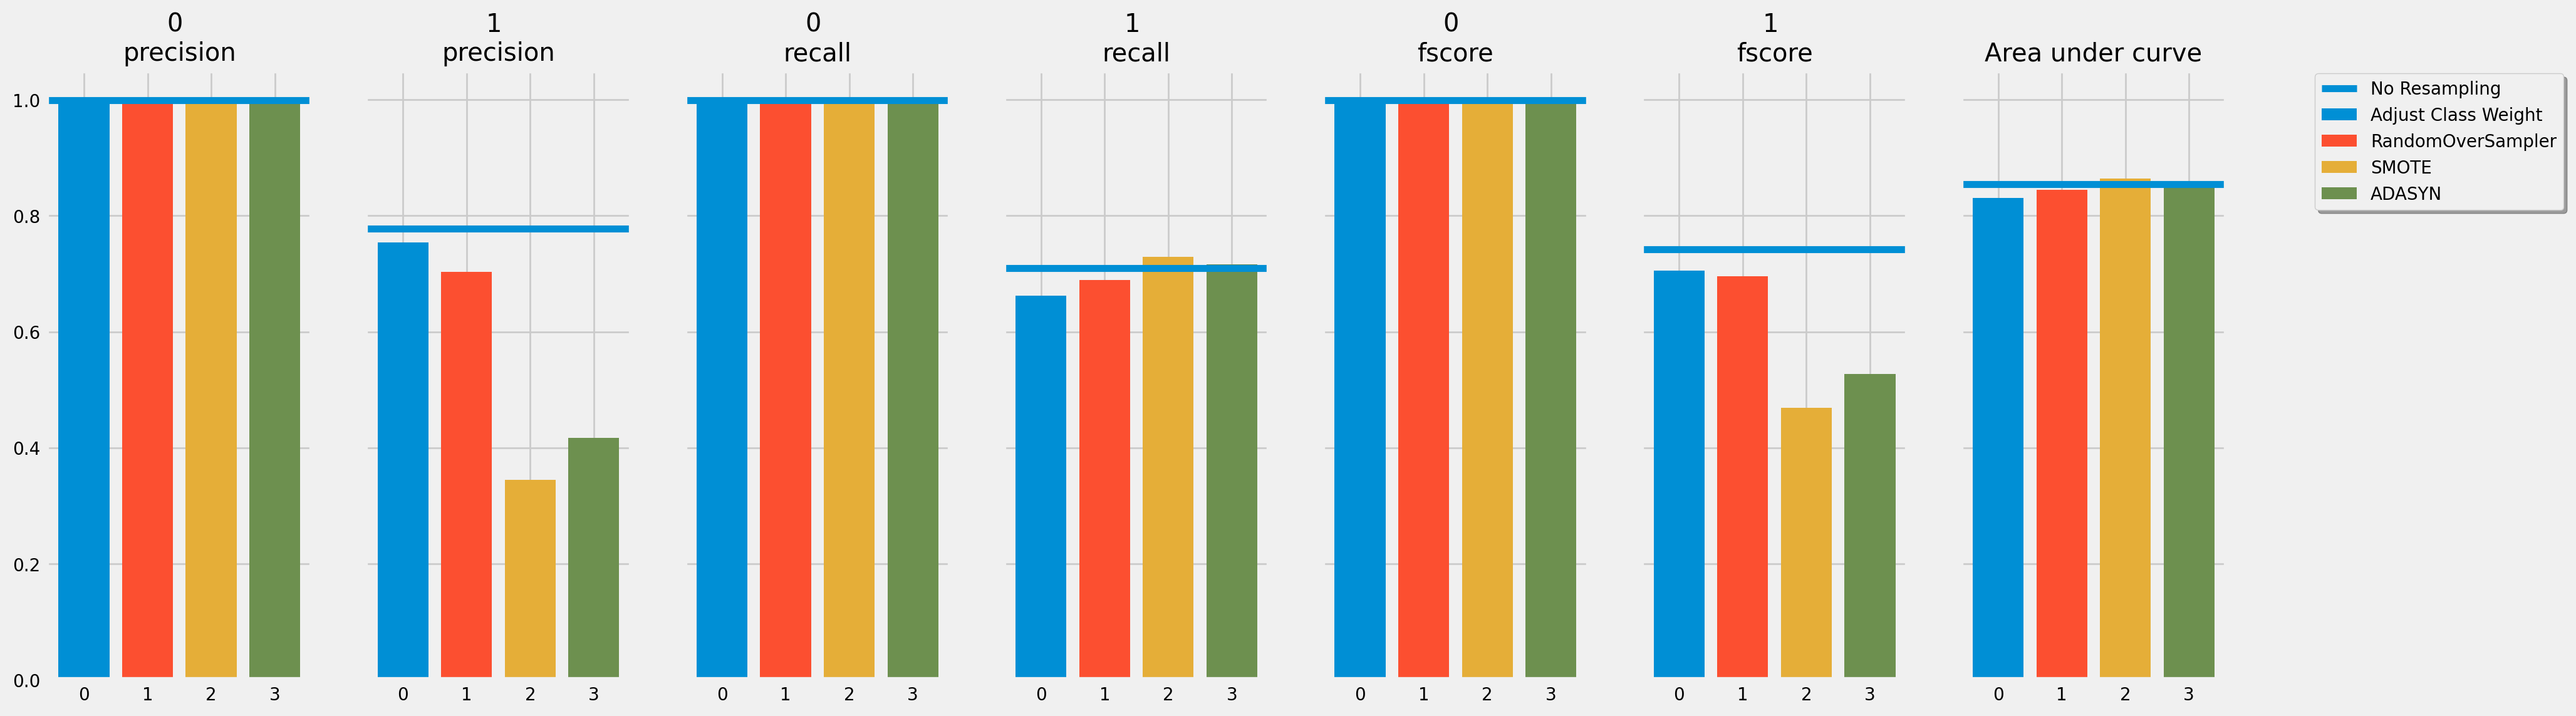

In [ ]:
# evaluate_method(results, 'oversample')

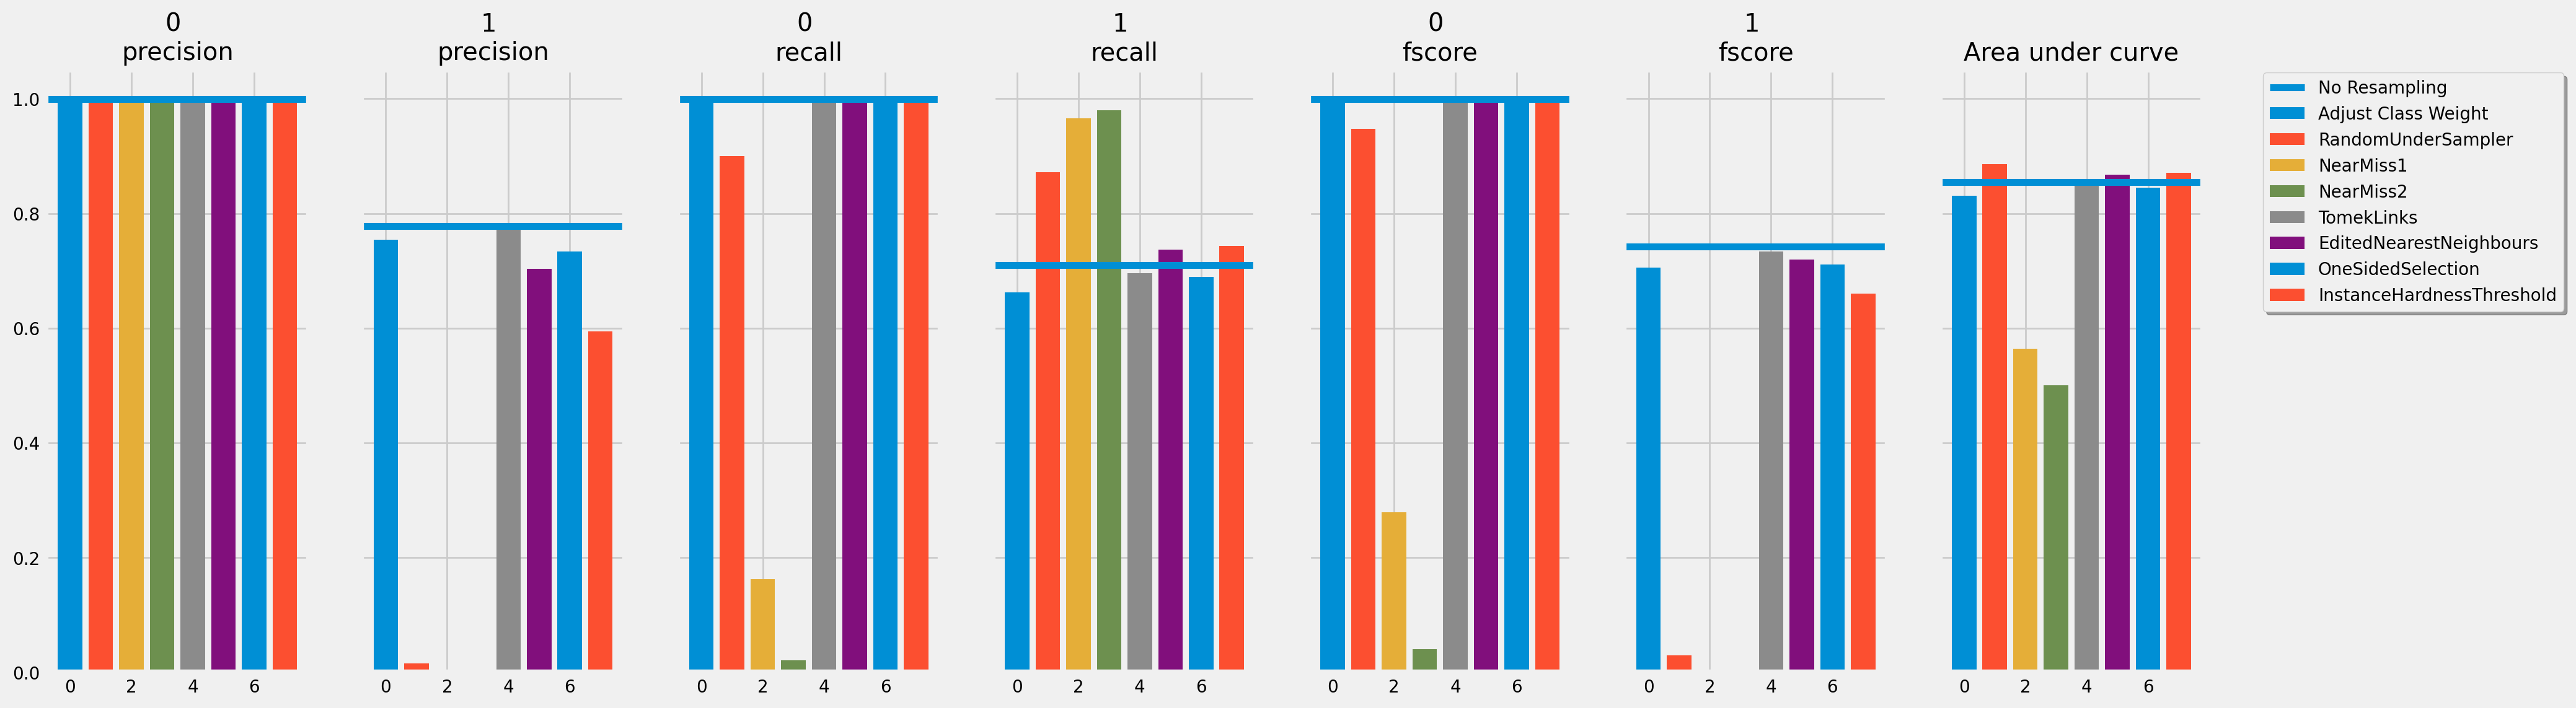

In [ ]:
# evaluate_method(results, 'undersample')

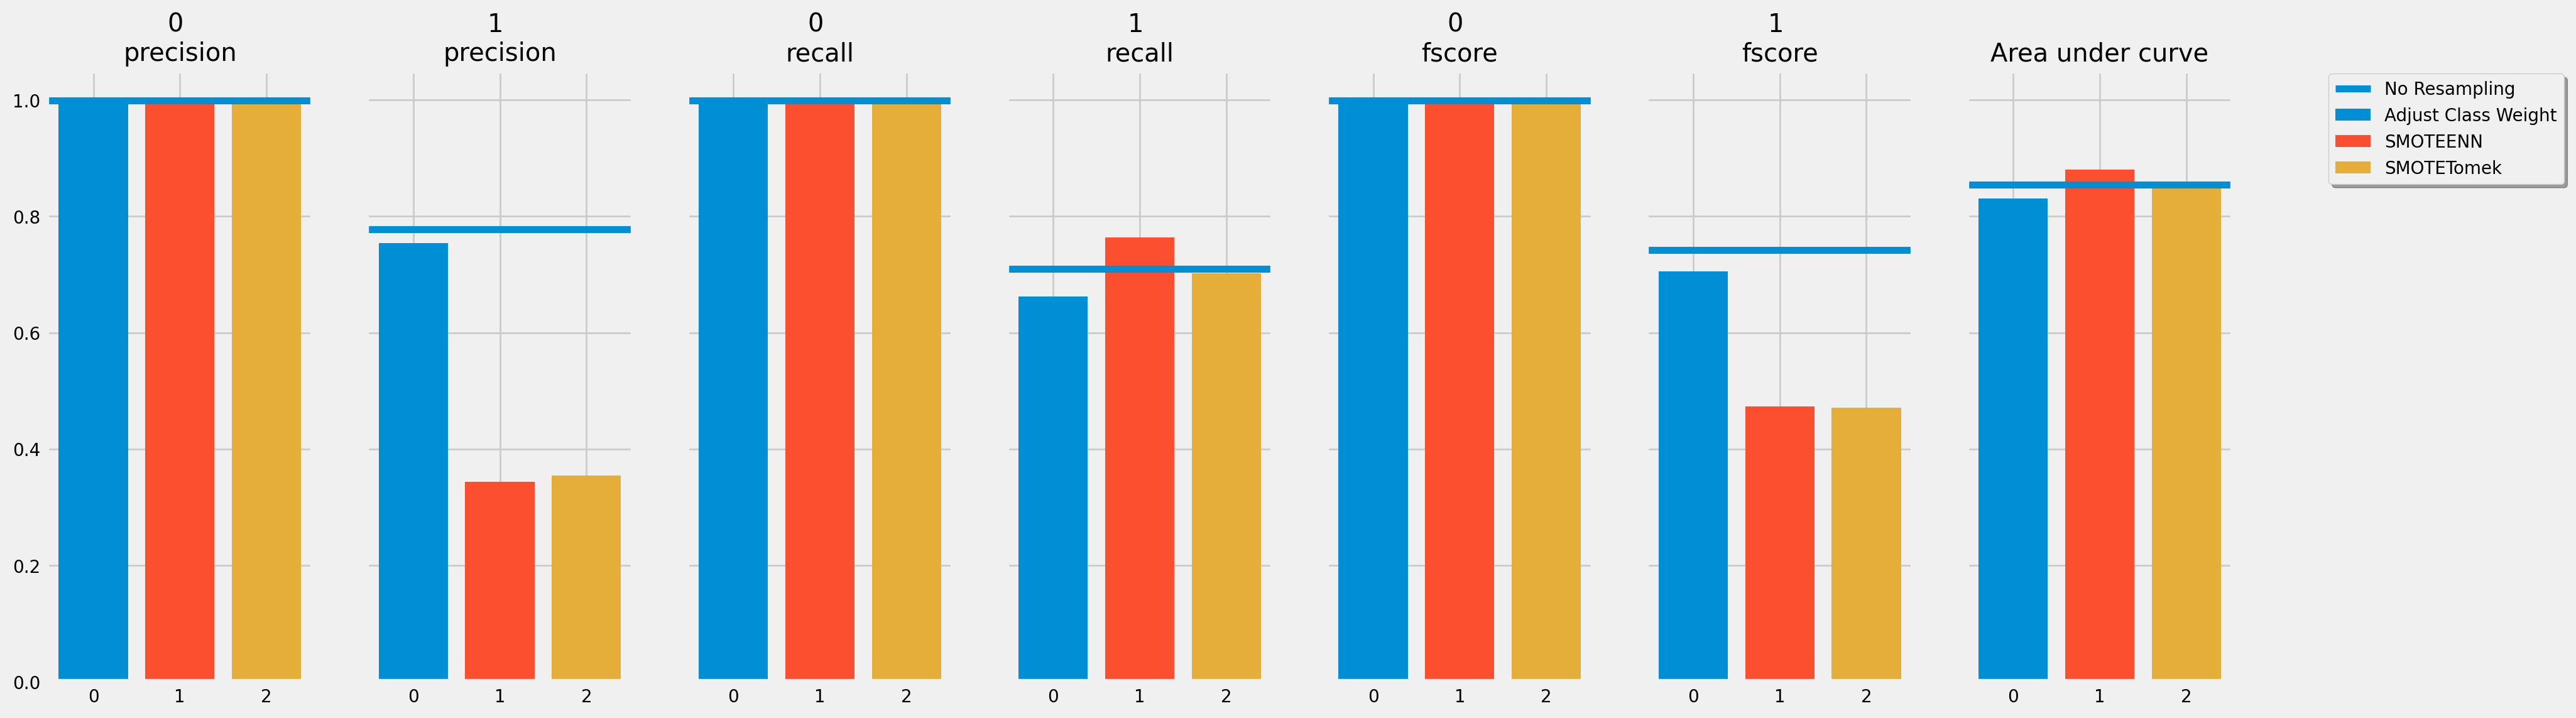

In [ ]:
# evaluate_method(results, 'combination')

##Random Forest

In [ ]:
# model = RandomForestClassifier()
# results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: SMOTE
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: ADASYN
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({1: 199035, 0: 199020})
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss1
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss2
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: TomekLinks
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 198997, 1: 344})
Technique: EditedNearestNeighbours
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Count

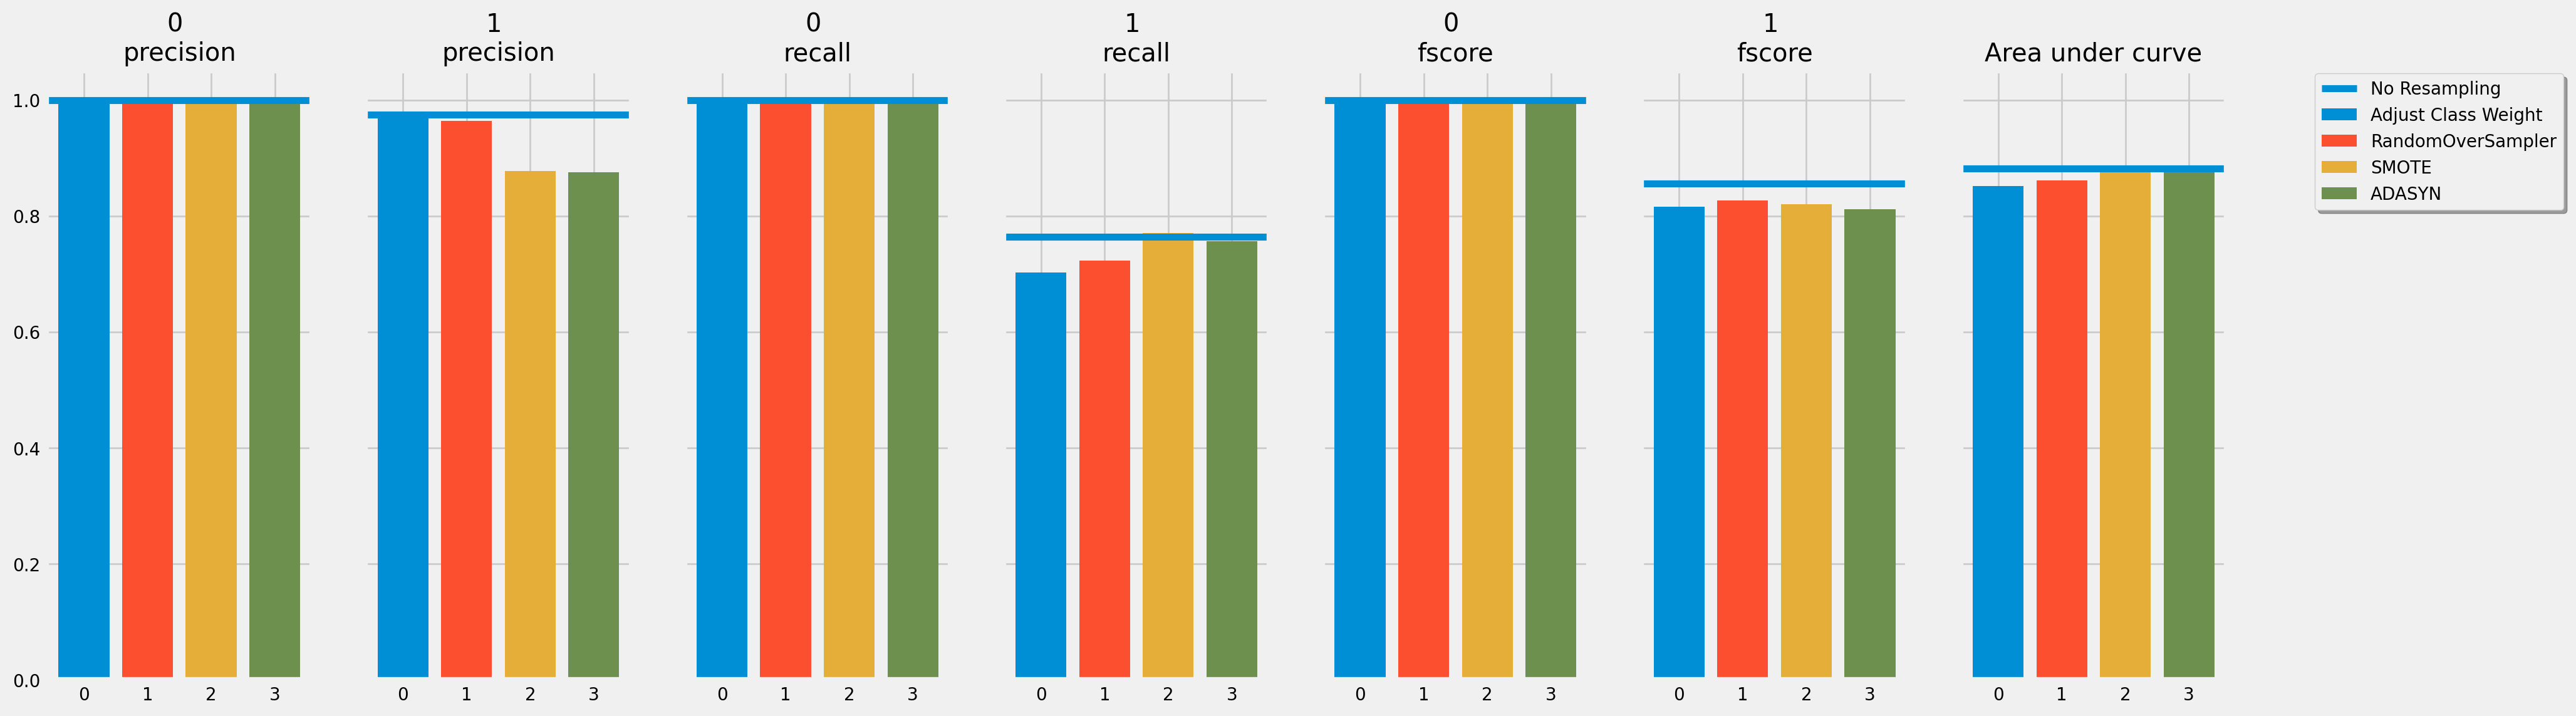

In [ ]:
# evaluate_method(results, 'oversample')

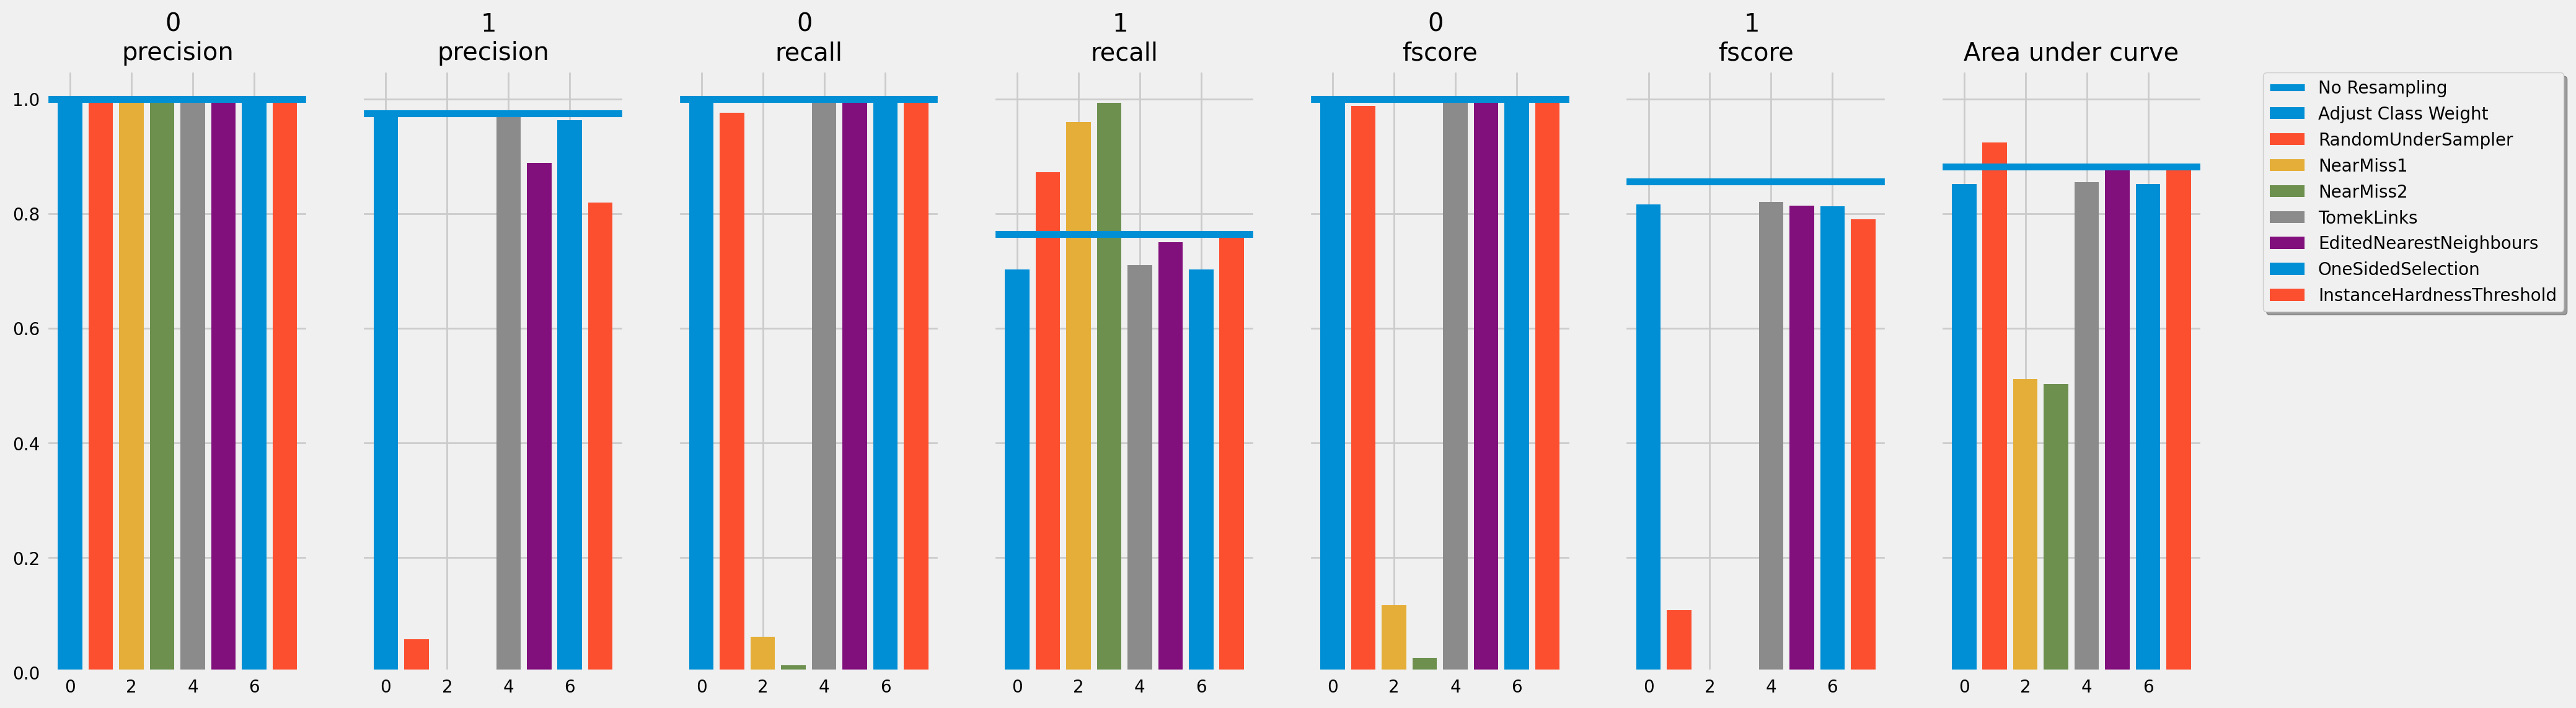

In [ ]:
# evaluate_method(results, 'undersample')

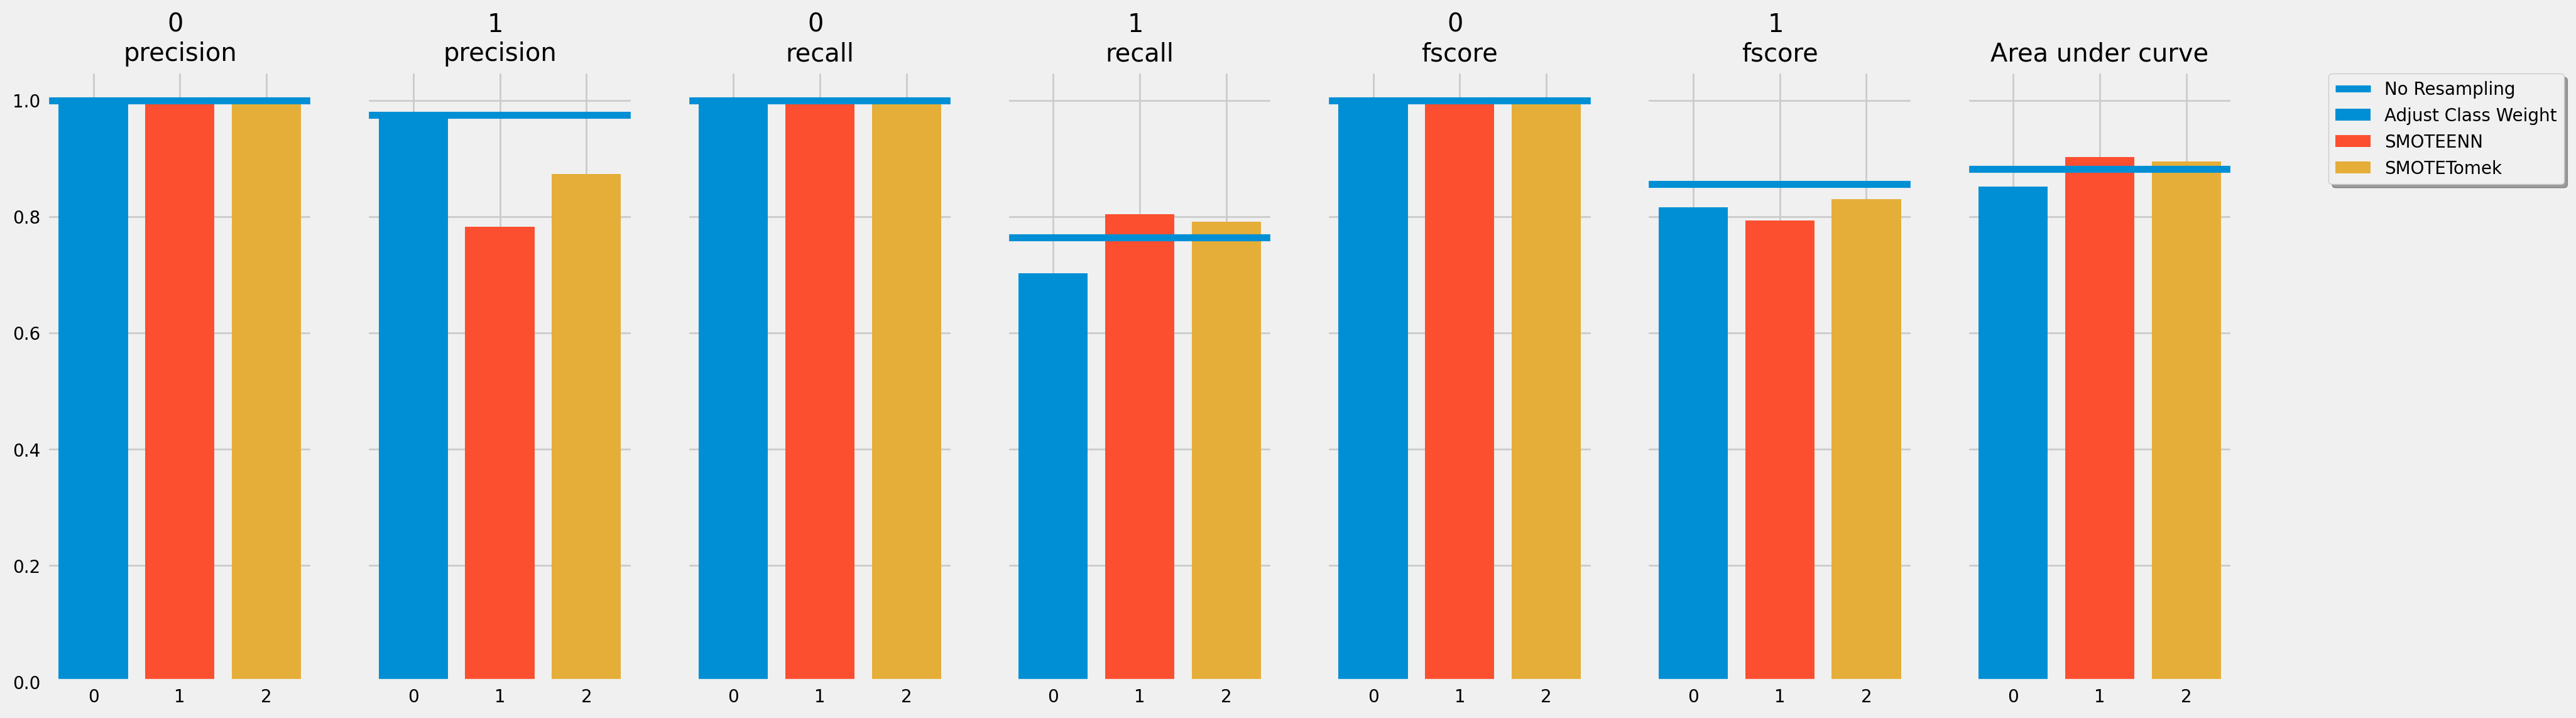

In [ ]:
# evaluate_method(results, 'combination')

## SVC

In [ ]:
# model = SVC()
# results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: SMOTE
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: ADASYN
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({1: 199035, 0: 199020})
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss1
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss2
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: TomekLinks
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 198997, 1: 344})
Technique: EditedNearestNeighbours
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Count

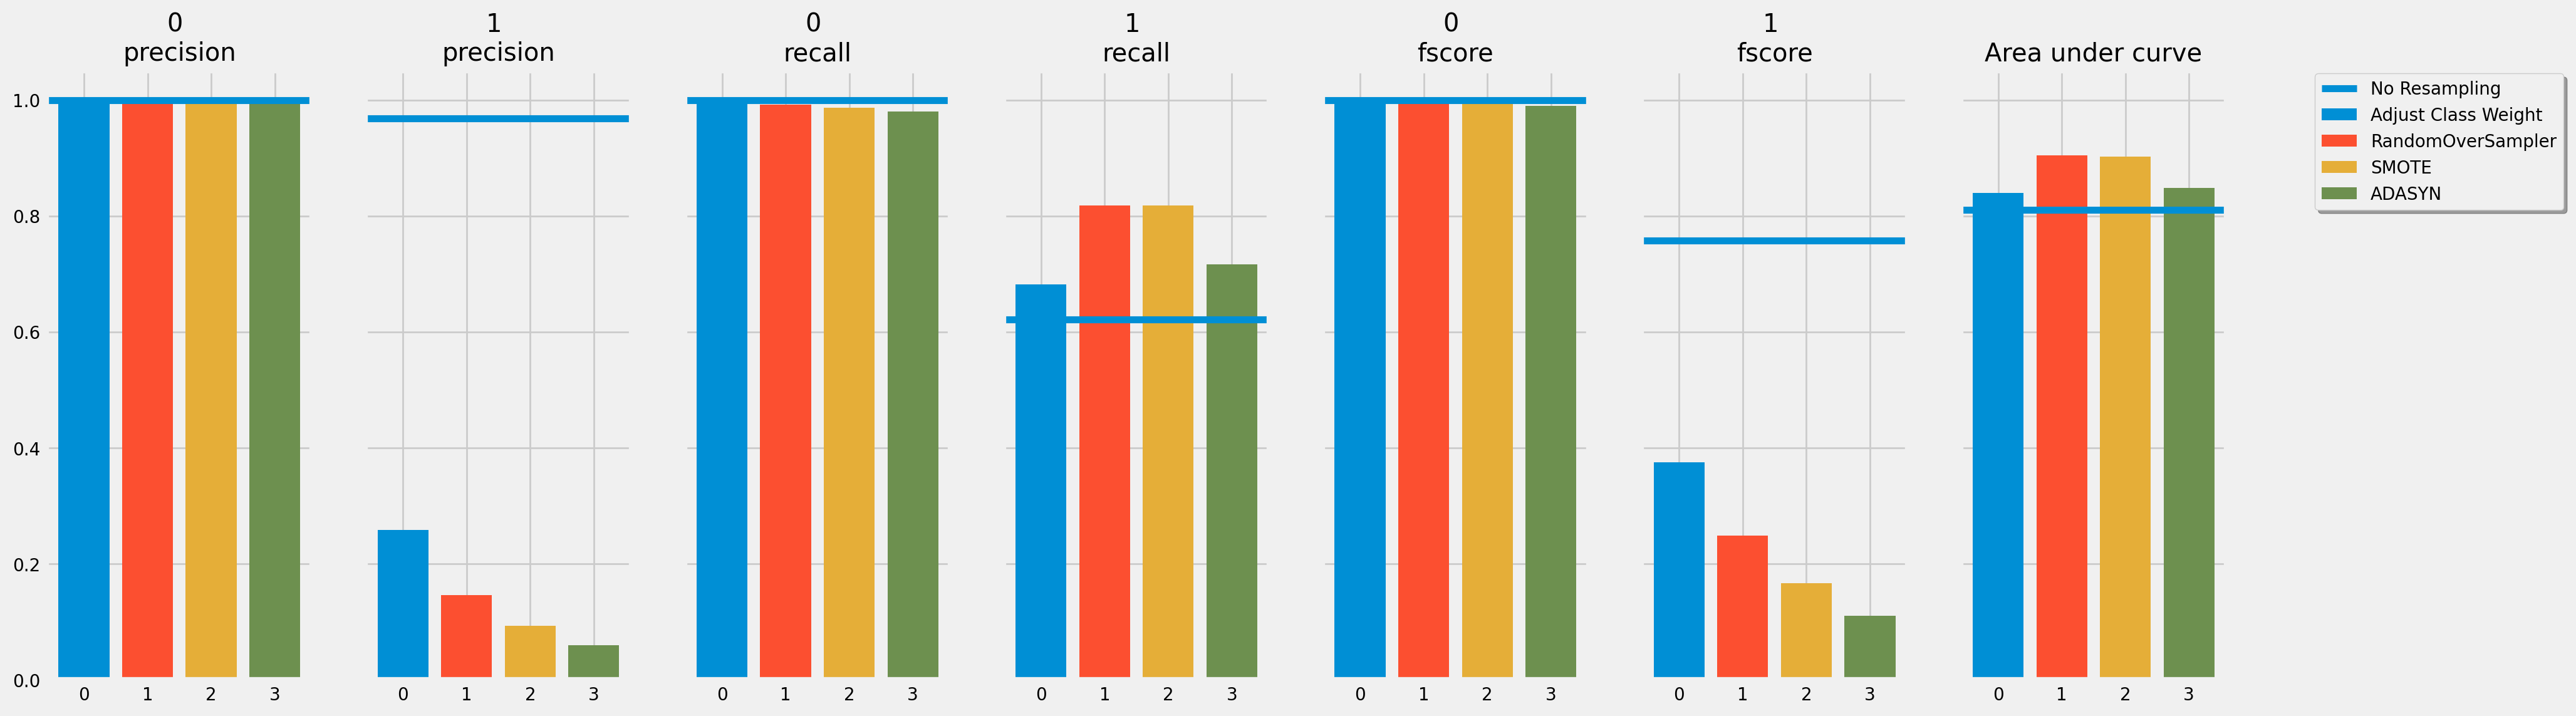

In [ ]:
# evaluate_method(results, 'oversample')

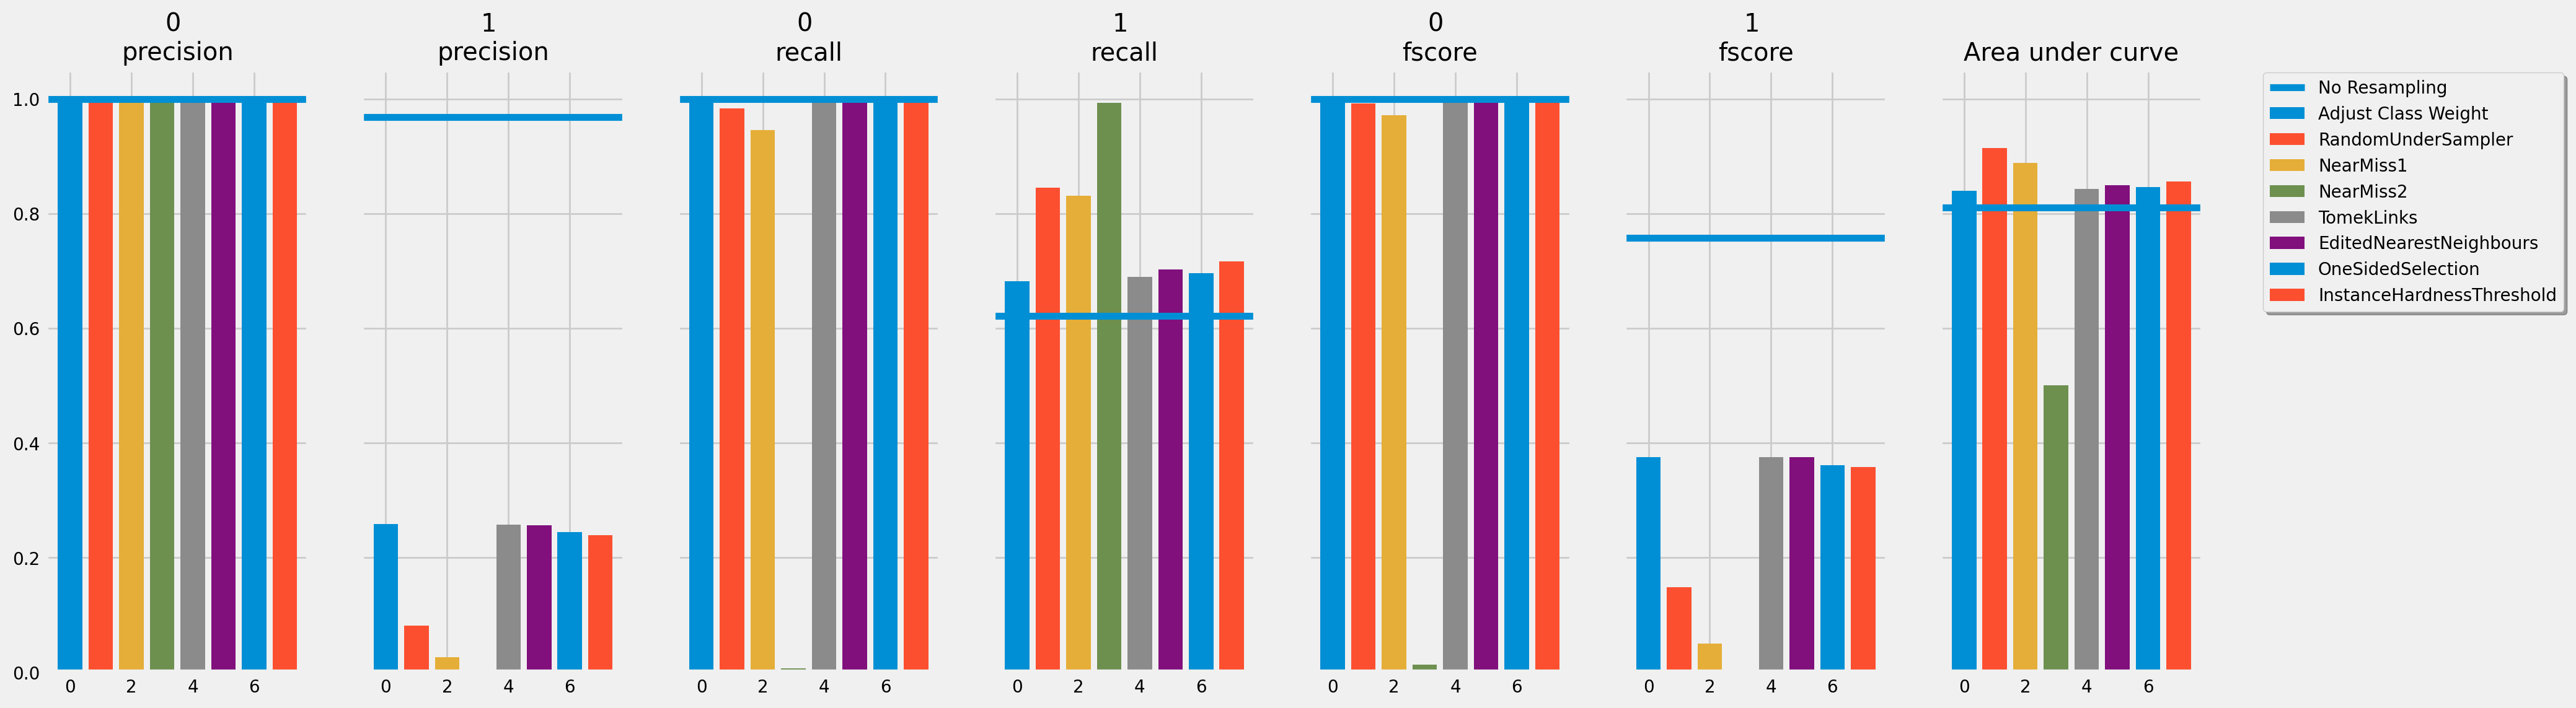

In [ ]:
# evaluate_method(results, 'undersample')

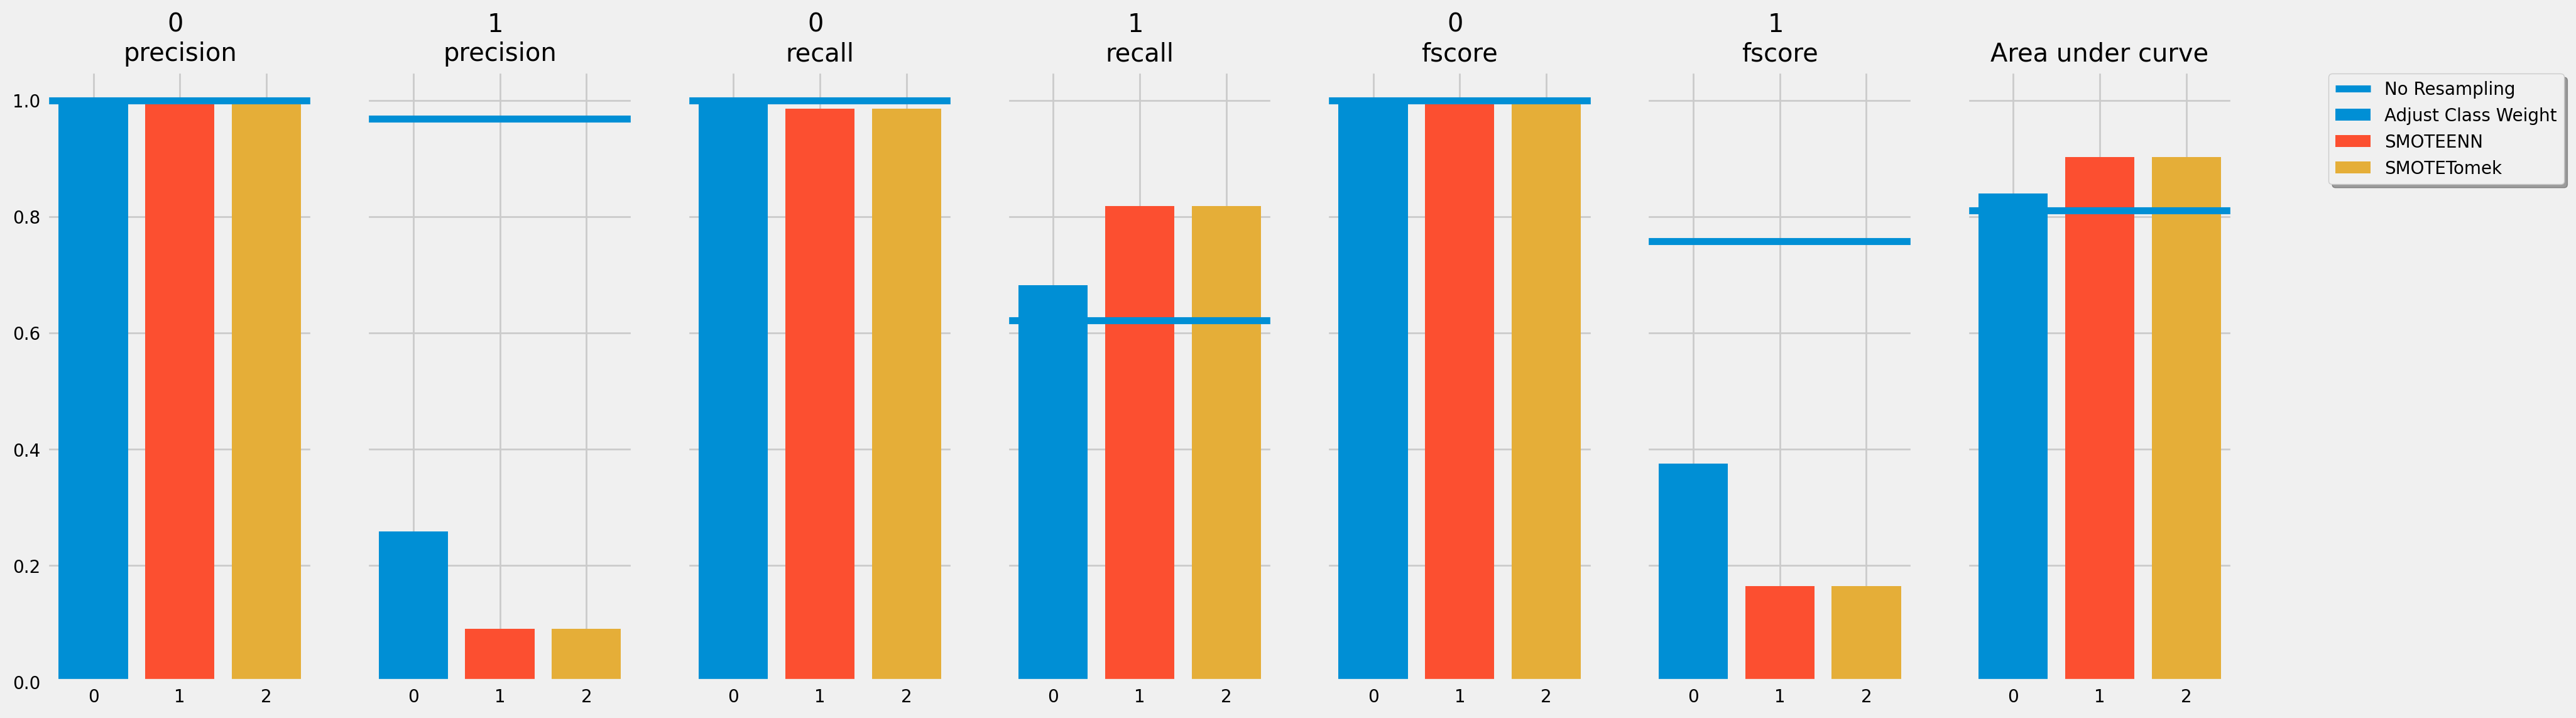

In [ ]:
# evaluate_method(results, 'combination')

## Regressão Logística

In [ ]:
# model = LogisticRegression()
# results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: SMOTE
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: ADASYN
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({1: 199035, 0: 199020})
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss1
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss2
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: TomekLinks
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 198997, 1: 344})
Technique: EditedNearestNeighbours
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Count

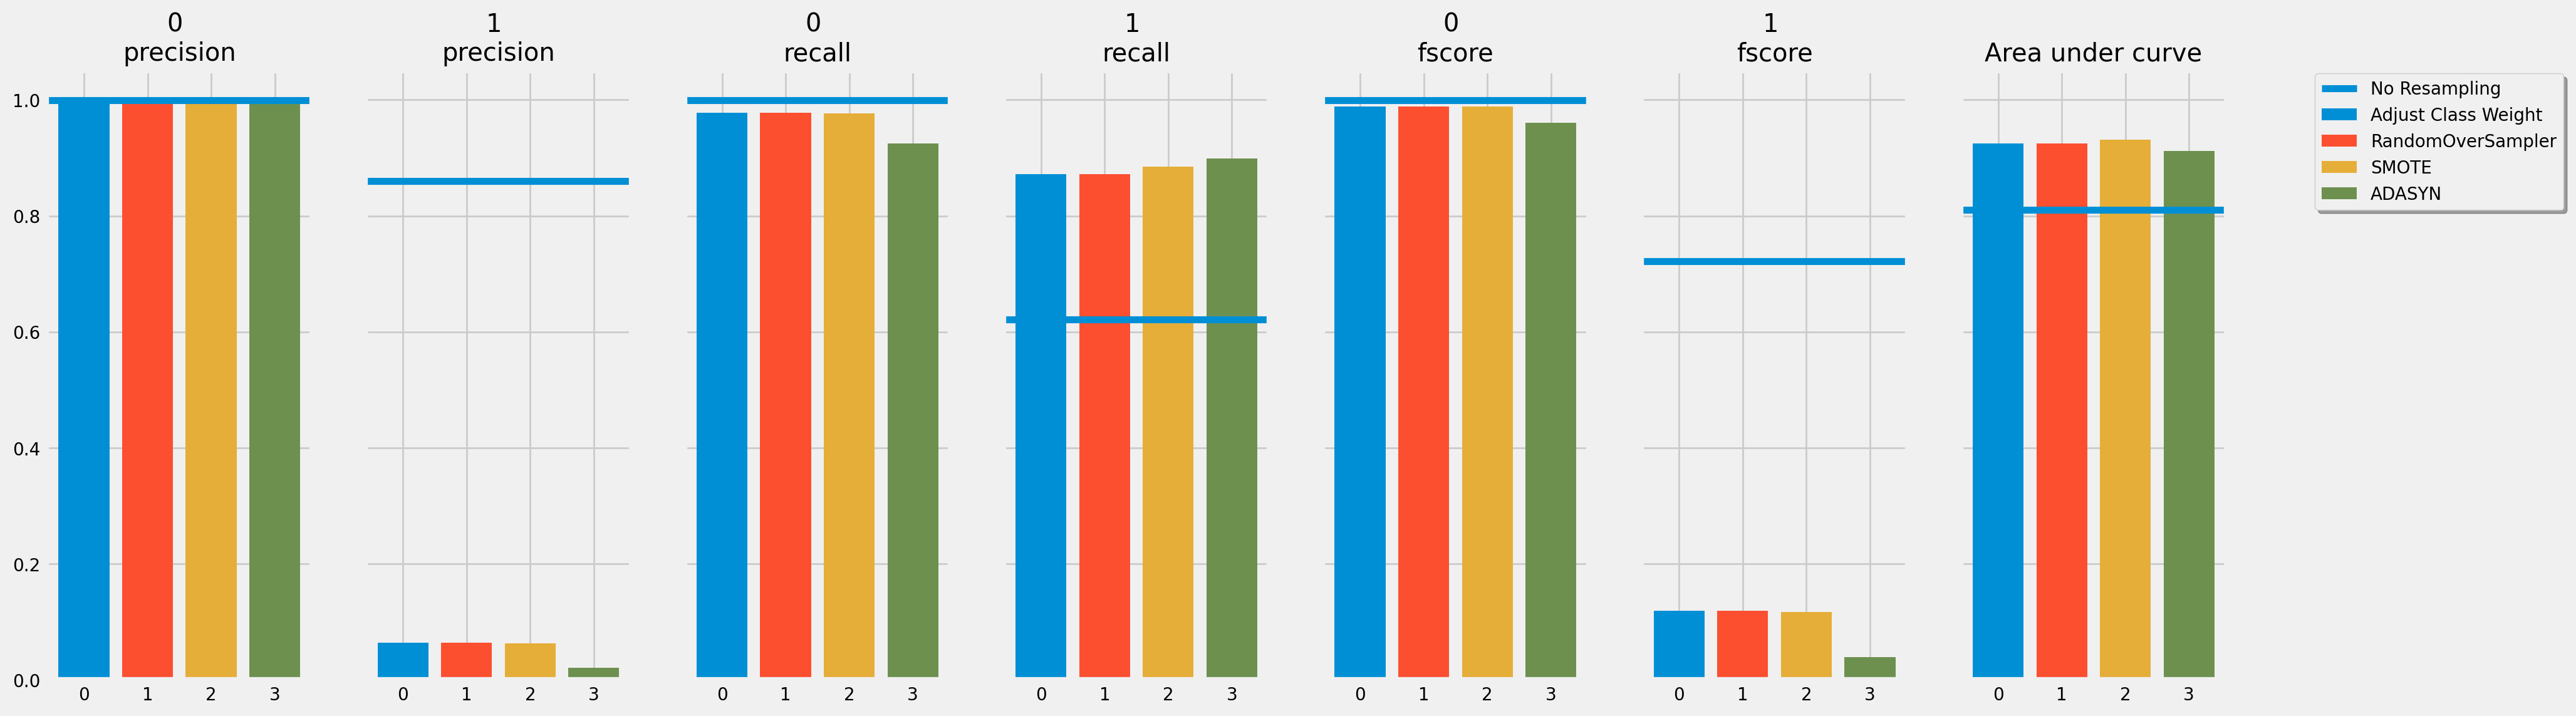

In [ ]:
# evaluate_method(results, 'oversample')

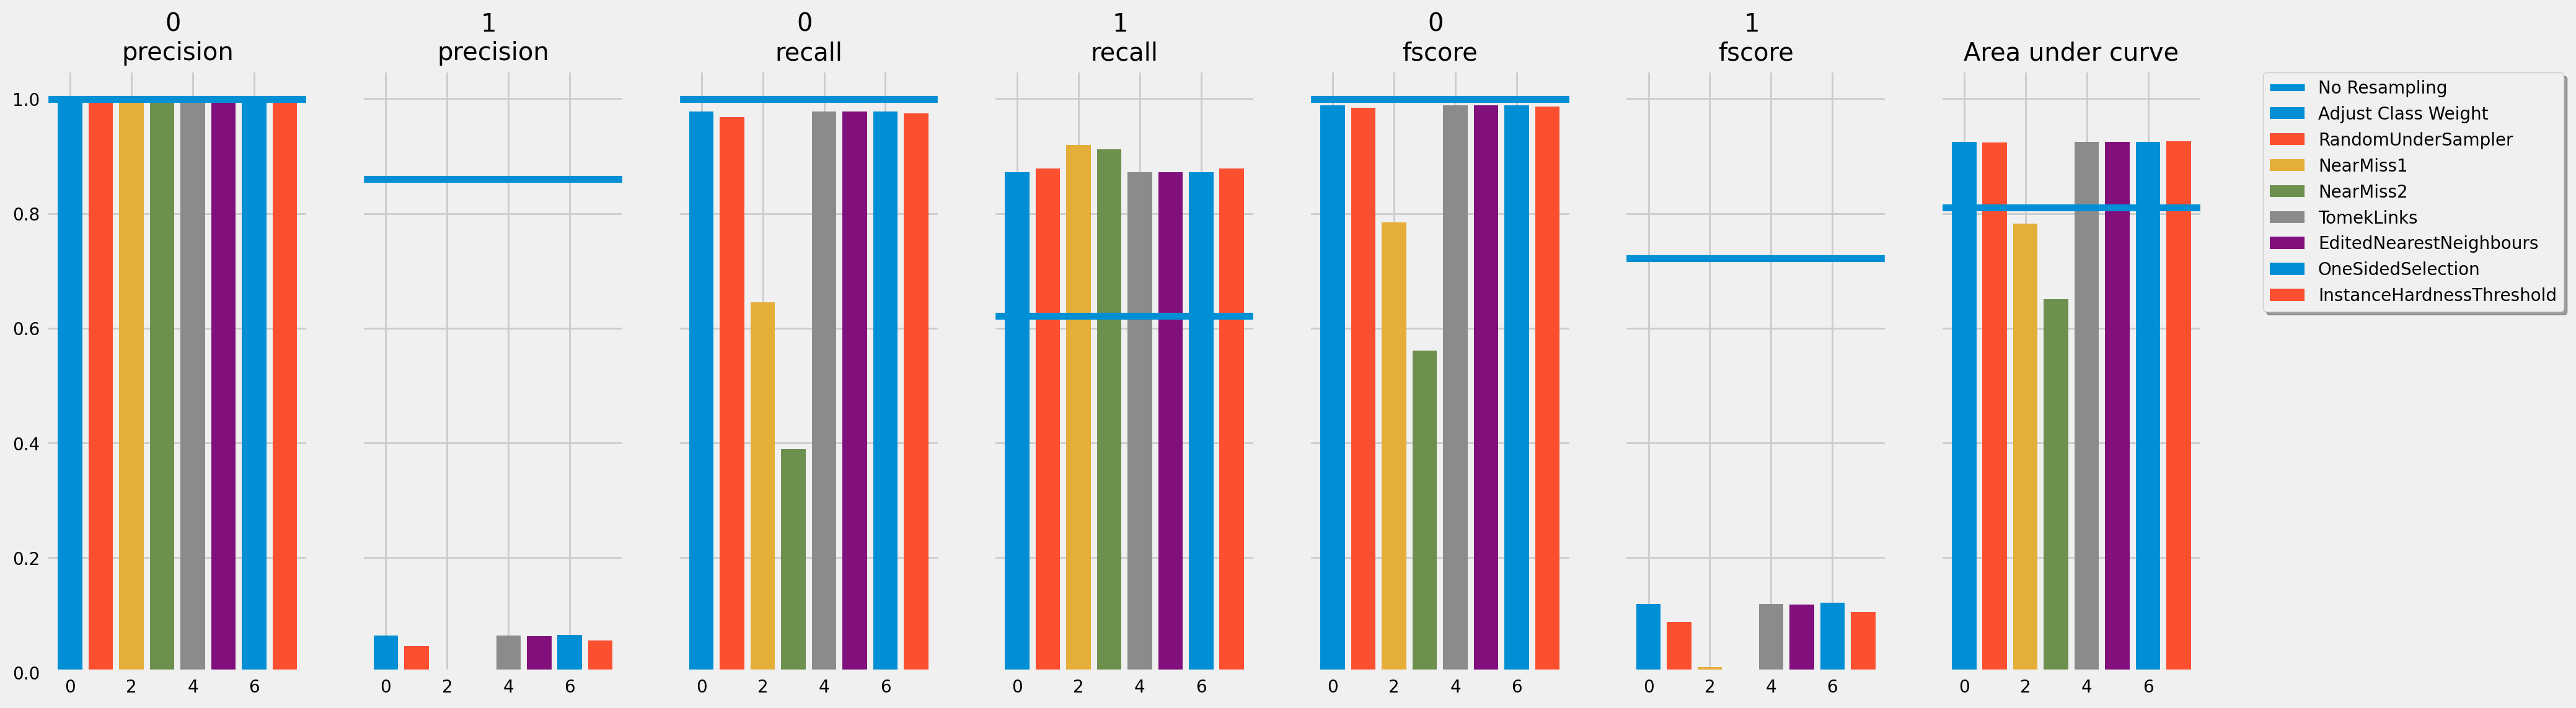

In [ ]:
# evaluate_method(results, 'undersample')

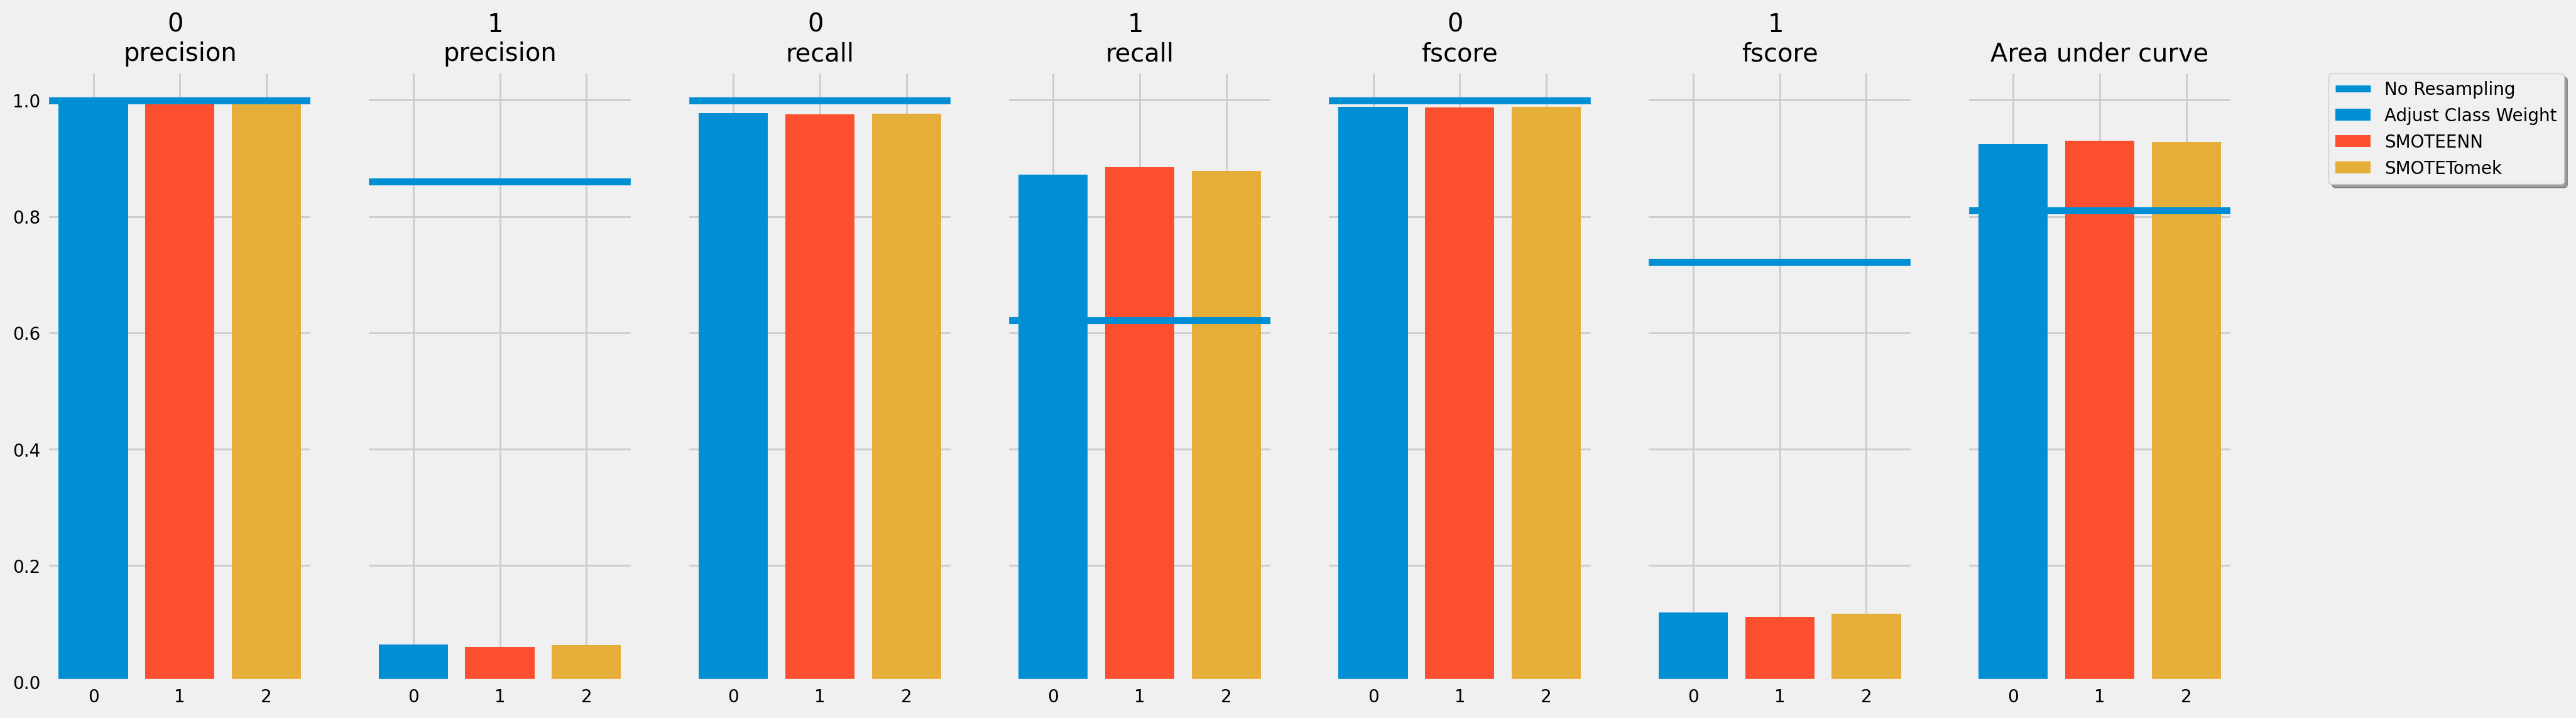

In [ ]:
# evaluate_method(results, 'combination')

## K Neighbors

In [ ]:
# model = KNeighborsClassifier()
# results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: SMOTE
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: ADASYN
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({1: 199035, 0: 199020})
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss1
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss2
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: TomekLinks
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 198997, 1: 344})
Technique: EditedNearestNeighbours
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Count

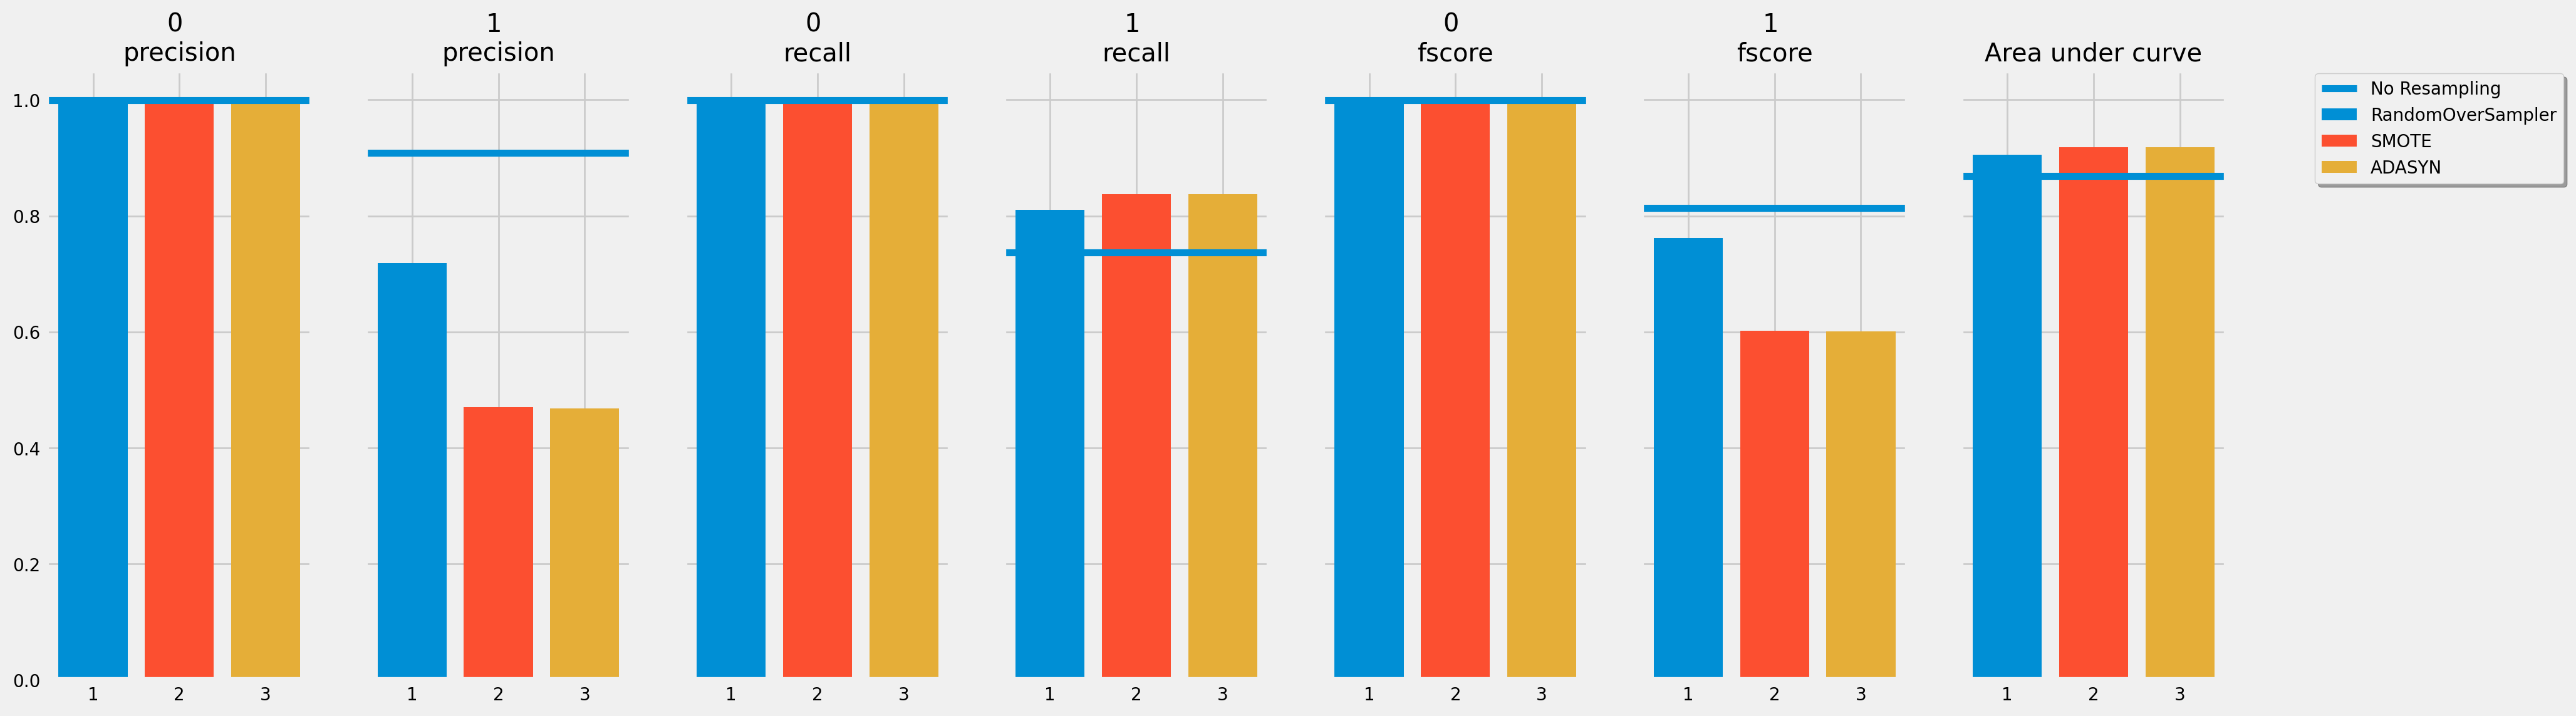

In [ ]:
# evaluate_method(results, 'oversample')

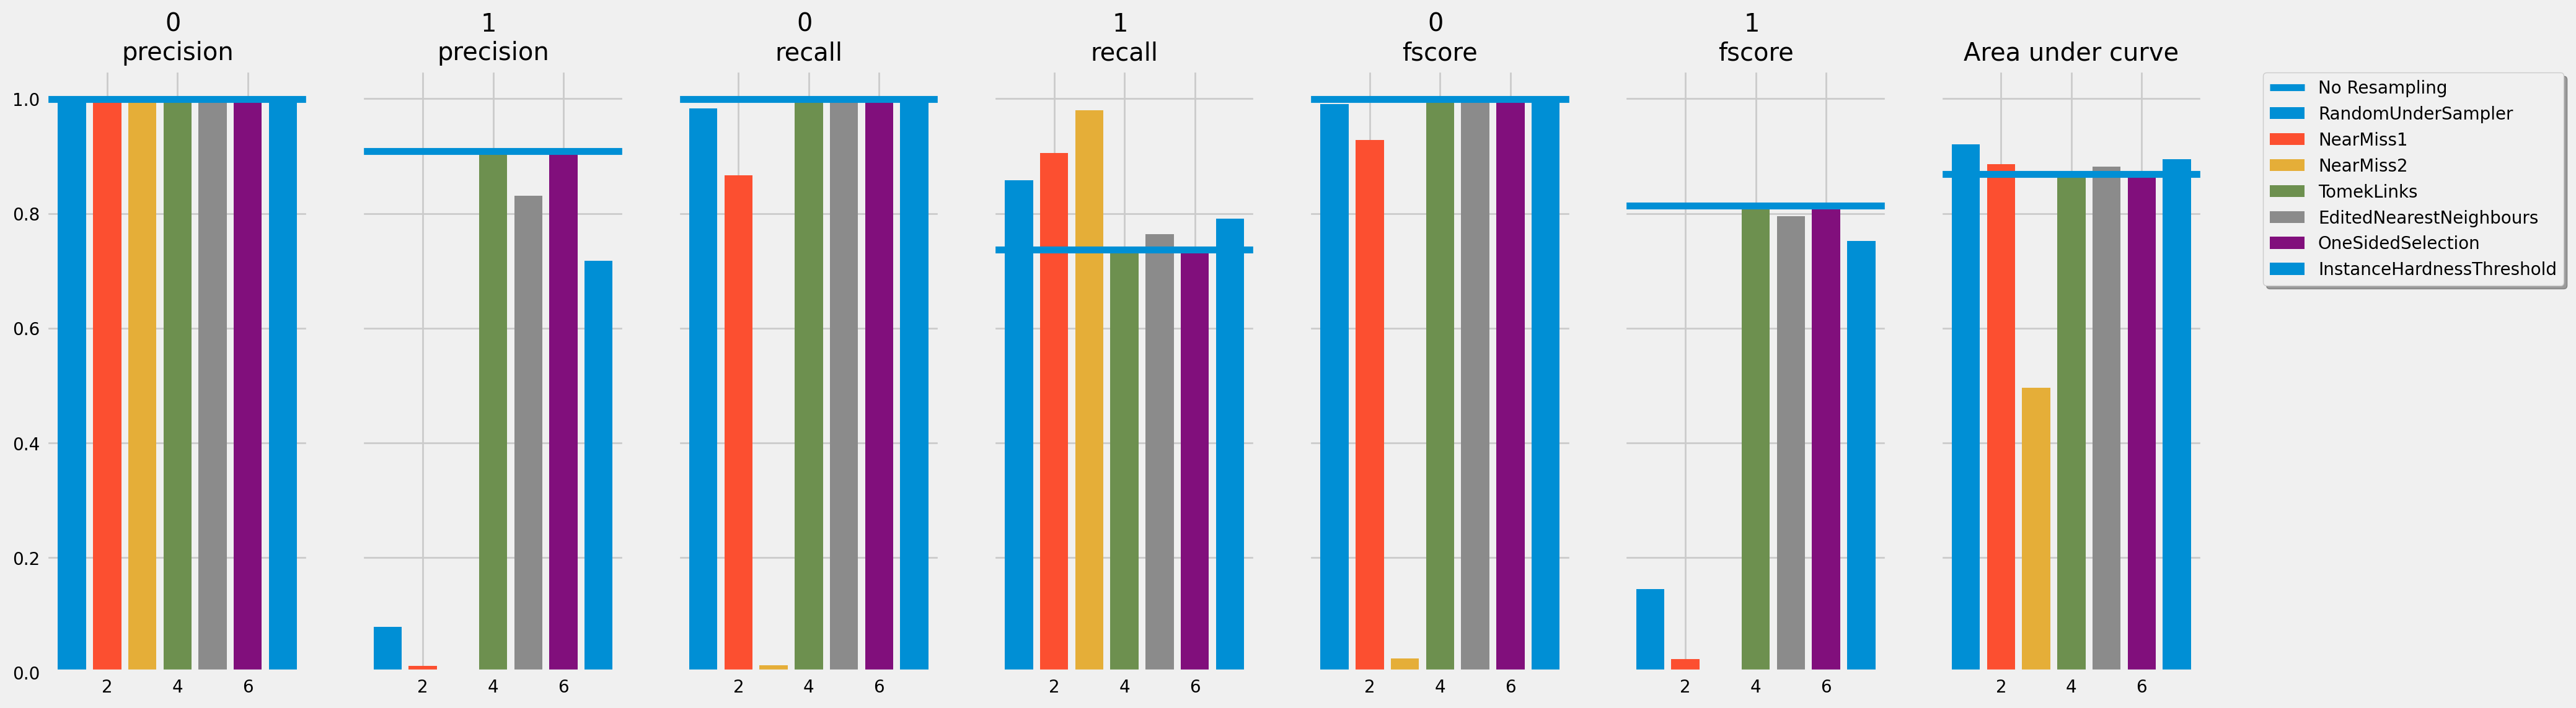

In [ ]:
# evaluate_method(results, 'undersample')

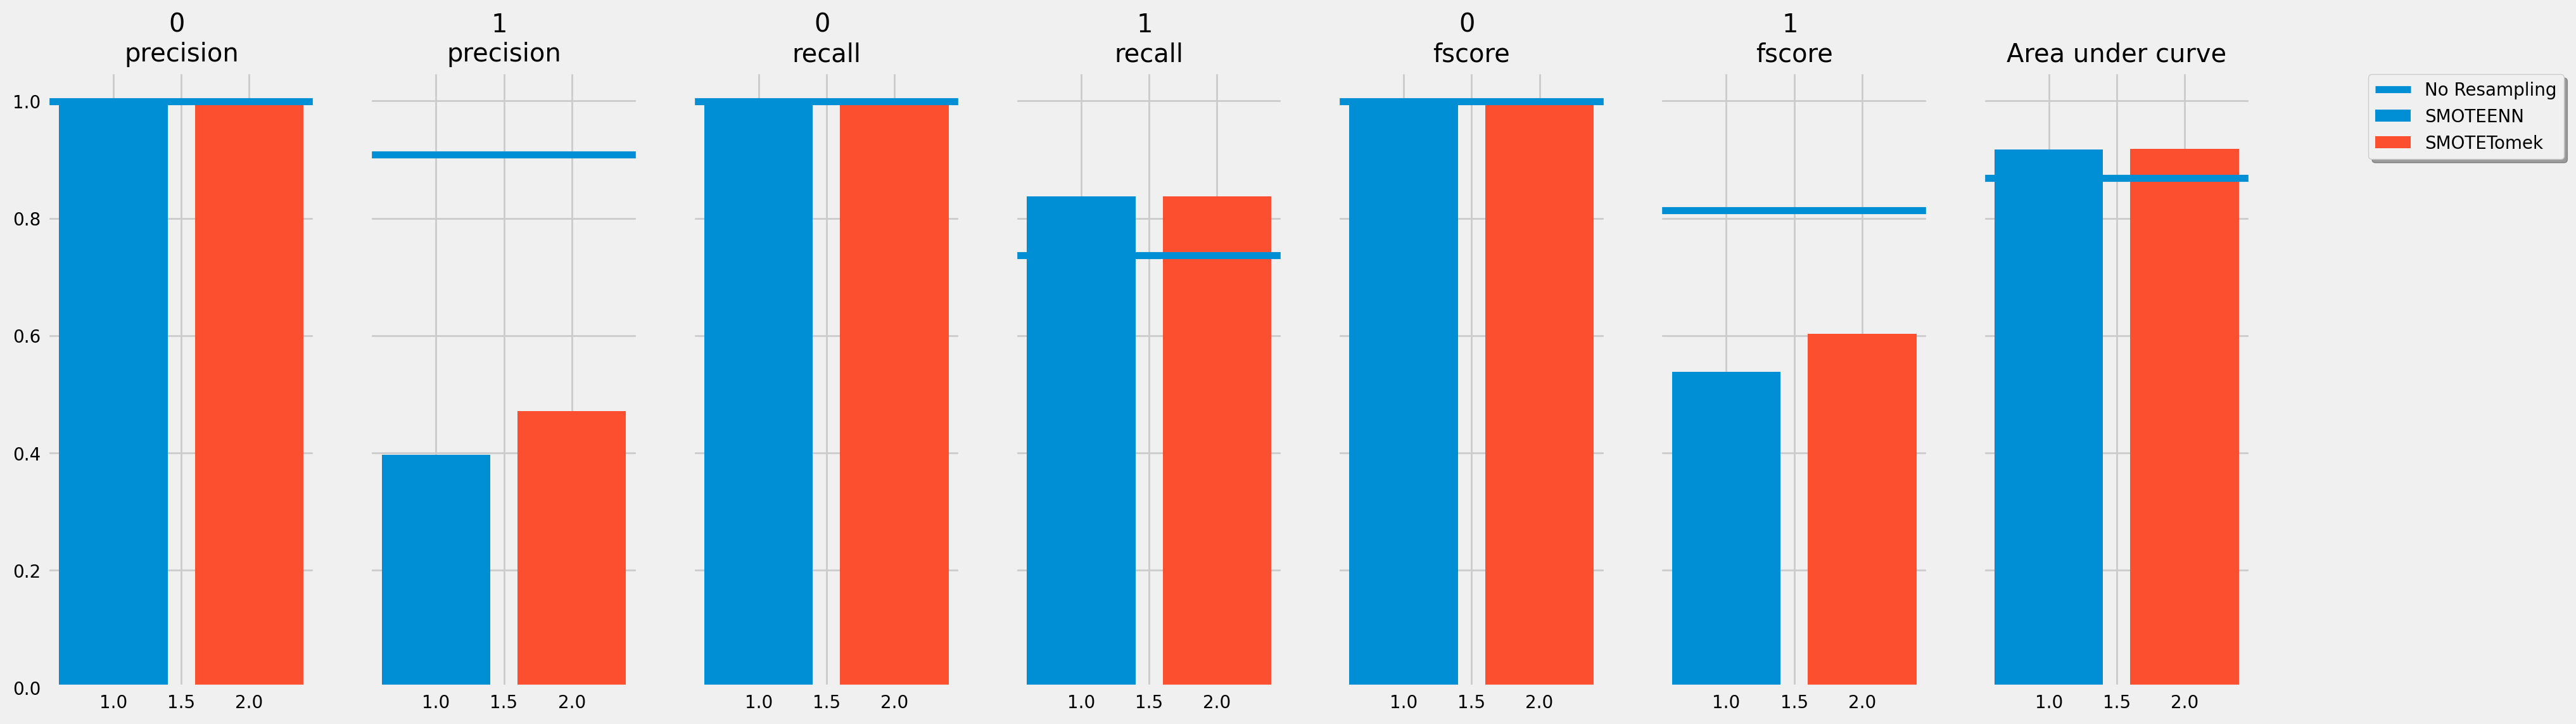

In [ ]:
# evaluate_method(results, 'combination')

## ADA Boost

In [ ]:
# model = AdaBoostClassifier()
# results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: SMOTE
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: ADASYN
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({1: 199035, 0: 199020})
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss1
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss2
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: TomekLinks
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 198997, 1: 344})
Technique: EditedNearestNeighbours
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Count

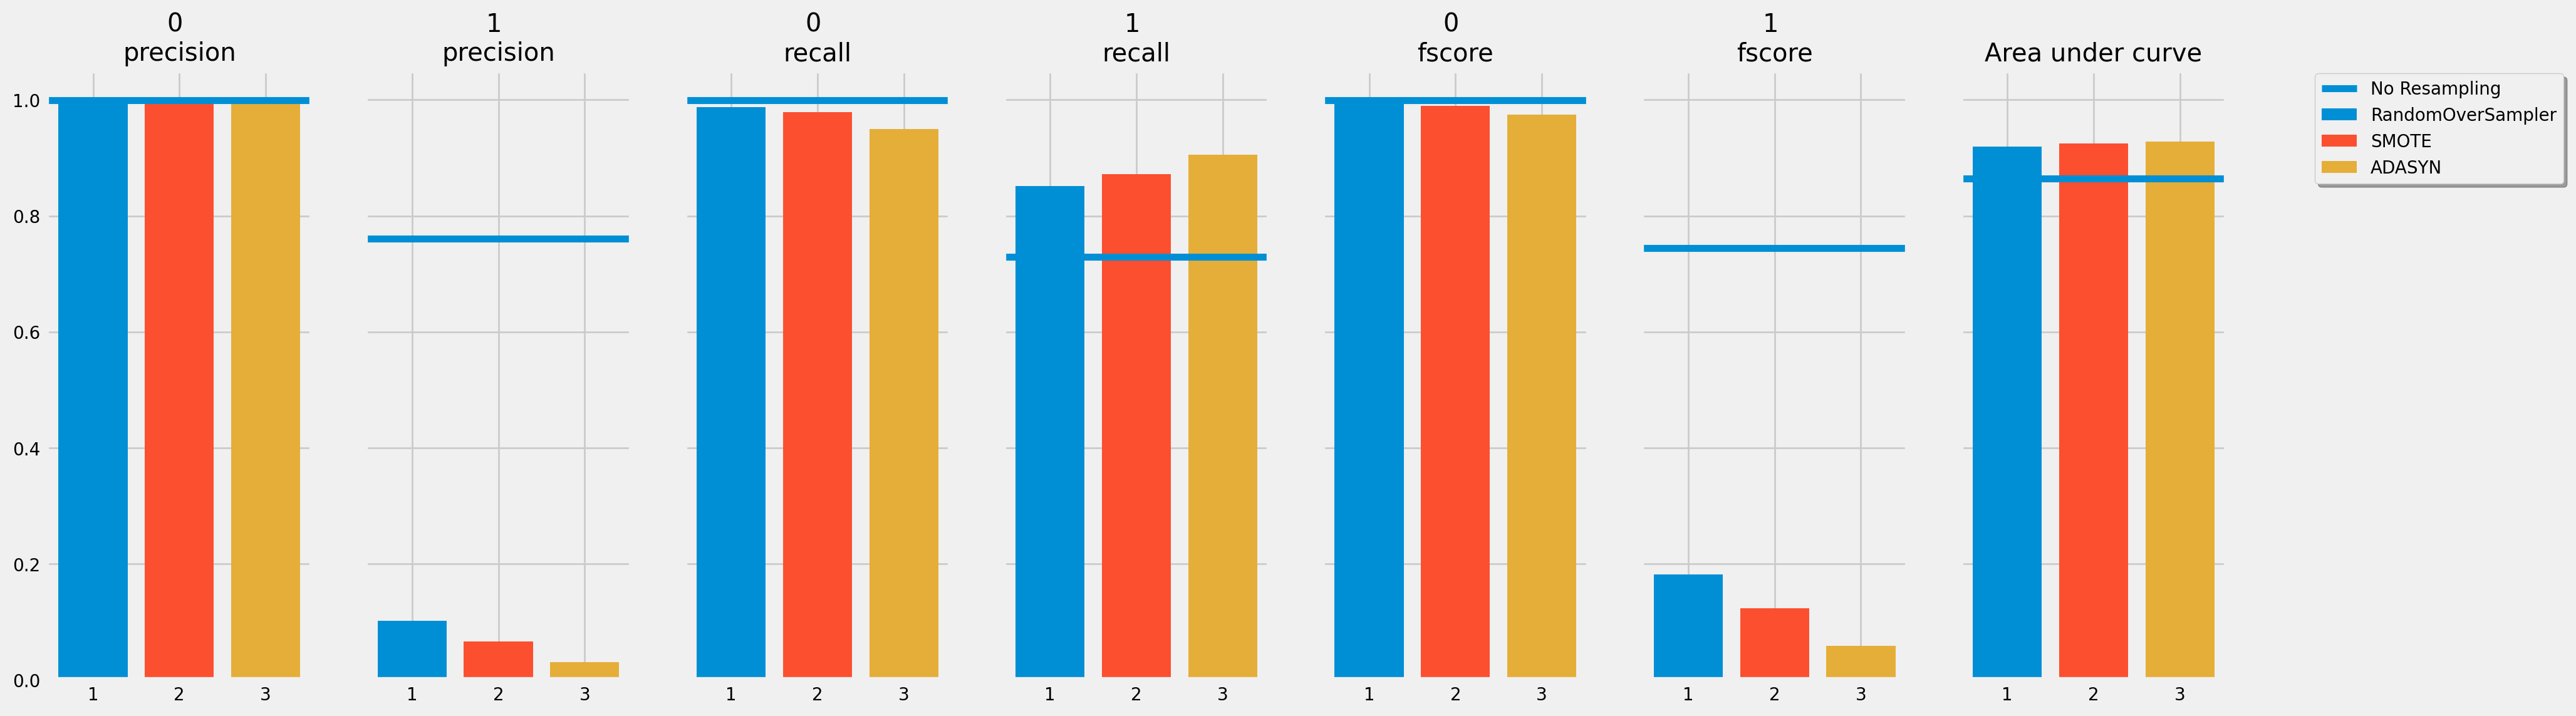

In [ ]:
# evaluate_method(results, 'oversample')

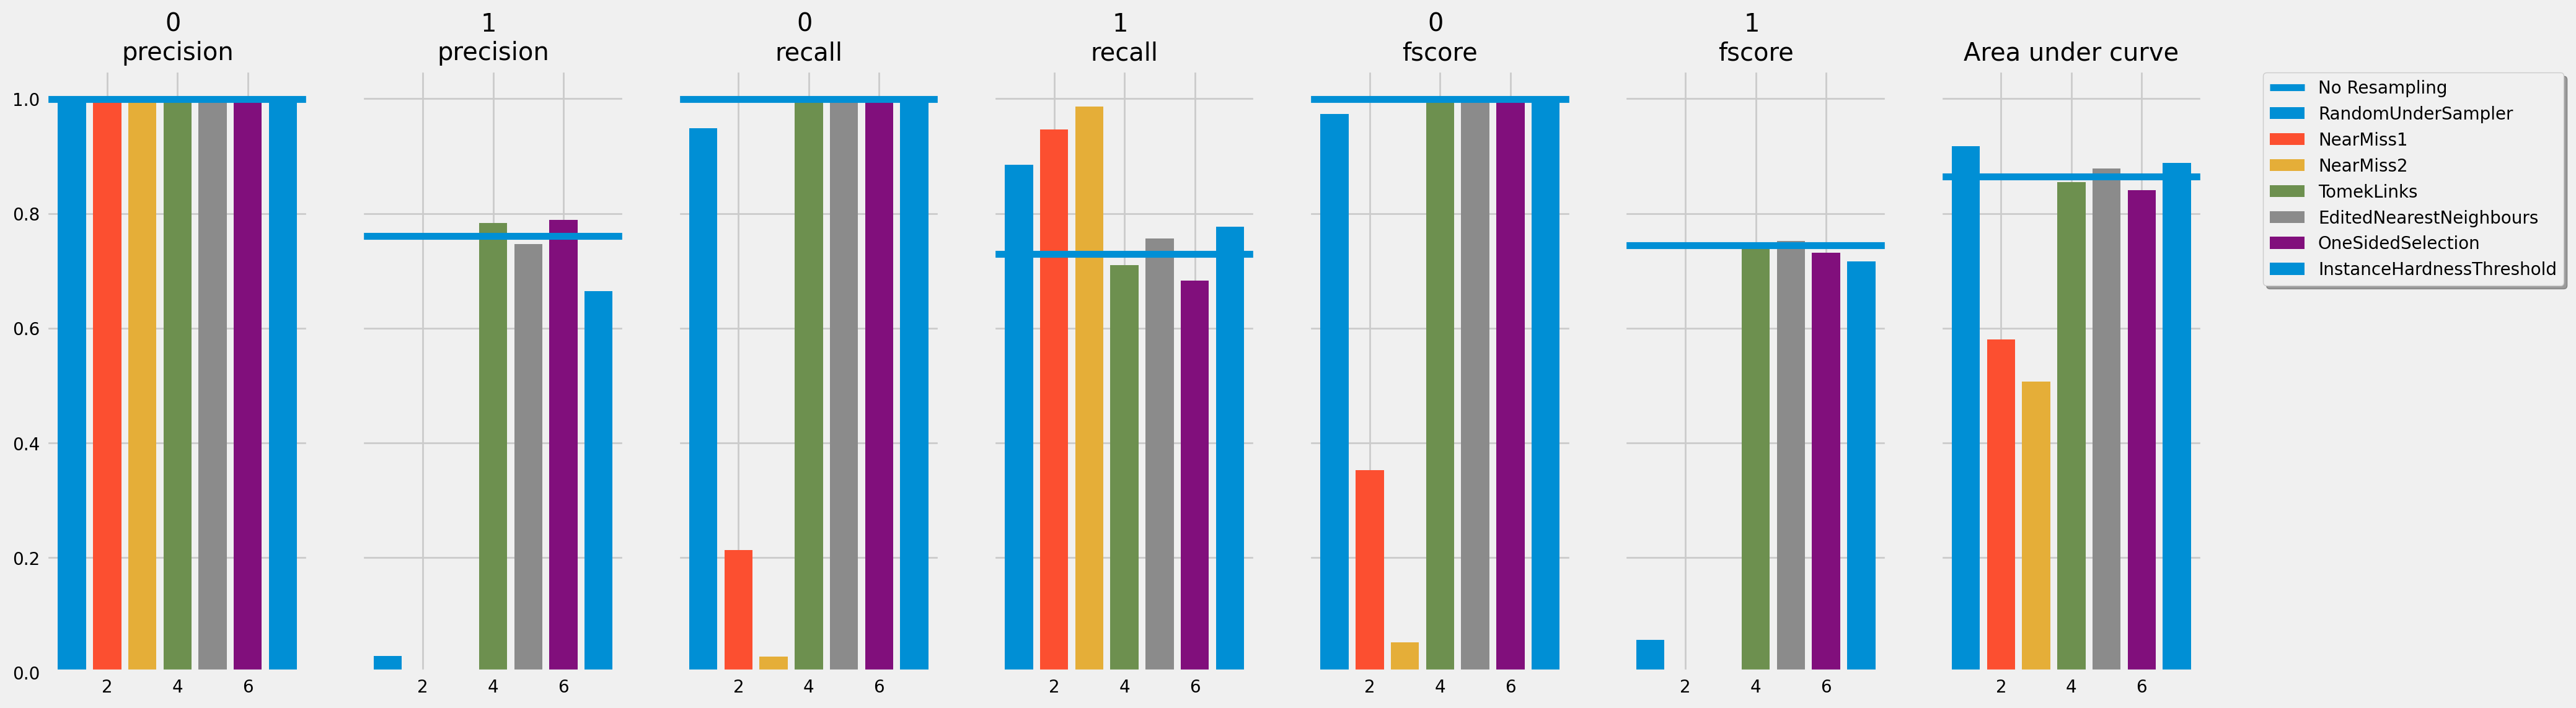

In [ ]:
# evaluate_method(results, 'undersample')

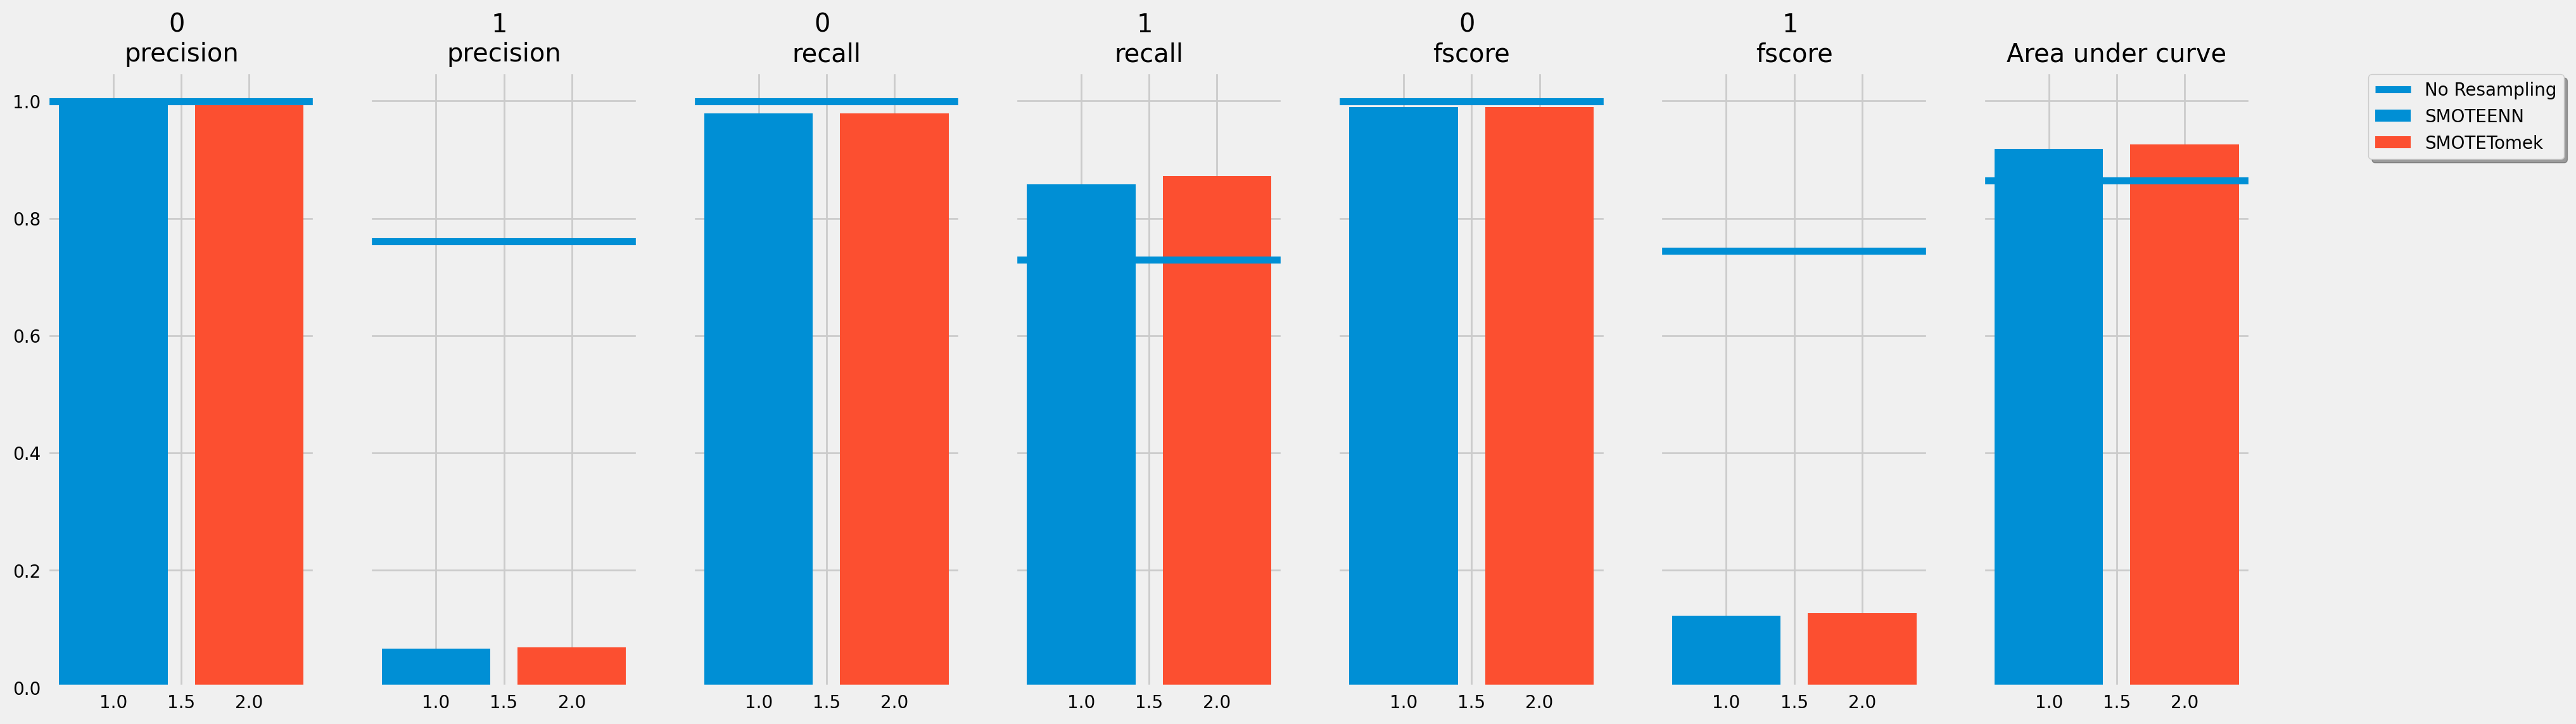

In [ ]:
# evaluate_method(results, 'combination')

## Rede Neural

In [ ]:
# model = MLPClassifier()
# results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: SMOTE
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 199020, 1: 199020})
Technique: ADASYN
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({1: 199035, 0: 199020})
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss1
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: NearMiss2
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 344, 1: 344})
Technique: TomekLinks
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Counter({0: 198997, 1: 344})
Technique: EditedNearestNeighbours
Before resampling: Counter({0: 199020, 1: 344})
After resampling: Count

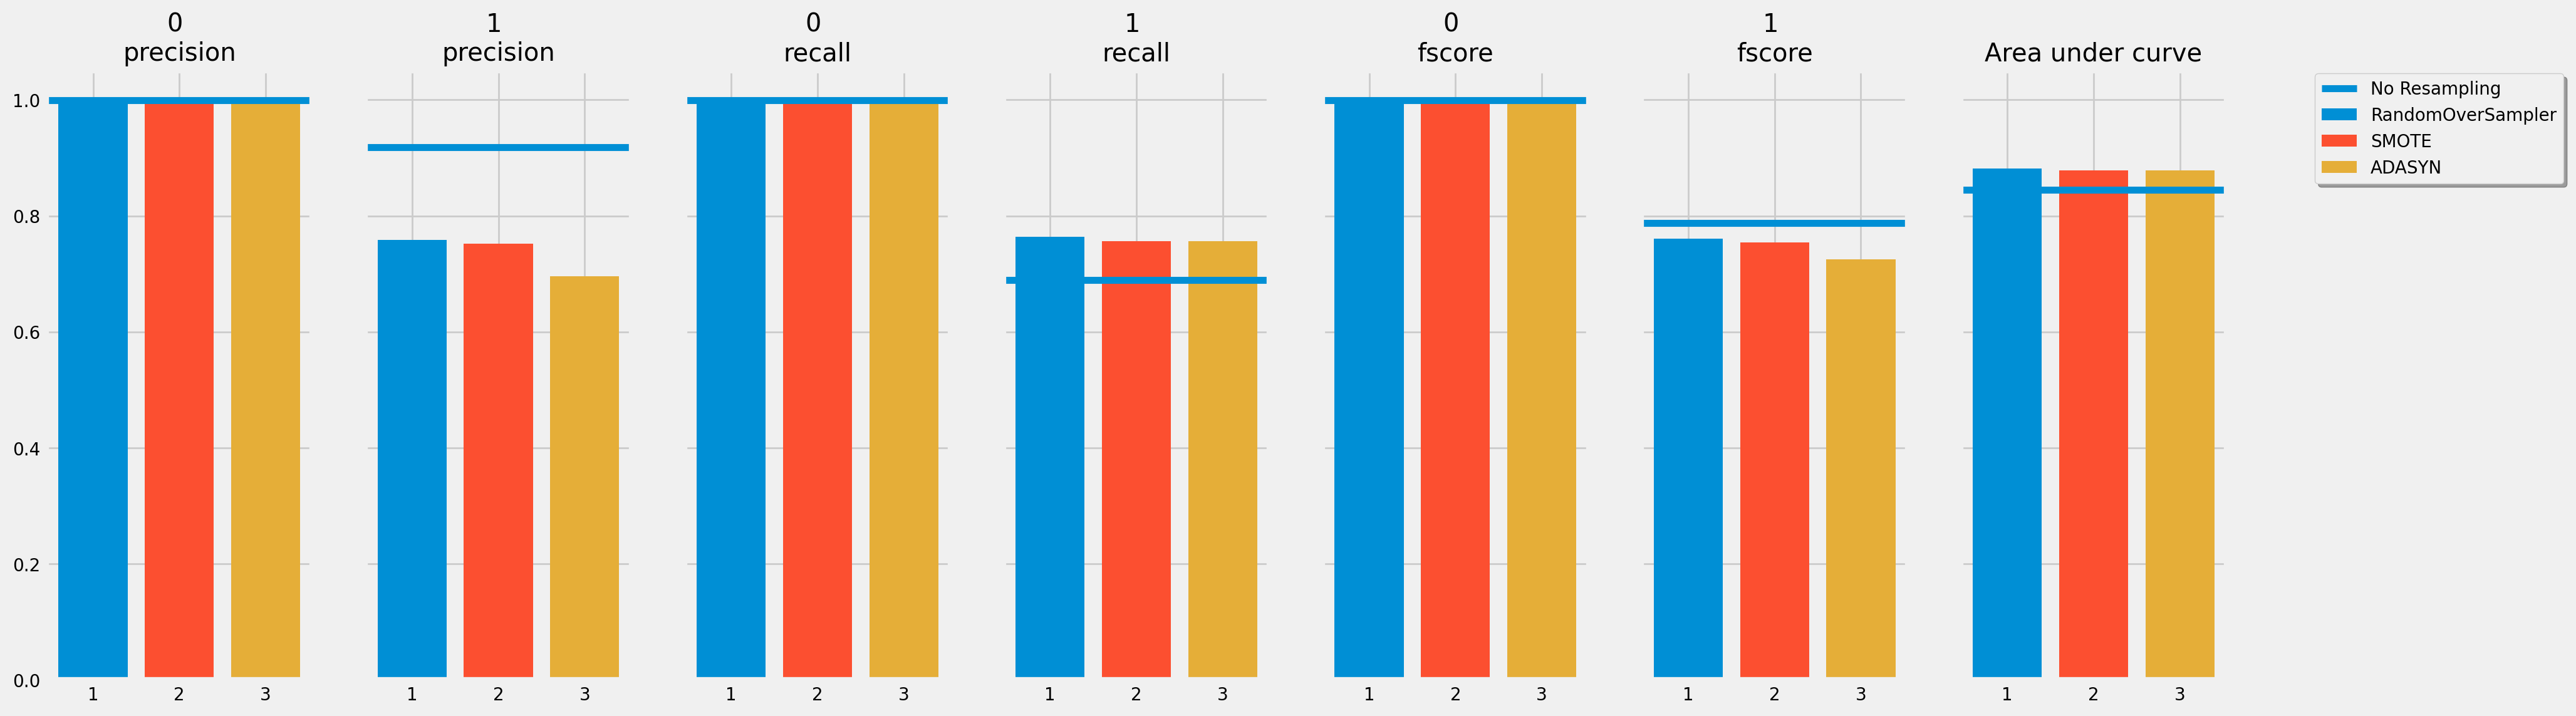

In [ ]:
# evaluate_method(results, 'oversample')

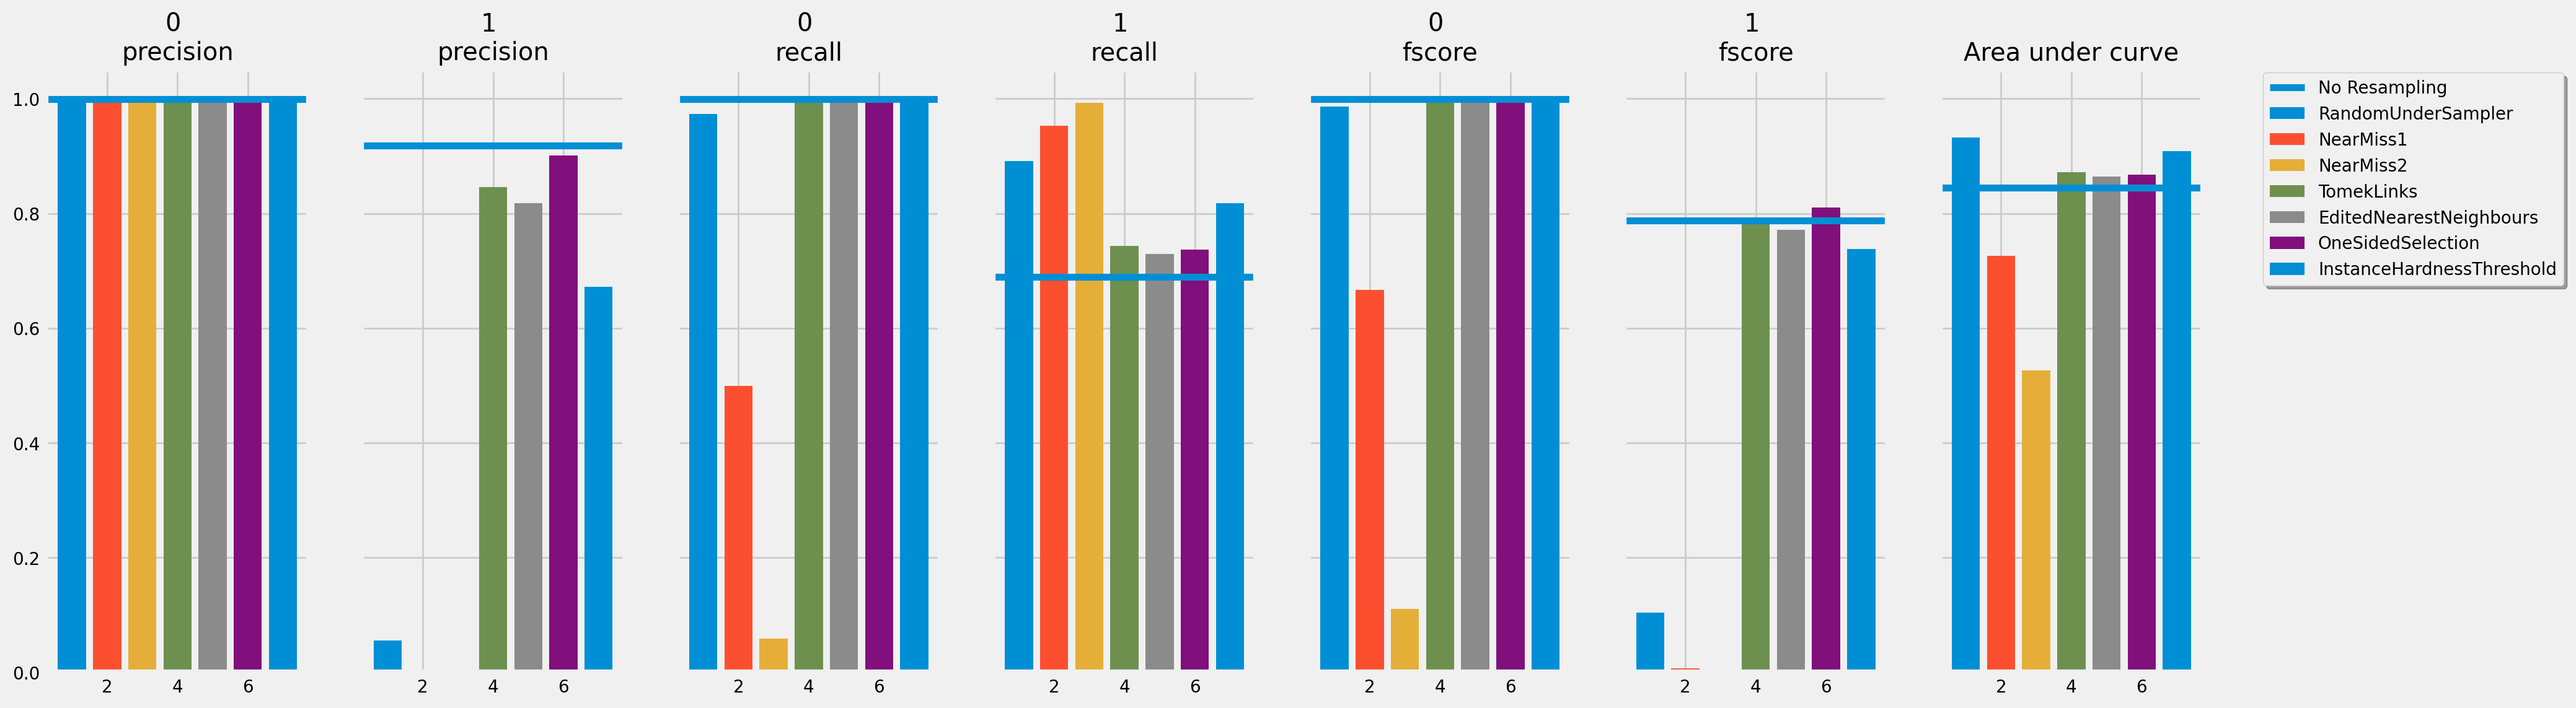

In [ ]:
# evaluate_method(results, 'undersample')

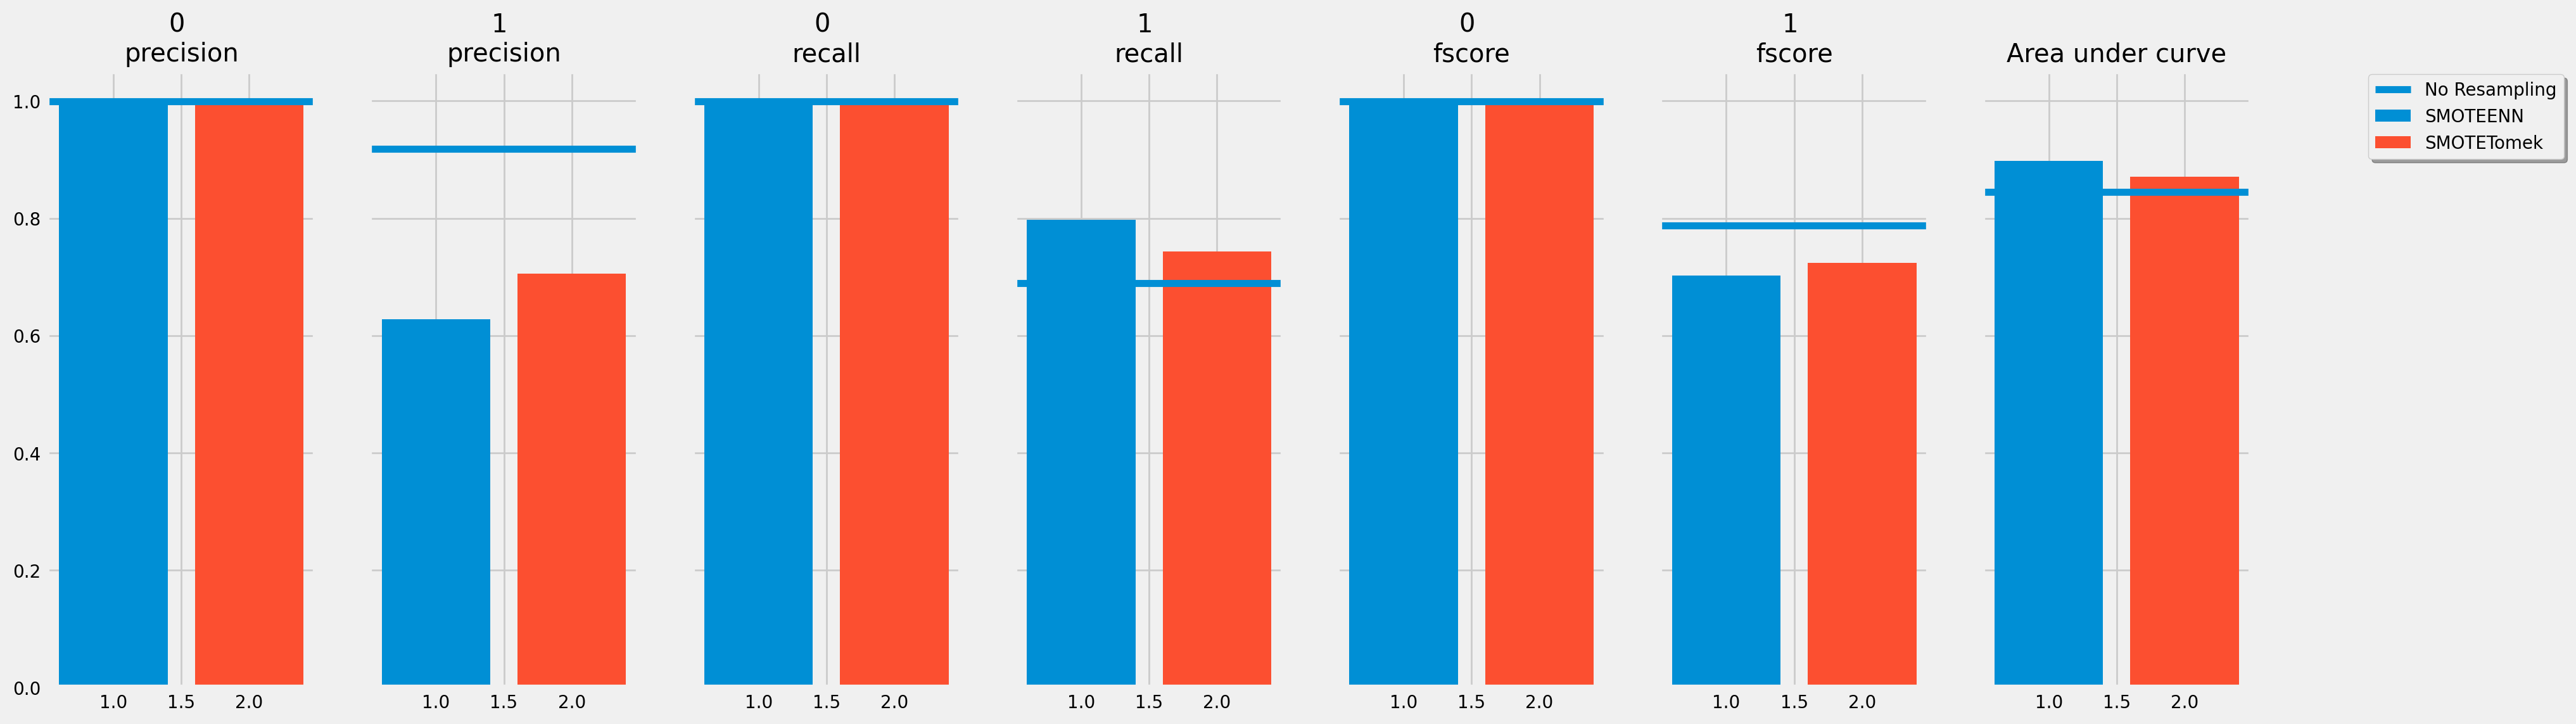

In [ ]:
# evaluate_method(results, 'combination')

In [ ]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


#Modelo Randow Forest
## Frente aos resultados preliminares, apontando que tanto faz balancear os dados, decidimos ficar com o treino no cojunto desbalanceado.

#Treino do Modelo

##Ajuste com os hiperparâmetros no automático - Indicativos de Overfitting

In [ ]:
# Decidimos ficar com o modelo desbalanceado
#RandomForestClassifier()

# Balancear os dados
#sm = SMOTE(random_state=42)
#sm = SMOTETomek(random_state=42)
#sm = ADASYN(random_state=42)
#X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Medidas de ajuste para a etapa de TREINO do Modelo
#pipeT = Pipeline(steps=[('classifier', RandomForestClassifier())])
pipeT = RandomForestClassifier()
pipe_df_regT = pipeT.fit(X_train, y_train)
pipe_df_reg_predT = pipe_df_regT.predict(X_train)
print("--------------------------------------")
print("Etapa de Treino:")
# Acurácia  = (TP + TN)/Total
print("Acurácia {0} é: {1:.2f}%".format(RandomForestClassifier(),(pipeT.score(X_train, y_train)*100)))
# Precisão = TP / (TP + FP)
print("Precisão {0} é: {1:.2f}%".format(RandomForestClassifier(),(precision_score(y_train, pipe_df_reg_predT)*100)))
# Recall = TP / (TP + FN)
print(f"Recall: {round(recall_score(y_train, pipe_df_reg_predT),3)*100}%")
# F1 Score
print(f"F1 Score: {round(f1_score(y_train, pipe_df_reg_predT),3)*100}%")
# Erro quadrático médio (MSE)
print(f"MSE: {round(mean_squared_error(y_train, pipe_df_reg_predT),3)*100}%")
print("--------------------------------------")

# Medidas de ajuste para a etapa de TESTE do Modelo
# pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])
pipe = pipeT
#pipe_df_reg = pipe.fit(X_train, y_train)
pipe_df_reg_pred = pipe_df_regT.predict(X_test)
print("Etapa de Teste:")
# Acurácia  = (TP + TN)/Total
print("Acurácia {0} é: {1:.2f}%".format(RandomForestClassifier(),(pipe.score(X_test, y_test)*100)))
# Precisão = TP / (TP + FP)
print("Precisão {0} é: {1:.2f}%".format(RandomForestClassifier(),(precision_score(y_test, pipe_df_reg_pred)*100)))
# Recall = TP / (TP + FN)
print(f"Recall: {round(recall_score(y_test, pipe_df_reg_pred),3)*100}%")
# F1 Score
print(f"F1 Score: {round(f1_score(y_test, pipe_df_reg_pred),3)*100}%")
# Erro quadrático médio (MSE)
print(f"MSE: {round(mean_squared_error(y_test, pipe_df_reg_pred),3)*100}%")
print("--------------------------------------")

--------------------------------------
Etapa de Treino:
Acurácia RandomForestClassifier() é: 100.00%
Precisão RandomForestClassifier() é: 100.00%
Recall: 100.0%
F1 Score: 100.0%
MSE: 0.0%
--------------------------------------
Etapa de Teste:
Acurácia RandomForestClassifier() é: 99.95%
Precisão RandomForestClassifier() é: 95.69%
Recall: 75.0%
F1 Score: 84.1%
MSE: 0.0%
--------------------------------------


## Otimização de hiperparâmetros para o modelo randow forest

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste


# Definir o modelo
model = RandomForestClassifier(random_state=42,bootstrap=True)

# Definir a grade de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar o Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2,scoring='f1')

# # Definir o tamanho da amostra
sample_size = 10000  # ou qualquer tamanho que você desejar

# # Selecionar amostra aleatória dos índices
sample_indices = np.random.choice(X_train.index, size=sample_size, replace=False)

# # Selecionar amostras correspondentes de X_train e y_train
X_train_sample = X_train.loc[sample_indices]
y_train_sample = y_train.loc[sample_indices]


#Aplicar o Grid Search
grid_search.fit(X_train_sample, y_train_sample)

#Imprimir os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

#Fazer previsões no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Avaliar o modelo
print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# # ------------------------------------------------------SAIDA-----------------------------------------------------------------------------
# # Fitting 5 folds for each of 324 candidates, totalling 1620 fits
# # Melhores hiperparâmetros: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
# # Acurácia no conjunto de teste: 0.9982678510820079
# #               precision    recall  f1-score   support

# #            0       1.00      1.00      1.00     85295
# #            1       0.00      0.00      0.00       148

# #     accuracy                           1.00     85443
# #    macro avg       0.50      0.50      0.50     85443
# # weighted avg       1.00      1.00      1.00     85443

# # Fitting 5 folds for each of 324 candidates, totalling 1620 fits
# # Melhores hiperparâmetros: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
# # Acurácia no conjunto de teste: 0.9991456292499094
# #               precision    recall  f1-score   support

# #            0       1.00      1.00      1.00     85295
# #            1       0.84      0.63      0.72       148

# #     accuracy                           1.00     85443
# #    macro avg       0.92      0.81      0.86     85443
# # weighted avg       1.00      1.00      1.00     85443

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Melhores hiperparâmetros: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Acurácia no conjunto de teste: 0.9990637032875719
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.64      0.70       148

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



##Impacto de hiperparâmetros no desempenho dos modelos
Aqui é possível identificar o ponto em que a curva de teste para de melhorar. Também aponta overfitting do modelo.

In [ ]:
# Lista de valores de max_leaf_nodes a serem testados
max_leaf_nodes_values = [2, 5, 10, 20, 50, 100]

# Listas para armazenar as precisões
train_accuracies = []
test_accuracies = []

for max_leaf_nodes in max_leaf_nodes_values:
    # Definir e treinar o modelo
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(X_train, y_train)

    # Previsões nos conjuntos de treinamento e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular e armazenar as precisões
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))


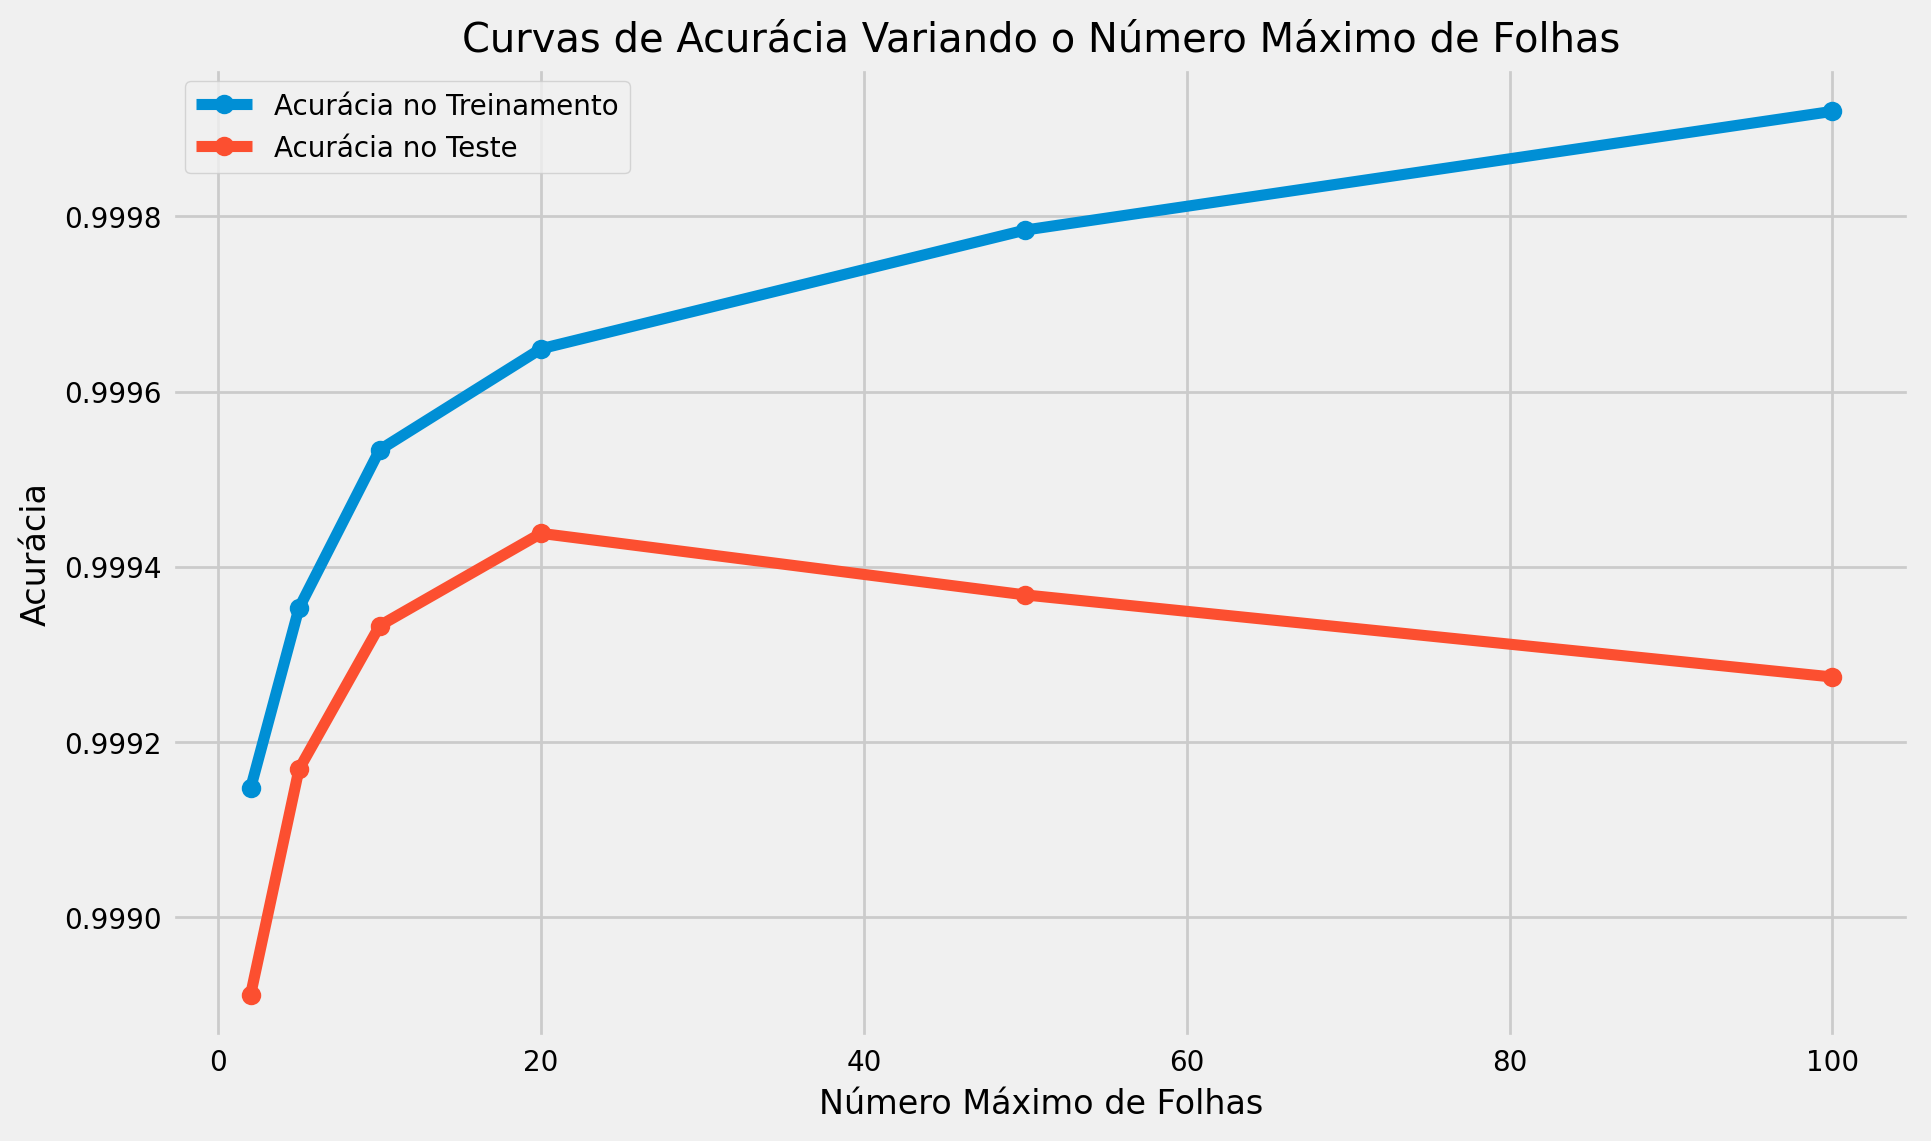

In [ ]:
# Plotar as curvas de precisão
plt.figure(figsize=(10, 6))
plt.plot(max_leaf_nodes_values, train_accuracies, label='Acurácia no Treinamento', marker='o')
plt.plot(max_leaf_nodes_values, test_accuracies, label='Acurácia no Teste', marker='o')
plt.xlabel('Número Máximo de Nós Terminais')
plt.ylabel('Acurácia')
plt.title('Curvas de Acurácia Variando o Número Máximo de Nós Terminais')
plt.legend()
plt.grid(True)
plt.show()


##Ajuste com alteração nos hiperparâmetros: "poda" na árvore para eliminar Overfitting

In [ ]:
# Decidimos ficar com o modelo desbalanceado
#RandomForestClassifier()

# Balancear os dados
#sm = SMOTE(random_state=42)
#sm = SMOTETomek(random_state=42)
#sm = ADASYN(random_state=42)
#X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Medidas de ajuste para a etapa de TREINO do Modelo
#pipeT = Pipeline(steps=[('classifier', RandomForestClassifier())])
pipeT = RandomForestClassifier(max_depth=5, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 40, random_state=42, bootstrap=True)
pipe_df_regT = pipeT.fit(X_train, y_train)
pipe_df_reg_predT = pipe_df_regT.predict(X_train)
print("--------------------------------------")
print("Etapa de Treino:")
# Acurácia  = (TP + TN)/Total
print("Acurácia {0} é: {1:.2f}%".format(RandomForestClassifier(),(pipeT.score(X_train, y_train)*100)))
# Precisão = TP / (TP + FP)
print("Precisão {0} é: {1:.2f}%".format(RandomForestClassifier(),(precision_score(y_train, pipe_df_reg_predT)*100)))
# Recall = TP / (TP + FN)
print(f"Recall: {round(recall_score(y_train, pipe_df_reg_predT),3)*100}%")
# F1 Score
print(f"F1 Score: {round(f1_score(y_train, pipe_df_reg_predT),3)*100}%")
# Erro quadrático médio (MSE)
print(f"MSE: {round(mean_squared_error(y_train, pipe_df_reg_predT),3)*100}%")
print("--------------------------------------")

# Medidas de ajuste para a etapa de TESTE do Modelo
# pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])
pipe = pipeT
#pipe_df_reg = pipe.fit(X_train, y_train)
pipe_df_reg_pred = pipe_df_regT.predict(X_test)
print("Etapa de Teste:")
# Acurácia  = (TP + TN)/Total
print("Acurácia {0} é: {1:.2f}%".format(RandomForestClassifier(),(pipe.score(X_test, y_test)*100)))
# Precisão = TP / (TP + FP)
print("Precisão {0} é: {1:.2f}%".format(RandomForestClassifier(),(precision_score(y_test, pipe_df_reg_pred)*100)))
# Recall = TP / (TP + FN)
print(f"Recall: {round(recall_score(y_test, pipe_df_reg_pred),3)*100}%")
# F1 Score
print(f"F1 Score: {round(f1_score(y_test, pipe_df_reg_pred),3)*100}%")
# Erro quadrático médio (MSE)
print(f"MSE: {round(mean_squared_error(y_test, pipe_df_reg_pred),3)*100}%")
print("--------------------------------------")

# Balanceamento com o SMOTE
# --------------------------------------
# Etapa de Treino:
# Acurácia RandomForestClassifier() é: 95.15%
# Precisão RandomForestClassifier() é: 99.49%
# Recall: 90.8%
# F1 Score: 94.89999999999999%
# --------------------------------------
# Etapa de Teste:
# Acurácia RandomForestClassifier() é: 99.47%
# Precisão RandomForestClassifier() é: 22.32%
# Recall: 83.1%
# F1 Score: 35.199999999999996%
# --------------------------------------

--------------------------------------
Etapa de Treino:
Acurácia RandomForestClassifier() é: 99.95%
Precisão RandomForestClassifier() é: 94.18%
Recall: 75.3%
F1 Score: 83.7%
MSE: 0.1%
--------------------------------------
Etapa de Teste:
Acurácia RandomForestClassifier() é: 99.94%
Precisão RandomForestClassifier() é: 92.92%
Recall: 70.89999999999999%
F1 Score: 80.5%
MSE: 0.1%
--------------------------------------


##Análise de Ajuste no Modelo Randow Forest

## Cross Validation

In [ ]:
# Avalie o desempenho do modelo com validação cruzada
cv_scores = cross_val_score(pipeT, X_train, y_train, cv=10)

print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standart Desviation CV Score:", np.std(cv_scores))

def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(cv_scores)

Cross Validation Scores: [0.99969905 0.99944826 0.99919747 0.99944826 0.99939807 0.99949839
 0.99924759 0.99954856 0.99944823 0.99939807]
Mean CV Score: 0.9994331972660108
Standart Desviation CV Score: 0.00013468477075487405
Acurácia média: 99.94%
Intervalo de acurácia: [99.92% ~ 99.97%]


#StratifiedKFold
##Garante que em todos os folds a proporção de informações da Class será a mesma

In [ ]:
from sklearn.model_selection import StratifiedKFold
np.random.seed(42)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = pipeT
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 99.94%
Intervalo de acurácia: [99.92% ~ 99.96%]


## Curva de Aprendizado do Modelo: Train vs Test

Test Accuracy: 0.9993797034280163


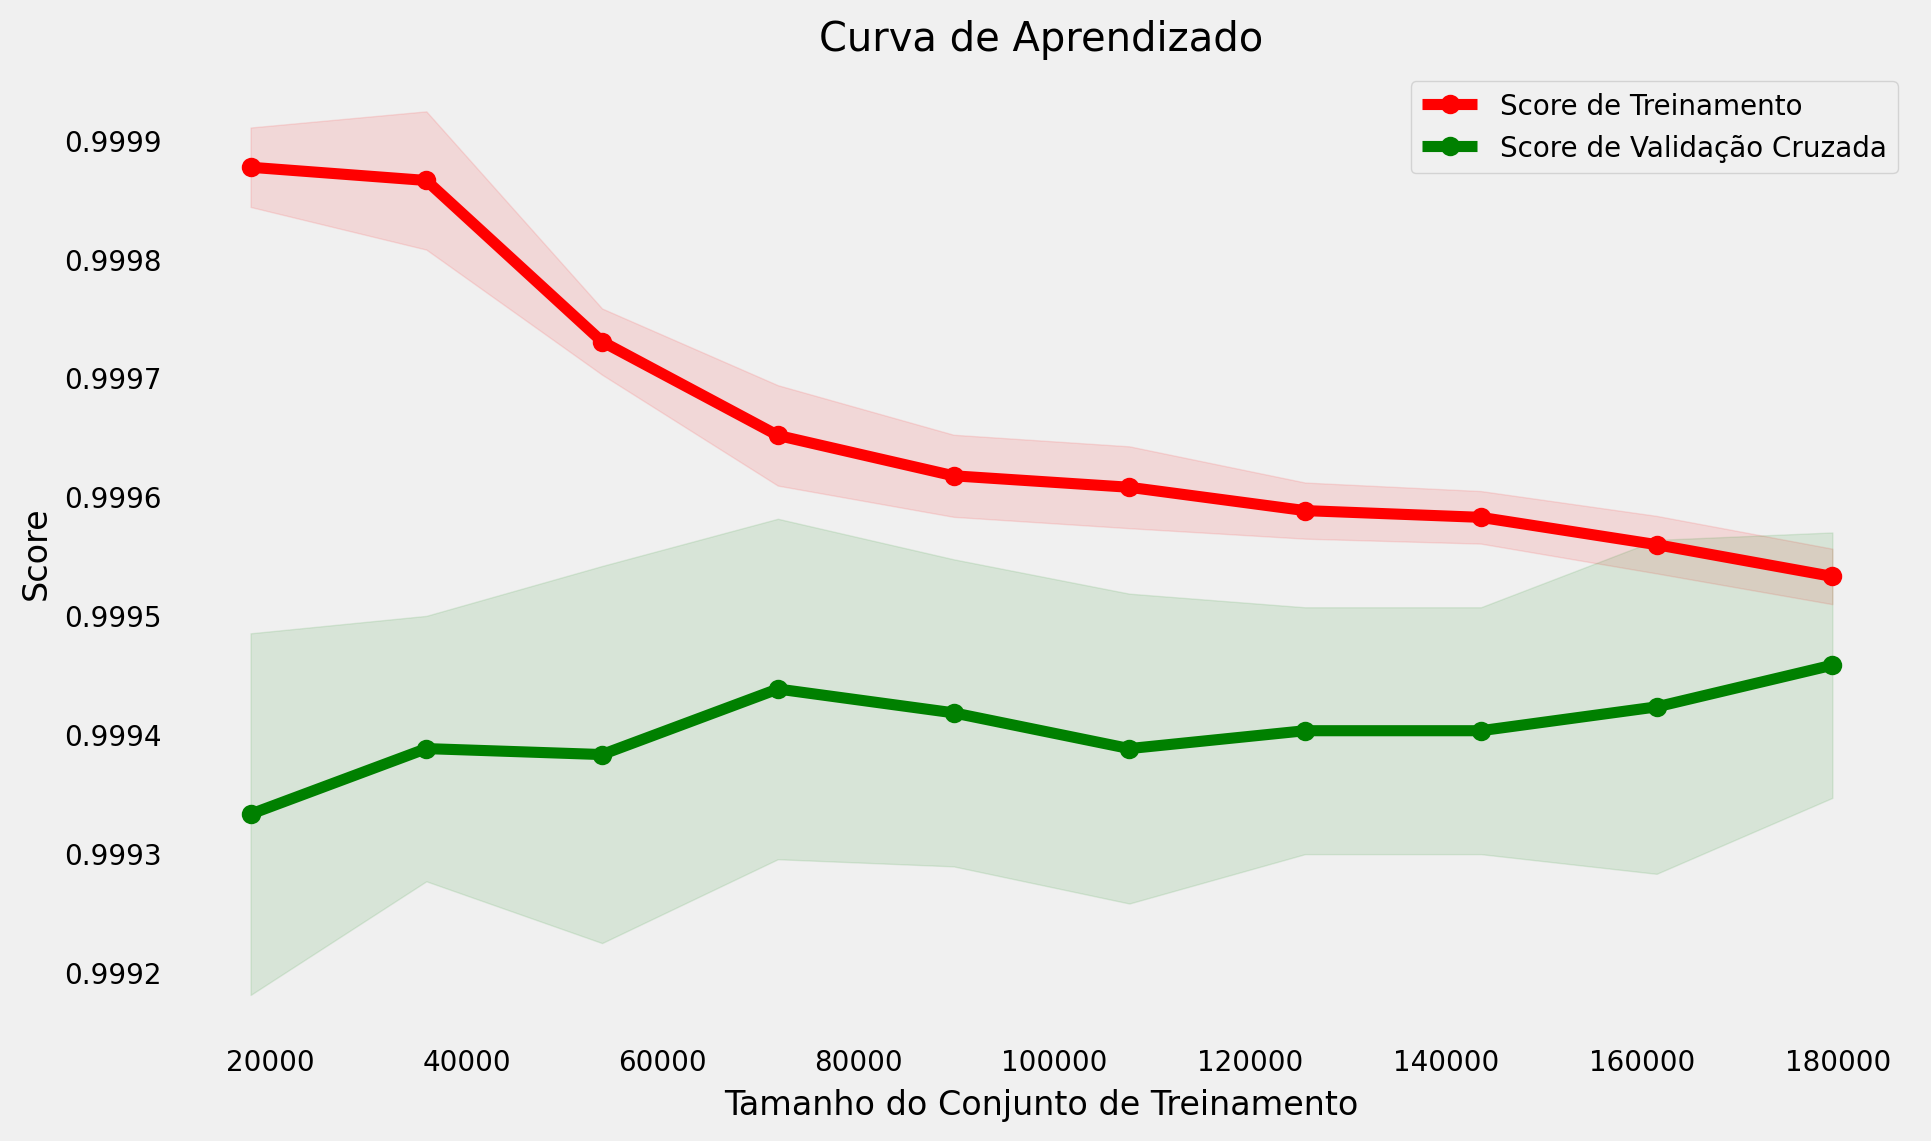

In [ ]:

# # Verifique a precisão no conjunto de teste
# test_accuracy = pipe.score(X_test, y_test)
# print("Test Accuracy:", test_accuracy)

# # Curvas de aprendizado
# train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=10,scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))


# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.figure(figsize=(10, 6))
# plt.title("Curva de Aprendizado")
# plt.xlabel("Tamanho do Conjunto de Treinamento")
# plt.ylabel("Score")
# plt.grid()

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#          label="Score de Treinamento")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#          label="Score de Validação Cruzada")

# plt.legend(loc="best")
# plt.show()

##Precisão vs Recall

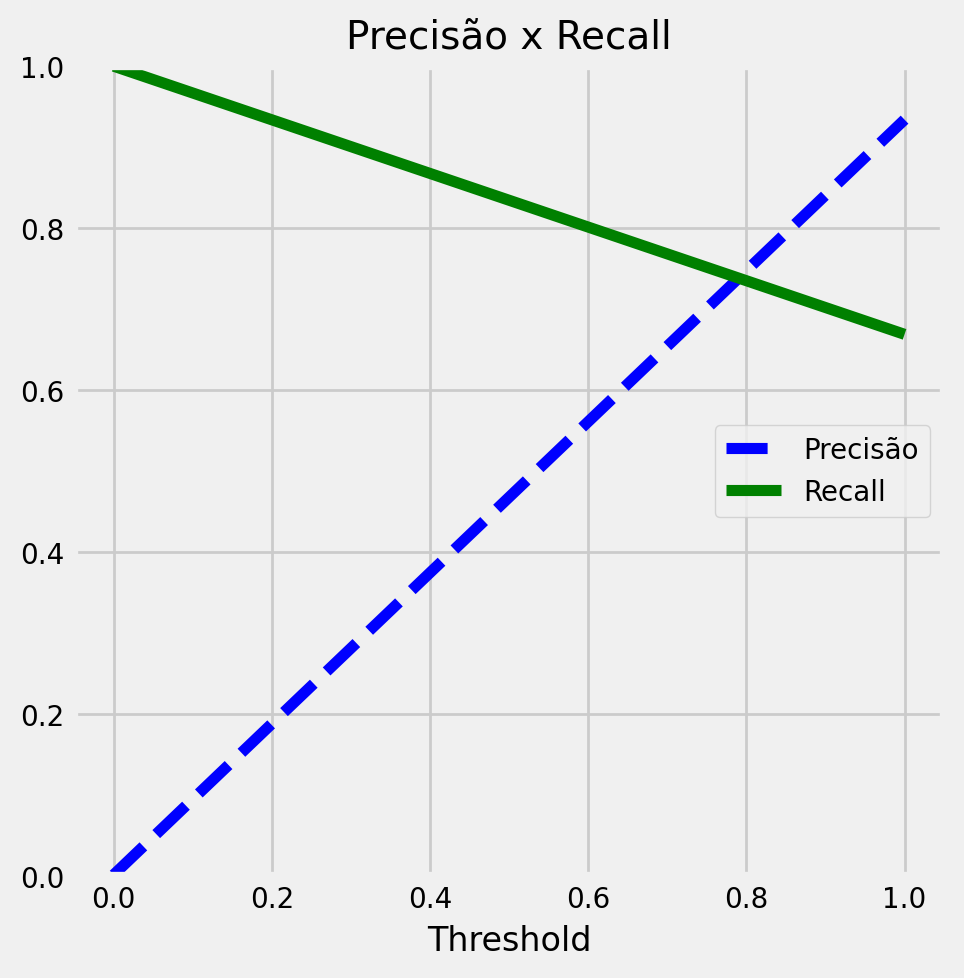

In [ ]:
np.random.seed(42)

cv = StratifiedKFold(n_splits = 10, shuffle = True)
model = pipe
y_scores = cross_val_predict(model, X_test, y_test, cv = cv)
precisions, recalls, thresholds = precision_recall_curve(y_test,y_scores)
fig, ax = plt.subplots(figsize = (5,5))
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)
plt.show()

## Matriz de Confusão

In [ ]:
np.random.seed(42)
model = pipe
cv = StratifiedKFold(n_splits = 10, shuffle = True)
y_pred_teste = cross_val_predict(model, X_test, y_test, cv = cv)


Relatório de classificação dos dados de TESTE:
               precision    recall  f1-score   support

           0     0.9994    0.9999    0.9997     85295
           1     0.9340    0.6689    0.7795       148

    accuracy                         0.9993     85443
   macro avg     0.9667    0.8344    0.8896     85443
weighted avg     0.9993    0.9993    0.9993     85443



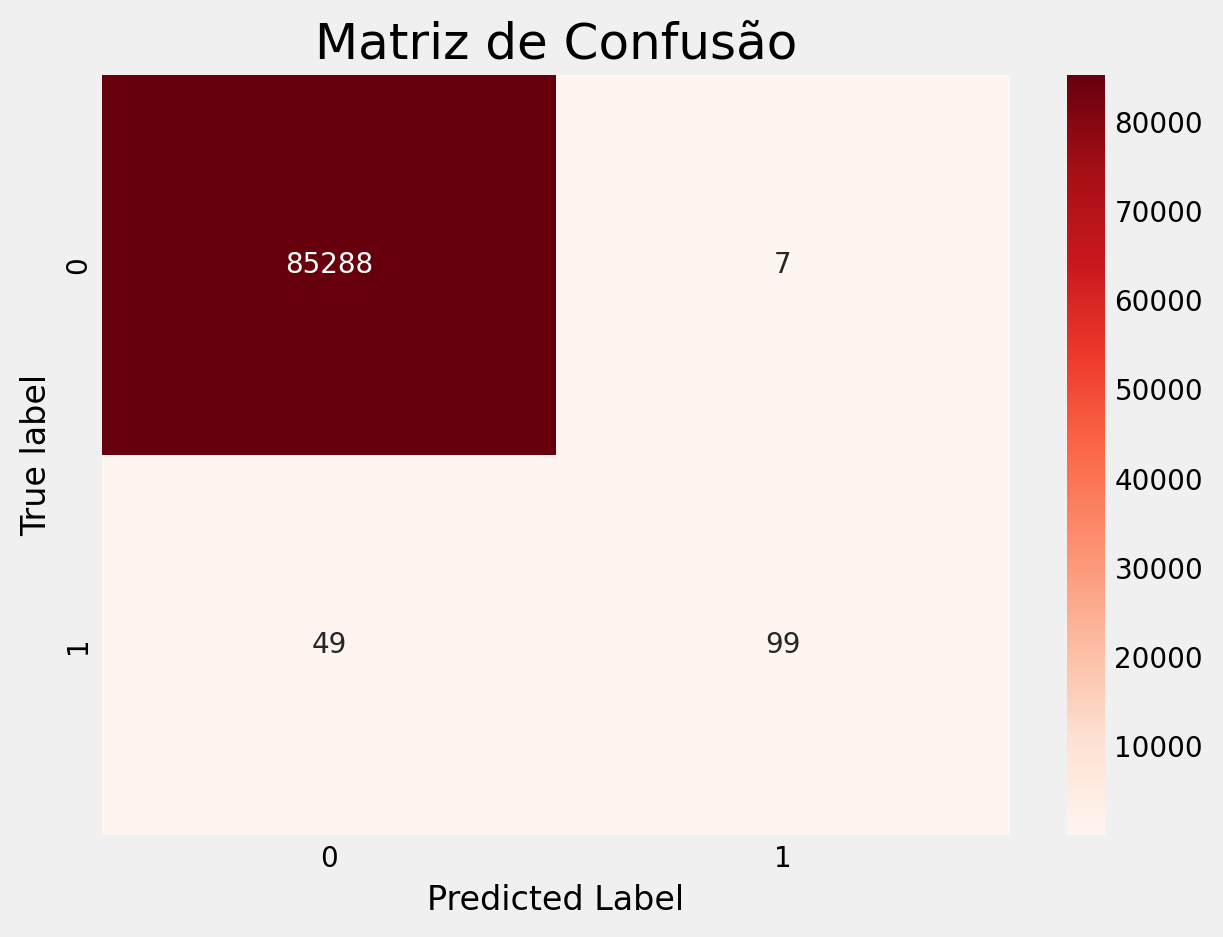

In [ ]:
# Teste

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_teste), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

# relatório do modelo
print('Relatório de classificação dos dados de TESTE:\n', classification_report(y_test, y_pred_teste, digits=4))

## Curva ROC

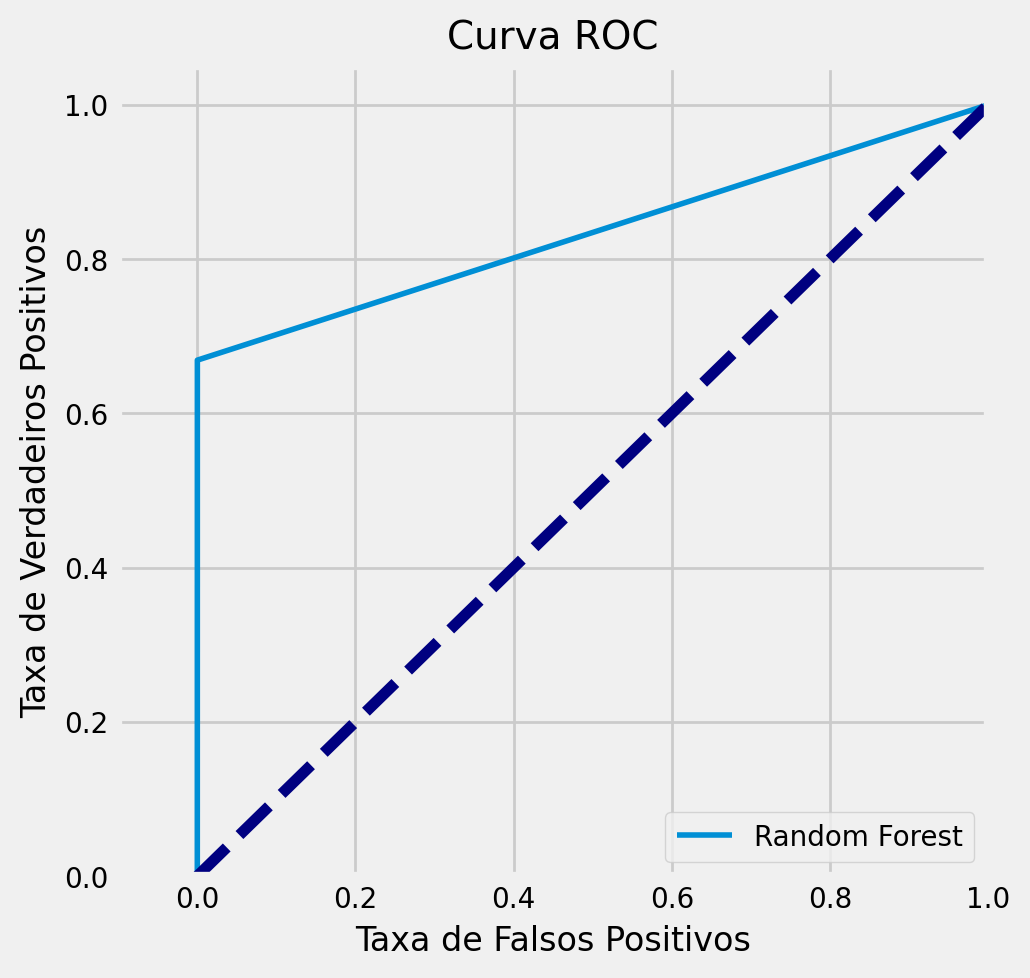

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=1)
fig, ax = plt.subplots(figsize = (5,5))
plt.plot(fpr, tpr, linewidth=2, label = 'Random Forest')
plt.plot([0,1], [0,1], color = 'navy', linestyle='--')
# plt.plot([0,1], [0,1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
# plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()

In [ ]:
# Calcular a AUC
auc = roc_auc_score(y_test, y_scores)
print("AUC: {:.2f}".format(auc))

AUC: 0.83


##SHAP - Importância dos Campos no modelo Randow Forest

In [ ]:
!pip install scikit-learn
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 57.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.1-py3-none-any.whl size=4010600 sha256=c9563c638c5a3917538ab3ff33c6d60d07adac9fb01d

In [ ]:
import matplotlib.pyplot as plt
import shap
from shap import TreeExplainer
from shap import summary_plot




In [ ]:
# Cálculo dos valores SHAPS
explainer = TreeExplainer(pipe_df_regT)
shap_values = np.array(explainer.shap_values(X_train))

# Valores SHAP
print("--------------------------------------")
print(f"Qtde de dados considerados: {shap_values.shape[0]}")
print(f"Qtde de Variáveis: {shap_values.shape[1]}")
print(f"Qtde de classes: {shap_values.shape[2]}")
print("--------------------------------------")
print(shap_values.shape)

--------------------------------------
Qtde de dados considerados: 199364
Qtde de Variáveis: 29
Qtde de classes: 2
--------------------------------------
(199364, 29, 2)


In [ ]:
# Verificando as quantidades para a transposição do shap_values: classes, dados, campos
print(X_train.shape)
print(shap_values.transpose((2,0,1)).shape)


(199364, 29)
(2, 199364, 29)


In [ ]:
# Verificação de integridade para garantir que as previsões reais do modelo sejam iguais às previstas por shap.
shap_values_ = shap_values.transpose((0,1,2))

np.allclose(
    pipe_df_regT.predict_proba(X_train),
    shap_values_.sum(1) + explainer.expected_value
)

True

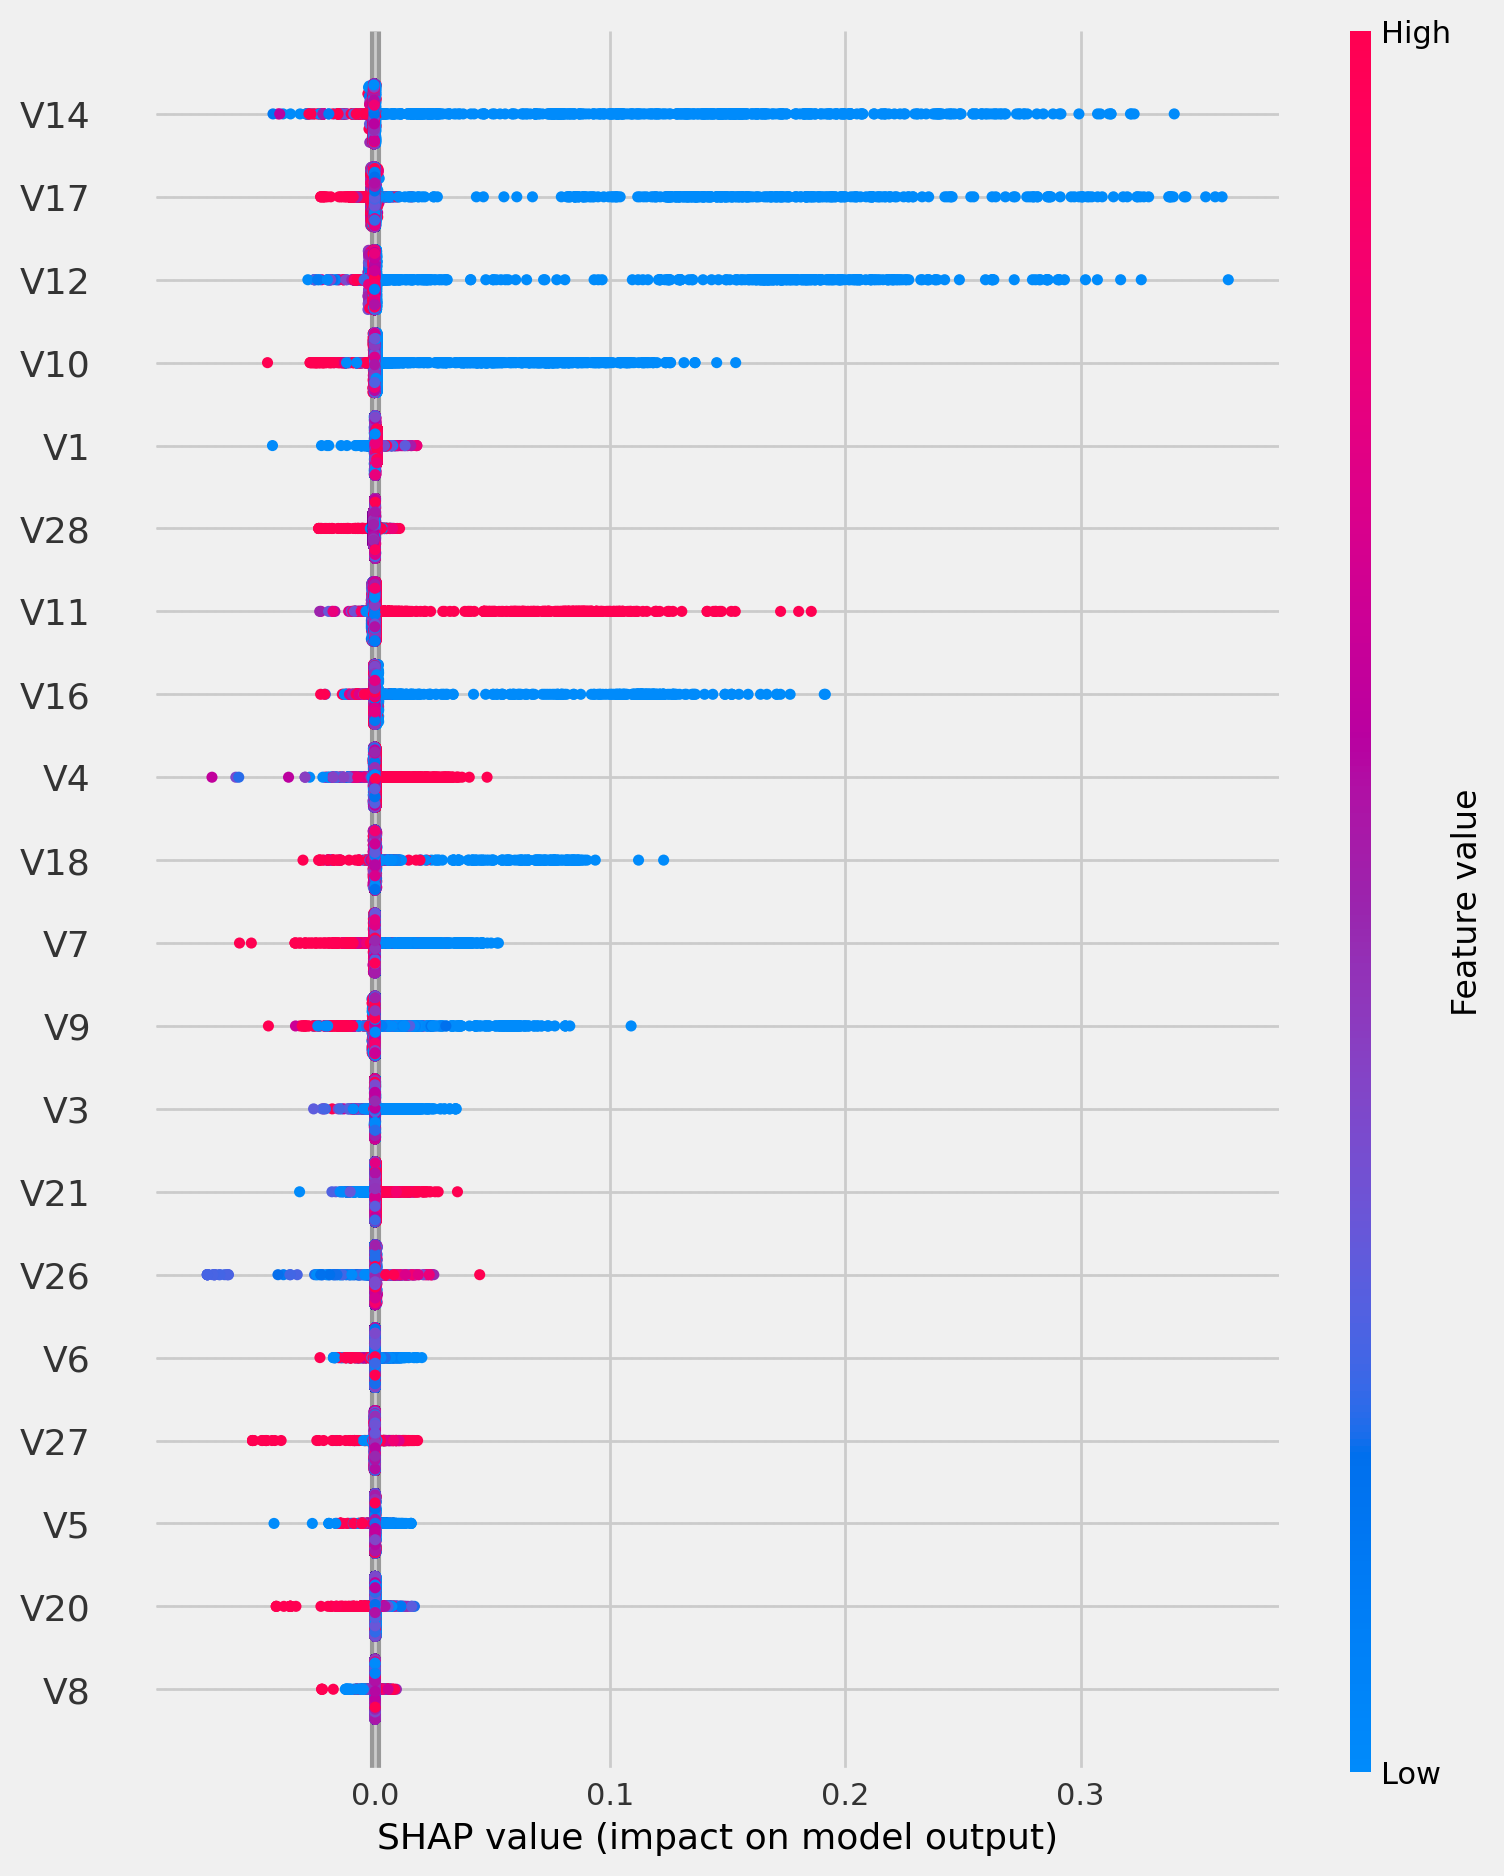

In [ ]:
# # Classe 1

# # É necessário transpor os valores, pois a entrada do shap_values precisa ter a ordem: Classes, Dados e Campos
# shap_values_new = shap_values.transpose((2,0,1))

# # Gerando o gráfico SHAP
# shap.summary_plot(shap_values_new[1], X_train,feature_names=X_train.columns)


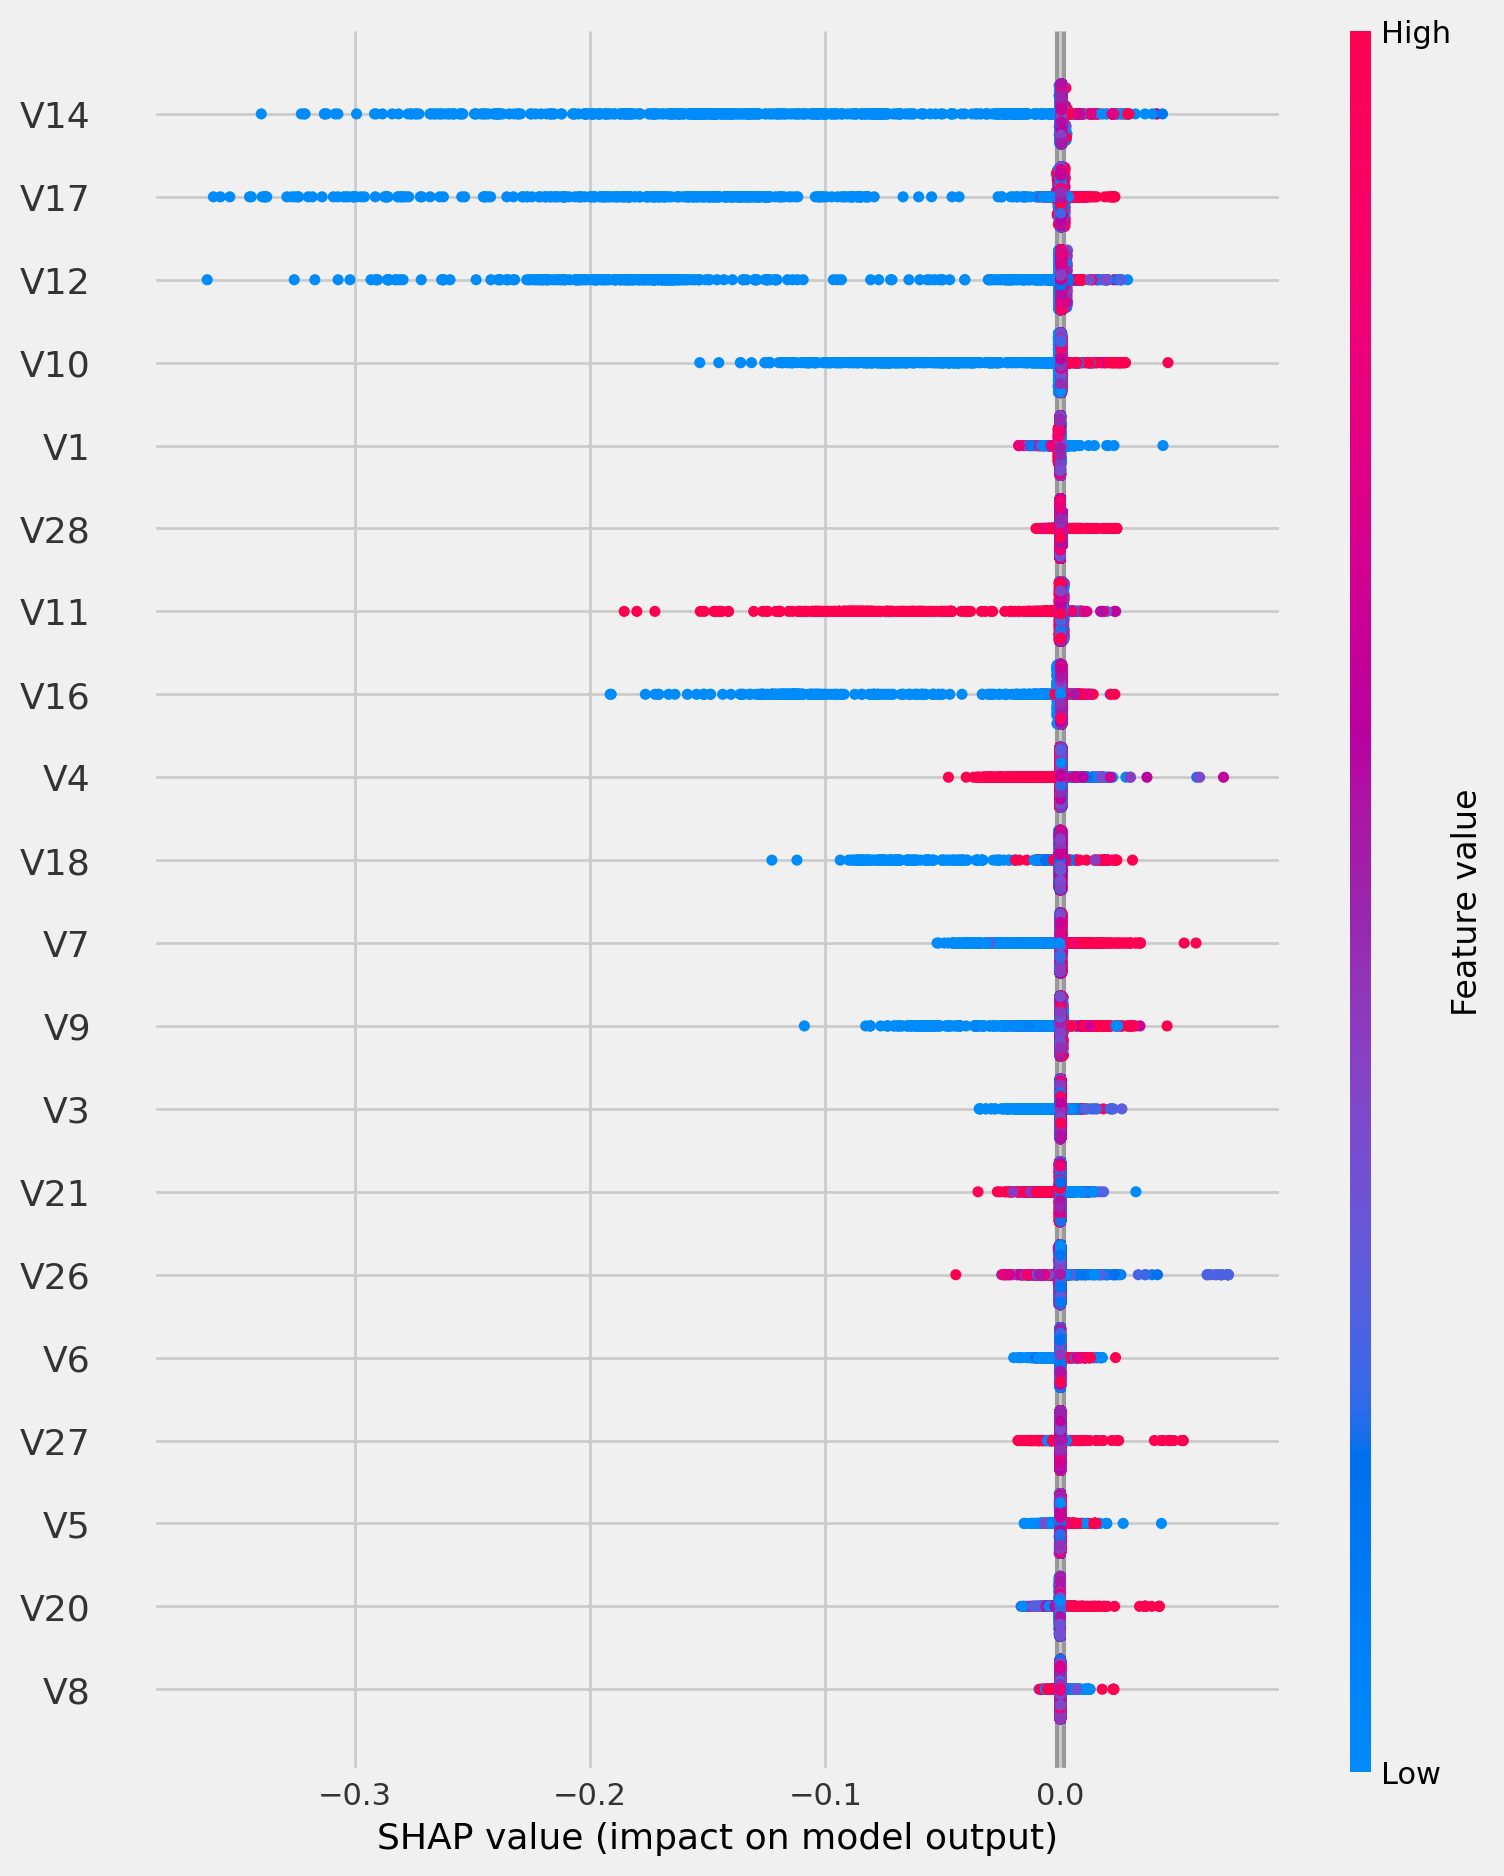

In [ ]:
# # Classe 0

# # É necessário transpor os valores, pois a entrada do shap_values precisa ter a ordem: Classes, Dados e Campos
# shap_values_new = shap_values.transpose((2,0,1))

# # Gerando o gráfico SHAP
# shap.summary_plot(shap_values_new[0], X_train,feature_names=X_train.columns)

#Trainamento do Modelo no Conjunto Completo

In [ ]:
pipe_df_regT = pipeT.fit(X, y)

In [ ]:
# Obter a importância das features
feature_importances = pipe_df_regT.feature_importances_

# Criar um DataFrame para visualização
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordenar pelo valor da importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

   Feature  Importance
16     V17    0.204933
13     V14    0.181037
15     V16    0.124815
11     V12    0.095756
9      V10    0.084868
8       V9    0.049990
10     V11    0.044775
6       V7    0.038403
17     V18    0.031560
3       V4    0.024169
4       V5    0.018609
5       V6    0.013102
20     V21    0.012461
25     V26    0.012371
7       V8    0.009564
19     V20    0.007721
26     V27    0.007032
2       V3    0.006080
18     V19    0.005404
28  Amount    0.004381
1       V2    0.004078
21     V22    0.003840
0       V1    0.003580
14     V15    0.003309
27     V28    0.002943
23     V24    0.002226
22     V23    0.001136
24     V25    0.001104
12     V13    0.000752


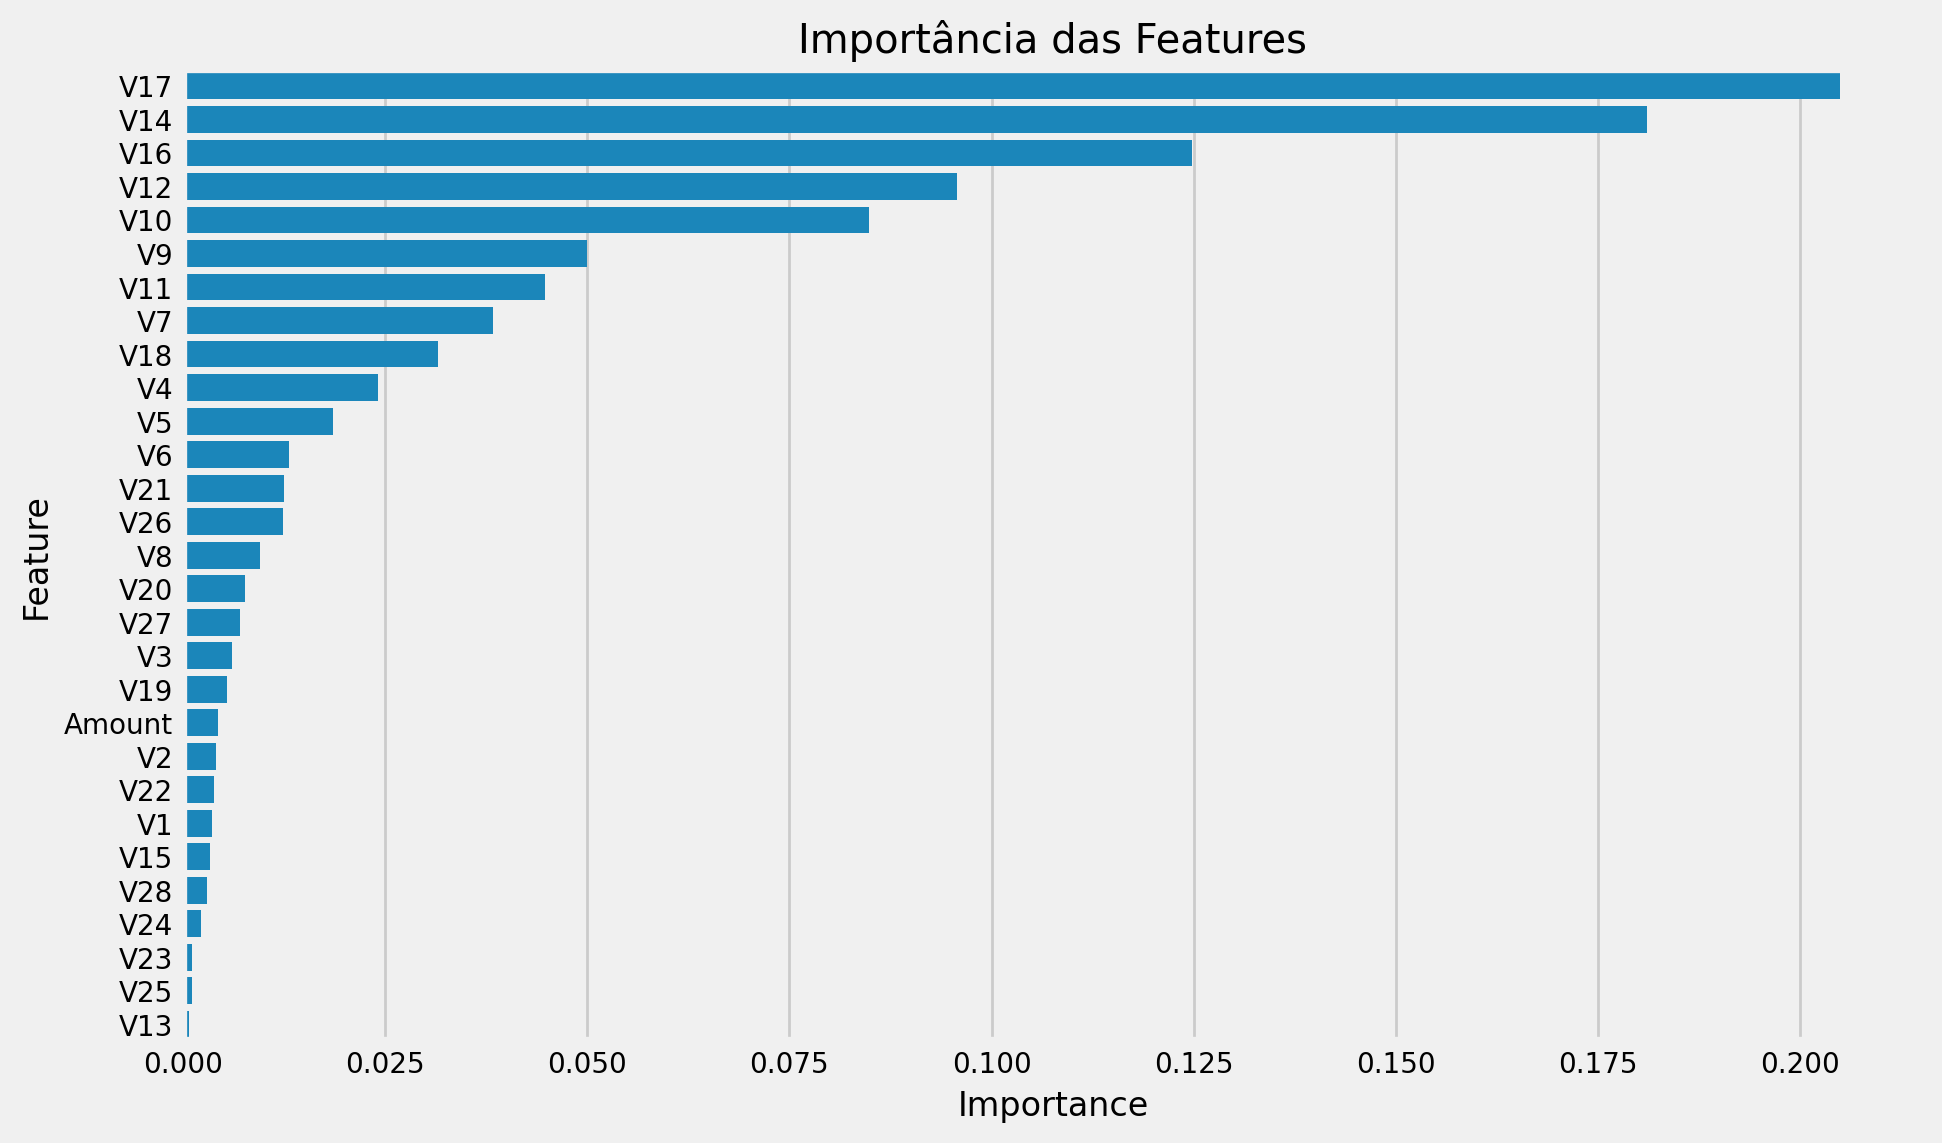

In [ ]:
# Plotar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Features')
plt.show()